# Topic Modeling (Vectorize Words and then Reduce Dimensions)

In [86]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib
from matplotlib import pyplot as plt
from joblib import dump, load

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from gensim import corpora, models, similarities, matutils

In [2]:
# Read in data
df = pd.read_pickle('../preprocessing/cleaned_data.pkl')

In [3]:
df.shape

(42234, 1)

In [4]:
df.head()

cleaned_title
0  bacon lollipops bell eccentric cafe grand rapi...
1                           pico gallo spend pennies
2                 dinner elizabeth chop marquette mi
3              artisanal mezcal celebrate cinco mayo
4                             veggie eggie er veggie

## Vectorizing The Words

#### Count Vectorizer

In [5]:
# Vectorize the words with CountVectorizer. This takes a parameter 'stopwords', which I have left out 
# because I took care of stopwords in my cleaning phase 

# CountVectorizer().fit_transform returns a matrix where rows correspond to observations (documents) and 
# columns correspond to the counts of words in each observation. There are as many columns as number of unique 
# words in all documents

vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df['cleaned_title'])
doc_word.shape


(42234, 20857)

#### TF-IDF

In [6]:
# TfidfVectorizer().fit_transform does something similar, but it computes the term frequency of a word with a document
# divided by the frequency of that word accross all documents. 
# Essentially, it is supposed to pick out words that are unique to a document as opposed to words that simply
# show up in many documents

tf_idf = TfidfVectorizer()
doc_word_tf_idf = tf_idf.fit_transform(df['cleaned_title'])
doc_word_tf_idf.shape

(42234, 20857)

#### Word2Vec

In [ ]:
word2vec = models.Word2Vec(df['cleaned_title'], size=100, window=5, min_count=1, workers=2, sg=1)

In [ ]:
list(word2vec.wv.vocab.items())[:50]

## Latent Semantic Analysis (LSA)

In [7]:
# Use LSA to reduce dimensionality. I am going to guess we should use 15 TOPICS

# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
# Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)

# in here, we can either input "doc_word" or "doc_word_tf_idf" to used different vectorized forms of our words

num_topics = 15

lsa = TruncatedSVD(num_topics)
doc_topic = lsa.fit_transform(doc_word_tf_idf)
lsa.explained_variance_ratio_

array([0.00489212, 0.00604156, 0.00578783, 0.00509743, 0.00417994,
       0.00400868, 0.00385432, 0.00371757, 0.00353842, 0.00335648,
       0.00334009, 0.00320799, 0.00303173, 0.00293267, 0.00288037])

uh oh. There isn't much variance explained by these topics

In [8]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = list(range(num_topics)),
             columns = vectorizer.get_feature_names())
topic_word

aa  aaaiiiya  aai  aalborg  aaloor  aam  aamras  aanbieden  aaoji  \
0   0.000       0.0  0.0      0.0   0.000  0.0     0.0      0.000    0.0   
1  -0.000      -0.0  0.0      0.0  -0.000 -0.0    -0.0      0.000    0.0   
2   0.000       0.0 -0.0      0.0   0.000  0.0     0.0     -0.000    0.0   
3   0.000       0.0  0.0      0.0  -0.000  0.0     0.0      0.000    0.0   
4   0.000       0.0  0.0      0.0   0.000  0.0     0.0      0.000    0.0   
5   0.000       0.0 -0.0      0.0   0.000 -0.0     0.0     -0.000   -0.0   
6   0.000       0.0 -0.0      0.0  -0.000  0.0     0.0     -0.000    0.0   
7   0.000       0.0  0.0     -0.0   0.000  0.0     0.0      0.000    0.0   
8   0.001       0.0  0.0      0.0   0.000  0.0     0.0     -0.000    0.0   
9   0.000       0.0 -0.0      0.0  -0.000  0.0    -0.0      0.000    0.0   
10  0.000       0.0 -0.0      0.0   0.000 -0.0    -0.0     -0.001    0.0   
11  0.000       0.0  0.0     -0.0   0.001 -0.0     0.0      0.000   -0.0   
12 -0.000      -0.0 -0.0     -0.0   0.000 -0.0    -0.0      0.000   -0.0   
13 -0.001      -0.0  0.0     -0.0   0.000 -0.0    -0.0     -0.000   -0.0   
14 -0.000       0.0 -0.0      0.0  -0.000 -0.0    -0.0      0.000    0.0   

    aaparagus  ...  zuich    zuk  zuke  zuma  zuppa  zur  zurilee  zuurkool  \
0       0.000  ...    0.0  0.000   0.0   0.0    0.0  0.0    0.000       0.0   
1       0.000  ...    0.0 -0.000  -0.0   0.0    0.0  0.0    0.000       0.0   
2      -0.000  ...    0.0 -0.000  -0.0  -0.0    0.0  0.0    0.001      -0.0   
3      -0.000  ...    0.0 -0.000   0.0   0.0    0.0  0.0    0.000       0.0   
4       0.000  ...    0.0  0.000   0.0   0.0    0.0  0.0   -0.000       0.0   
5      -0.000  ...    0.0 -0.000   0.0   0.0    0.0 -0.0   -0.000      -0.0   
6      -0.001  ...   -0.0 -0.000  -0.0   0.0    0.0 -0.0    0.000       0.0   
7      -0.000  ...    0.0 -0.000  -0.0   0.0    0.0  0.0   -0.000       0.0   
8      -0.000  ...    0.0  0.000   0.0  -0.0    0.0  0.0   -0.000       0.0   
9      -0.000  ...    0.0 -0.000  -0.0  -0.0    0.0  0.0    0.000      -0.0   
10     -0.000  ...   -0.0 -0.000   0.0   0.0   -0.0  0.0   -0.000      -0.0   
11     -0.001  ...   -0.0  0.001   0.0  -0.0   -0.0  0.0   -0.000      -0.0   
12     -0.000  ...    0.0  0.000  -0.0   0.0   -0.0  0.0    0.000      -0.0   
13     -0.000  ...   -0.0  0.000  -0.0  -0.0   -0.0 -0.0   -0.000       0.0   
14      0.000  ...    0.0  0.000   0.0  -0.0    0.0 -0.0    0.000       0.0   

     zz    zzq  
0   0.0  0.000  
1   0.0  0.000  
2  -0.0 -0.000  
3   0.0 -0.000  
4   0.0 -0.000  
5   0.0  0.000  
6   0.0  0.000  
7   0.0  0.000  
8   0.0  0.001  
9  -0.0 -0.000  
10 -0.0 -0.000  
11  0.0 -0.000  
12 -0.0  0.001  
13  0.0 -0.000  
14 -0.0  0.000  

[15 rows x 20857 columns]

Don't know if this is helpful either

In [9]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [10]:
# Let's check out our topics!

display_topics(lsa, vectorizer.get_feature_names(), 15)


Topic  0
chicken, cheese, bacon, pizza, fried, grilled, burger, egg, mac, sandwich, sauce, steak, rice, breakfast, garlic

Topic  1
pizza, cheese, cake, breakfast, bacon, mac, pepperoni, chocolate, burger, crust, cream, bread, cast, iron, dough

Topic  2
pizza, chicken, fried, rice, curry, waffles, wings, pepperoni, spicy, salad, buffalo, pot, bbq, crust, style

Topic  3
cake, chocolate, cream, ice, cookies, chip, butter, pie, chicken, strawberry, caramel, peanut, vanilla, cookie, banana

Topic  4
breakfast, steak, egg, bacon, eggs, pork, fried, sandwich, dinner, beef, toast, avocado, potatoes, smoked, garlic

Topic  5
steak, pork, garlic, dinner, potatoes, sauce, beef, salad, grilled, roasted, seared, ribeye, salmon, potato, asparagus

Topic  6
breakfast, cheese, steak, mac, grilled, sandwich, chicken, cream, ice, morning, dinner, healthy, english, salad, simple

Topic  7
cream, ice, chocolate, pie, butter, sauce, pork, cookies, chip, peanut, bread, banana, apple, hot, cookie

Topic 

I guess there are some cool findings here

In [11]:
# Check out the Vt matrix, to see how each document falls along the topics:

Vt = pd.DataFrame(doc_topic.round(5),
             index = df['cleaned_title'],
             columns = ['1', '2', '3', '4', '5', 
                        '6', '7', '8', '9', '10', 
                        '11', '12', '13', '14', '15'])
Vt.head()

1        2        3  \
cleaned_title                                                                   
bacon lollipops bell eccentric cafe grand rapid...  0.05857  0.01035 -0.04348   
pico gallo spend pennies                            0.00230 -0.00057 -0.00050   
dinner elizabeth chop marquette mi                  0.01520 -0.00397  0.00200   
artisanal mezcal celebrate cinco mayo               0.00733 -0.00099 -0.00276   
veggie eggie er veggie                              0.00675  0.00315  0.00147   

                                                          4        5        6  \
cleaned_title                                                                   
bacon lollipops bell eccentric cafe grand rapid... -0.02403  0.03720 -0.04827   
pico gallo spend pennies                           -0.00000  0.00132  0.00074   
dinner elizabeth chop marquette mi                  0.00192  0.03146  0.03577   
artisanal mezcal celebrate cinco mayo              -0.00023  0.00321  0.00085   
veggie eggie er veggie                             -0.00006  0.00410  0.00112   

                                                          7        8        9  \
cleaned_title                                                                   
bacon lollipops bell eccentric cafe grand rapid... -0.09624 -0.01374 -0.05935   
pico gallo spend pennies                            0.00014  0.00061  0.00160   
dinner elizabeth chop marquette mi                  0.00894 -0.00727  0.02325   
artisanal mezcal celebrate cinco mayo              -0.00293 -0.00002  0.00324   
veggie eggie er veggie                             -0.00270 -0.00147  0.00382   

                                                         10       11       12  \
cleaned_title                                                                   
bacon lollipops bell eccentric cafe grand rapid... -0.04651 -0.00440 -0.05206   
pico gallo spend pennies                           -0.00121 -0.00022  0.00071   
dinner elizabeth chop marquette mi                  0.01183 -0.02008 -0.02627   
artisanal mezcal celebrate cinco mayo               0.00180  0.00241  0.00340   
veggie eggie er veggie                              0.00699  0.00421  0.00499   

                                                         13       14       15  
cleaned_title                                                                  
bacon lollipops bell eccentric cafe grand rapid...  0.00063 -0.01059  0.00952  
pico gallo spend pennies                           -0.00053 -0.00013 -0.00140  
dinner elizabeth chop marquette mi                  0.00075 -0.00670  0.04538  
artisanal mezcal celebrate cinco mayo              -0.00178  0.00043  0.00116  
veggie eggie er veggie                             -0.00136 -0.00002 -0.00088

In [60]:
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rcdefaults()
matplotlib.rc('font', **font)

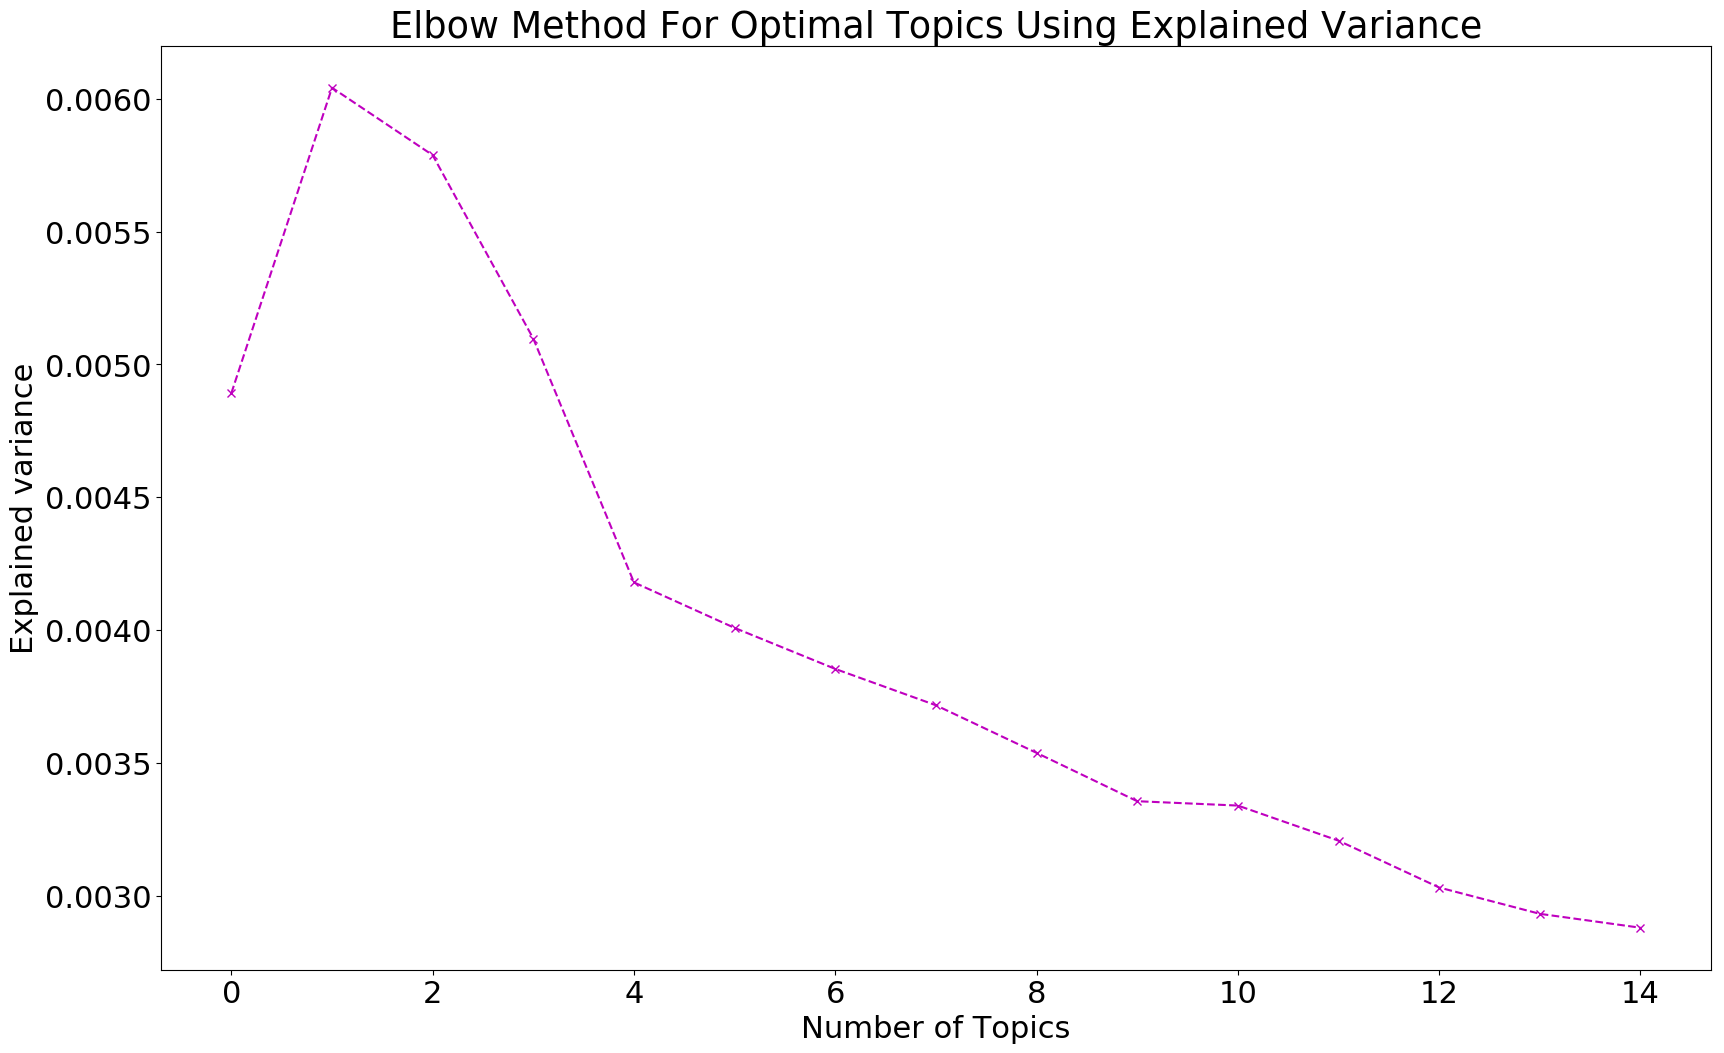

In [62]:
### Create a scree plot to see how many topics to include
plt.figure(figsize=(20,12))
plt.plot(lsa.explained_variance_ratio_, 'mx--')
plt.xlabel('Number of Topics')
plt.ylabel('Explained variance');
plt.title('Elbow Method For Optimal Topics Using Explained Variance');
plt.savefig('../figures/scree_lsa.png', dpi=200)

In [13]:
cum_var_explained = []
prev_tot_var = 0
for i, var in enumerate(lsa.explained_variance_ratio_):
    tot_var = var + prev_tot_var
    cum_var_explained.append(tot_var)
    prev_tot_var = tot_var
    print(var, tot_var)


0.004892123403133797 0.004892123403133797
0.0060415574848852556 0.010933680888019052
0.005787832302544416 0.016721513190563468
0.005097427459256914 0.02181894064982038
0.004179937316197738 0.025998877966018116
0.004008681919133673 0.03000755988515179
0.0038543240248546224 0.03386188391000641
0.0037175680996457978 0.03757945200965221
0.003538424160272536 0.041117876169924746
0.0033564818769701702 0.04447435804689492
0.0033400856882802666 0.04781444373517518
0.003207989607564114 0.051022433342739294
0.003031734110449896 0.05405416745318919
0.0029326695887762367 0.05698683704196542
0.0028803690996593505 0.059867206141624774


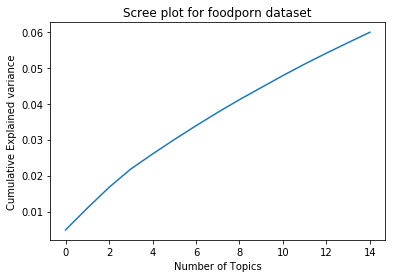

In [14]:
plt.plot(cum_var_explained)
plt.xlabel('Number of Topics')
plt.ylabel('Cumulative Explained variance');
plt.title('Scree plot for foodporn dataset');

## Non-Negative Matrix Factorization (NMF)

In [15]:
# Use NMF to reduce dimensionality. NMF might be better because it doesn't require that the topic axes are 
# orthogonal

num_topics = 6

nmf_model = NMF(num_topics, random_state=42)
doc_topic_nmf = nmf_model.fit_transform(doc_word)

In [25]:
# Copy of the above cell but using tf_idf instead of count-vectorizer

num_topics = 6

nmf_model_tf_idf = NMF(num_topics, random_state=42)
doc_topic_nmf_tf_idf = nmf_model_tf_idf.fit_transform(doc_word_tf_idf)

In [16]:
# Check out the Vt matrix, to see how each document falls along the topics:

Vt_nmf = pd.DataFrame(doc_topic_nmf.round(5),
             index = df['cleaned_title'],
             columns = ['Sandwich', 'Asian Fusion', 'Dessert', 'Entree', 'Pizza', 'Burger'])

In [17]:
# Let's look at the documents as represented within the topics
Vt_nmf.sample(10)

Sandwich  Asian Fusion  \
cleaned_title                                                                
may messy pie scratch favorite strawberry pie        0.00005       0.00332   
must eat dishes saigon find                          0.00001       0.00033   
peruvian brothers truck voted washingtonian mag...   0.00081       0.00050   
massaman curry wagyu beef                            0.00000       0.00190   
giant pretzel beer cheese                            0.10407       0.00000   
dank ass nachos created                              0.00056       0.00071   
lamb ribs red wine quince reduction served pole...   0.00114       0.00000   
surinaamse chicken roti                              0.00000       0.14441   
cake guys one looking cakes seen                     0.00000       0.00032   
shrimp scallops mussels perfectly pasta              0.00000       0.00006   

                                                    Dessert   Entree    Pizza  \
cleaned_title                                                                   
may messy pie scratch favorite strawberry pie       0.02209  0.00419  0.00650   
must eat dishes saigon find                         0.00110  0.00204  0.00052   
peruvian brothers truck voted washingtonian mag...  0.00004  0.00194  0.00011   
massaman curry wagyu beef                           0.00000  0.03399  0.00000   
giant pretzel beer cheese                           0.00000  0.00000  0.00000   
dank ass nachos created                             0.00014  0.00076  0.00025   
lamb ribs red wine quince reduction served pole...  0.00000  0.05742  0.00076   
surinaamse chicken roti                             0.00000  0.00000  0.00000   
cake guys one looking cakes seen                    0.07689  0.00000  0.00149   
shrimp scallops mussels perfectly pasta             0.00000  0.02095  0.00003   

                                                     Burger  
cleaned_title                                                
may messy pie scratch favorite strawberry pie       0.00008  
must eat dishes saigon find                         0.00041  
peruvian brothers truck voted washingtonian mag...  0.00000  
massaman curry wagyu beef                           0.00000  
giant pretzel beer cheese                           0.00000  
dank ass nachos created                             0.00019  
lamb ribs red wine quince reduction served pole...  0.00000  
surinaamse chicken roti                             0.00000  
cake guys one looking cakes seen                    0.00092  
shrimp scallops mussels perfectly pasta             0.00000

In [69]:
display_topics(nmf_model_tf_idf, tf_idf.get_feature_names(), 10)


Topic  0
cheese, bacon, mac, burger, grilled, egg, wrapped, fries, cheddar, cream

Topic  1
pizza, pepperoni, crust, deep, cast, mozzarella, iron, bread, margherita, oven

Topic  2
chicken, fried, rice, waffles, curry, wings, spicy, salad, sandwich, soup

Topic  3
cake, chocolate, cream, ice, cookies, chip, butter, pie, strawberry, caramel

Topic  4
breakfast, sandwich, egg, eggs, morning, toast, english, healthy, avocado, bacon

Topic  5
steak, pork, beef, garlic, dinner, potatoes, sauce, salad, eggs, smoked


It seems like the best combination so far is NMF with TF-IDF. Our topics look like:

(1) Burger
(2) Pizza
(3) Asian Fusion
(4) Dessert
(5) Breakfast
(6) American Entree


## Using NMF with CountVectorizer to classify documents

In [27]:
# Let's make a function for this

# topics = ['Sandwich', 'Asian Fusion', 'Dessert', 'Entree', 'Pizza', 'Burger']
topics = ['Burger', 'Pizza', 'Asian Fusion', 'Dessert', 'Breakfast', 'American Entree']
def nmf_predict(vectorizer, model, text):
    text_vect = vectorizer.transform([text])
    result = model.transform(text_vect)
    return topics[np.argmax(result)]

In [41]:
# Test it out!

test = 'Chocolate mousse with brownies and marshmallows'

nmf_predict(vectorizer=tf_idf, model=nmf_model_tf_idf, text = test)

[[0.        0.        0.        0.0532957 0.        0.       ]]


'Dessert'

In [42]:
# Send models to pickles for flask
dump(nmf_model_tf_idf, '../models/nmf_tf_idf_model')
dump(nmf_model, '../models/nmf_model')

# Send vectorizers to pickles for flask
dump(vectorizer, '../models/count_vectorizer')
dump(tf_idf, '../models/tf_idf')

['../models/tf_idf']

#### Let's try to create a new column on the dataframe with these labels

In [77]:
# copy the dataframe
df_w_labels = df.copy()

In [78]:
# get all the labels using the above function
labels = []
for index, row, in df.iterrows():
    label = nmf_predict(vectorizer=tf_idf, model=nmf_model_tf_idf, text = row['cleaned_title'])
    labels.append(label)

[[0.01460615 0.         0.00015373 0.         0.00165732 0.        ]]
[[1.79672370e-04 0.00000000e+00 1.88886266e-04 2.29491772e-05
  1.02388635e-04 5.56893100e-04]]
[[0.        0.        0.        0.        0.0002542 0.015417 ]]
[[8.82256225e-04 2.11116000e-05 4.28480748e-04 2.56101840e-04
  1.83485934e-04 1.33426070e-03]]
[[4.31469868e-04 1.19760881e-03 3.23827194e-04 9.23320475e-05
  3.89694871e-04 1.26506812e-03]]
[[0.00000000e+00 7.31561217e-04 1.89682968e-04 6.06245110e-03
  7.22369479e-06 2.28749695e-03]]
[[0.         0.00015103 0.         0.00087847 0.00043058 0.00077867]]
[[0.         0.         0.07063174 0.         0.         0.        ]]
[[0.         0.         0.08304758 0.         0.         0.00209335]]
[[0.00000000e+00 3.14030019e-04 1.88693660e-04 2.58569032e-05
  0.00000000e+00 2.89520054e-02]]
[[0.00000000e+00 8.11202437e-05 1.33465212e-04 0.00000000e+00
  1.89519859e-04 5.03468408e-03]]
[[0.         0.00153314 0.         0.         0.         0.02634139]]
[[0.000150

[[0.00031505 0.0012251  0.00023429 0.00363    0.00272913 0.00241607]]
[[0.00279868 0.         0.00089492 0.00548249 0.01185848 0.01273248]]
[[0.00342018 0.00062905 0.         0.         0.         0.04316918]]
[[0.         0.00076197 0.06967459 0.00025696 0.         0.00665655]]
[[0.         0.         0.12641517 0.         0.         0.        ]]
[[0.00086339 0.00109005 0.         0.00126514 0.00024743 0.00359599]]
[[5.83440870e-04 1.29309116e-04 1.32806358e-04 4.48405054e-03
  0.00000000e+00 9.41122067e-05]]
[[0.02905125 0.         0.         0.         0.         0.07553285]]
[[0.         0.         0.06154256 0.         0.         0.00207332]]
[[0.00309352 0.         0.0008028  0.         0.         0.03191234]]
[[0.001622   0.00051743 0.00161599 0.         0.         0.00534001]]
[[4.76091941e-05 6.14247849e-05 4.61852412e-07 2.72194797e-04
  1.80754294e-04 4.37406638e-04]]
[[0.00000000e+00 0.00000000e+00 5.66450320e-05 1.12440383e-04
  9.00127058e-04 2.73439684e-04]]
[[0.        

[[7.60219520e-05 8.71006475e-04 3.20413106e-04 8.35286354e-04
  4.43837906e-04 7.59008464e-04]]
[[3.13773966e-03 2.54722740e-03 6.15620310e-02 2.82527590e-05
  0.00000000e+00 1.43997632e-03]]
[[0.         0.         0.         0.00114741 0.00020787 0.01880482]]
[[0.0006019  0.00084107 0.00165597 0.         0.         0.00694285]]
[[0.         0.         0.         0.00874439 0.         0.        ]]
[[3.55180532e-05 8.91291527e-05 0.00000000e+00 6.58451872e-04
  8.26328681e-05 8.64225885e-04]]
[[0.         0.         0.06523376 0.         0.         0.01756658]]
[[0.00000000e+00 8.53134774e-05 0.00000000e+00 4.10128377e-02
  0.00000000e+00 0.00000000e+00]]
[[0.03765299 0.00029386 0.         0.         0.         0.        ]]
[[0.02044049 0.         0.00295542 0.         0.         0.03911919]]
[[0.1199132  0.14570049 0.         0.         0.         0.        ]]
[[0.0035086  0.         0.11090355 0.         0.02238796 0.        ]]
[[0.00000000e+00 5.91634579e-05 0.00000000e+00 0.0000000

[[0.00278683 0.00087573 0.00345275 0.01529361 0.         0.03705162]]
[[0.07368039 0.         0.08218434 0.         0.         0.        ]]
[[7.00497252e-04 2.90829548e-04 2.23099000e-05 3.86906043e-03
  6.31891834e-04 2.05878415e-03]]
[[0.00266138 0.00287888 0.00104548 0.02311983 0.00037858 0.0021472 ]]
[[0.00429289 0.00158704 0.00135986 0.00106842 0.01245944 0.02899697]]
[[0.01635283 0.0033984  0.00360771 0.         0.         0.00780158]]
[[0.00581625 0.00247259 0.00240658 0.00131748 0.         0.00832089]]
[[0.         0.         0.         0.         0.00022299 0.02074684]]
[[0.05638135 0.00028901 0.00361045 0.00247824 0.00774991 0.        ]]
[[3.69782002e-04 3.15568675e-05 1.10189045e-03 1.02986730e-03
  0.00000000e+00 1.36247501e-03]]
[[0.         0.         0.03309881 0.         0.         0.        ]]
[[6.88778691e-05 0.00000000e+00 3.39625105e-05 7.56403011e-03
  0.00000000e+00 6.73095621e-04]]
[[4.58646289e-05 0.00000000e+00 0.00000000e+00 6.47892759e-07
  0.00000000e+00 1.5

[[0.00033397 0.         0.00031219 0.00072293 0.         0.00155791]]
[[0.         0.0001941  0.00042648 0.00021371 0.00075823 0.01412421]]
[[5.86827184e-05 7.07019337e-05 8.48725937e-04 4.52608657e-04
  4.57463784e-04 4.21757713e-03]]
[[4.90200101e-04 6.09818219e-05 5.48063740e-03 2.48356465e-05
  0.00000000e+00 2.38256851e-02]]
[[0.00076818 0.         0.00252304 0.         0.         0.0315384 ]]
[[0.02991107 0.00047256 0.04574961 0.         0.         0.00556259]]
[[0.0026941  0.00300885 0.01713263 0.         0.00330075 0.00319534]]
[[7.66594560e-05 0.00000000e+00 0.00000000e+00 7.47759419e-03
  4.00102647e-05 2.11752619e-04]]
[[2.46876194e-03 1.29111569e-03 2.44198762e-05 1.19942224e-02
  0.00000000e+00 4.86047659e-03]]
[[7.90906382e-07 2.29046577e-04 1.24614680e-05 1.31484399e-03
  4.03213844e-04 3.42980212e-04]]
[[0.00231961 0.         0.         0.         0.01297985 0.02850719]]
[[4.78970088e-04 8.99140765e-05 0.00000000e+00 5.62232090e-02
  0.00000000e+00 4.94847300e-04]]
[[4.

[[0.01774771 0.00068634 0.02668535 0.         0.00177211 0.01362696]]
[[2.97960678e-04 0.00000000e+00 1.99318710e-05 6.72134493e-03
  9.40561448e-04 1.27813026e-03]]
[[7.01592652e-05 0.00000000e+00 1.76042650e-05 1.37537987e-06
  0.00000000e+00 1.03863396e-04]]
[[0.00048348 0.         0.         0.         0.         0.01658515]]
[[0.00039692 0.00066111 0.00075084 0.00023482 0.00021295 0.00364989]]
[[0.00484602 0.         0.         0.04820785 0.         0.        ]]
[[0.00103543 0.00088672 0.00156728 0.00540436 0.00080857 0.01199333]]
[[0.         0.00039577 0.00030476 0.00073291 0.00158954 0.00594601]]
[[0.         0.00036804 0.00015102 0.00056729 0.00153947 0.00022176]]
[[0.         0.         0.         0.07820182 0.         0.        ]]
[[0.00136879 0.00168144 0.00031248 0.00013648 0.         0.00282046]]
[[5.98083160e-05 5.20368621e-04 6.35567412e-05 3.47024919e-04
  1.14517442e-04 6.12175441e-04]]
[[0.00080933 0.         0.07537704 0.00260979 0.00055419 0.01200316]]
[[0.        

[[0.         0.1121008  0.08111977 0.         0.         0.        ]]
[[0.00285409 0.         0.         0.02917912 0.         0.        ]]
[[0.         0.         0.         0.         0.         0.06645468]]
[[0.03741544 0.         0.03726718 0.         0.05988079 0.        ]]
[[1.42772792e-04 2.00854803e-04 2.64037258e-04 8.43140140e-05
  0.00000000e+00 6.63537138e-04]]
[[0.        0.        0.        0.0545101 0.        0.       ]]
[[0.00015782 0.00039042 0.         0.00710499 0.00034554 0.00020022]]
[[0.00000000e+00 2.29188688e-05 0.00000000e+00 3.67217180e-02
  0.00000000e+00 0.00000000e+00]]
[[0.0005186  0.00051522 0.00113864 0.00074985 0.00039023 0.00243235]]
[[0.00073783 0.00027044 0.0025222  0.00341078 0.00085325 0.00384062]]
[[0.00212665 0.00203444 0.0088282  0.00186593 0.         0.03083286]]
[[0.00759622 0.00094471 0.00032214 0.00210688 0.01838342 0.01062224]]
[[0.         0.         0.         0.04672323 0.         0.        ]]
[[0.         0.         0.         0.       

[[0.07384034 0.13387964 0.         0.         0.         0.        ]]
[[0.         0.00011024 0.         0.00089484 0.         0.01216489]]
[[0.00000000e+00 4.84425316e-04 7.68527243e-03 2.89710125e-05
  0.00000000e+00 3.58352061e-03]]
[[0.         0.00183727 0.00645114 0.01847377 0.         0.00606274]]
[[0.         0.         0.13616985 0.         0.         0.        ]]
[[0.         0.00078839 0.00023466 0.00062815 0.         0.0297589 ]]
[[0.00152902 0.00159206 0.         0.00200422 0.0021635  0.00633862]]
[[0.0019525  0.00035218 0.03578871 0.         0.         0.        ]]
[[0.00019899 0.00182959 0.00075334 0.00084796 0.00094716 0.00261216]]
[[6.05469008e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.28956185e-03]]
[[2.59375346e-04 7.46170517e-05 8.03103096e-04 1.27646498e-03
  5.29939093e-04 8.21797827e-03]]
[[0.04837061 0.00270186 0.         0.         0.         0.03083676]]
[[0.00639452 0.080725   0.         0.         0.01368386 0.00483007]]
[[1.36028061

[[0.03457855 0.10769072 0.         0.         0.00106301 0.        ]]
[[0.00176152 0.         0.03761292 0.00114755 0.00636014 0.00931463]]
[[9.63575707e-05 0.00000000e+00 0.00000000e+00 7.40082231e-06
  5.01205223e-06 4.56559479e-05]]
[[0.02435441 0.         0.         0.         0.         0.        ]]
[[0.00000000e+00 1.41562362e-05 0.00000000e+00 1.74362417e-04
  0.00000000e+00 3.72353411e-03]]
[[0.00119084 0.00103581 0.00102625 0.00036838 0.00157987 0.00290174]]
[[0.08083047 0.         0.         0.         0.         0.        ]]
[[0.00000000e+00 1.16215553e-05 0.00000000e+00 7.71200985e-02
  0.00000000e+00 0.00000000e+00]]
[[6.77907925e-04 0.00000000e+00 7.89967754e-05 7.09476396e-05
  0.00000000e+00 6.95223206e-03]]
[[0.         0.00213197 0.00309319 0.00248303 0.00254823 0.00372821]]
[[0.00038668 0.00067227 0.00117295 0.00026972 0.00199312 0.0016774 ]]
[[0.00072965 0.         0.00035677 0.00027178 0.         0.00355641]]
[[0.         0.         0.11842566 0.         0.        

[[0.         0.         0.         0.         0.         0.00774821]]
[[0.002608   0.0020802  0.00417853 0.0062173  0.00067501 0.00288446]]
[[0.00022943 0.00180178 0.00026973 0.00116974 0.00053613 0.00418474]]
[[3.14731392e-04 2.31207215e-04 6.06240932e-05 7.68989978e-04
  9.36026534e-05 1.72672531e-03]]
[[0.00000000e+00 0.00000000e+00 9.90351520e-06 1.08549677e-03
  0.00000000e+00 1.80537360e-04]]
[[0.         0.         0.         0.08328882 0.         0.        ]]
[[0.         0.00020954 0.         0.         0.1344324  0.        ]]
[[0.00021008 0.00067672 0.00021655 0.00233208 0.00018804 0.0012524 ]]
[[0.00013734 0.         0.00572944 0.01480785 0.00401799 0.01001816]]
[[0.       0.       0.028494 0.       0.       0.      ]]
[[0.         0.00039645 0.00516797 0.03727395 0.         0.00291834]]
[[0.0005176  0.0002148  0.         0.00014834 0.00027694 0.00026516]]
[[0.00107848 0.0005853  0.         0.         0.12288356 0.01424368]]
[[0.         0.         0.00268191 0.         0.  

[[8.25994514e-05 1.13501647e-03 0.00000000e+00 6.50759152e-04
  2.68459072e-04 3.03377658e-02]]
[[0.000968   0.         0.00296658 0.00075095 0.         0.0224575 ]]
[[0.         0.         0.12631057 0.         0.         0.        ]]
[[0.00000000e+00 4.66621438e-05 1.86630807e-04 2.77140243e-04
  1.73215027e-04 2.68538406e-04]]
[[6.29012530e-05 0.00000000e+00 1.18299906e-04 3.91247149e-02
  0.00000000e+00 0.00000000e+00]]
[[0.         0.         0.00304065 0.00019651 0.         0.03573116]]
[[8.04224537e-04 9.82067130e-04 9.73461390e-03 6.82619210e-03
  8.87521107e-05 3.68548360e-03]]
[[2.59882243e-05 5.79336597e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.05280919e-03]]
[[0.00053966 0.0019492  0.00098635 0.00208466 0.00230817 0.00577229]]
[[0.00011345 0.00050947 0.00016691 0.00054604 0.00036689 0.00252566]]
[[0.         0.         0.         0.08738641 0.         0.        ]]
[[0.00413026 0.00120693 0.002155   0.00019658 0.         0.00736773]]
[[0.0011823  0.         0.    

[[0.         0.00053116 0.00015458 0.00086024 0.00240625 0.00011183]]
[[0.         0.07634796 0.         0.         0.         0.04708922]]
[[0.02971034 0.         0.00227422 0.01484031 0.00712841 0.00883798]]
[[1.23035156e-03 4.67495195e-04 7.70198739e-05 1.02072242e-03
  4.76583685e-04 5.48979755e-03]]
[[0.0072583  0.03694104 0.00297707 0.00299124 0.         0.02080633]]
[[0.         0.00025234 0.         0.         0.         0.08787077]]
[[6.88226173e-04 5.40756469e-06 2.52236287e-03 7.75858784e-05
  0.00000000e+00 2.63113417e-03]]
[[3.17893749e-04 1.72607363e-04 1.71787686e-03 3.59407633e-06
  0.00000000e+00 2.40552467e-03]]
[[0.00000000e+00 5.66648065e-04 1.28219353e-05 6.22086270e-04
  0.00000000e+00 6.17421960e-04]]
[[6.13571093e-04 1.26501343e-04 2.36322513e-04 1.91131334e-03
  7.56064686e-05 0.00000000e+00]]
[[1.06406018e-02 4.77221980e-02 3.43912768e-02 8.10481987e-05
  0.00000000e+00 0.00000000e+00]]
[[0.00216113 0.00103322 0.00196086 0.0001013  0.         0.01315086]]
[[0.

[[0.         0.00044082 0.00132931 0.00040555 0.00497628 0.00057714]]
[[0.         0.         0.         0.         0.06367904 0.        ]]
[[1.44364692e-04 1.46033188e-05 0.00000000e+00 0.00000000e+00
  3.52710492e-04 4.36519822e-03]]
[[0.         0.         0.0012968  0.03658457 0.         0.00600667]]
[[0.00021425 0.00119263 0.0003904  0.00295395 0.00128541 0.00351759]]
[[0.00136507 0.00011467 0.00130165 0.         0.         0.00902265]]
[[0.         0.00054596 0.0478654  0.00519023 0.         0.01470189]]
[[0.00017784 0.00044448 0.00280044 0.         0.         0.03473729]]
[[0.00030315 0.00015122 0.00012679 0.0007474  0.00024573 0.00011109]]
[[0.00128381 0.00077029 0.01828415 0.         0.00298093 0.01362194]]
[[0.00000000e+00 9.95430577e-04 1.14644247e-03 1.09808629e-03
  1.64845821e-02 6.93455089e-05]]
[[0.0017239  0.00143779 0.00290908 0.00429233 0.00088873 0.00217385]]
[[0.         0.         0.         0.         0.         0.06051628]]
[[0.00000000e+00 1.11601866e-04 0.0000

[[0.00051343 0.00049098 0.00065801 0.         0.00171273 0.00423045]]
[[0.         0.         0.         0.         0.         0.07222561]]
[[1.71891008e-04 0.00000000e+00 1.31465459e-04 2.06355412e-05
  0.00000000e+00 2.26489659e-03]]
[[0.         0.00085931 0.00031785 0.00782605 0.0011759  0.00281038]]
[[0.05697838 0.         0.         0.02420727 0.         0.        ]]
[[7.62110943e-05 3.47575054e-04 3.50742633e-04 7.62943759e-05
  3.54568301e-04 6.75774016e-04]]
[[0.         0.00028651 0.         0.01108101 0.         0.00019723]]
[[0.00000000e+00 5.33195140e-05 2.93190728e-04 3.01225683e-04
  7.34776870e-04 1.50192089e-03]]
[[0.         0.         0.17511611 0.         0.00280356 0.        ]]
[[0.         0.         0.         0.00021632 0.00037888 0.03414784]]
[[0.         0.         0.00125128 0.         0.00071857 0.00808914]]
[[2.64132637e-04 6.99806169e-04 3.72250485e-03 1.38343950e-02
  9.14653141e-04 4.05732499e-05]]
[[0.         0.00022654 0.         0.03972076 0.00010482

[[0.00000000e+00 0.00000000e+00 1.21483820e-04 6.91774474e-05
  0.00000000e+00 1.12032715e-03]]
[[0.         0.00048149 0.06329261 0.00093254 0.00072218 0.        ]]
[[0.00345506 0.         0.         0.09542666 0.         0.        ]]
[[0.         0.00028649 0.00057043 0.001125   0.00467524 0.00111821]]
[[4.35283177e-04 2.43514826e-04 6.25451990e-04 6.52457769e-05
  1.42241313e-03 2.08778681e-03]]
[[0.00413769 0.00078328 0.         0.04819233 0.         0.00281424]]
[[0.02672559 0.00198876 0.         0.         0.         0.00179449]]
[[0.02793208 0.         0.         0.09564204 0.         0.        ]]
[[0.02206746 0.00020754 0.         0.00052409 0.0010059  0.        ]]
[[0.         0.00032274 0.07944454 0.0082115  0.         0.02228761]]
[[0.03968694 0.         0.         0.         0.00263808 0.        ]]
[[0.00090173 0.00096842 0.00416587 0.00499145 0.00027657 0.00187132]]
[[0.02183004 0.00115855 0.0003679  0.0008101  0.00011394 0.00127099]]
[[0.0002193  0.00028267 0.00015128 0.0

[[5.20899503e-04 1.74349148e-04 9.64178149e-04 3.35043820e-04
  9.77723581e-05 9.77884165e-03]]
[[3.00295153e-03 3.77848233e-03 2.25028332e-02 8.40586807e-05
  4.38943987e-03 3.69451947e-03]]
[[0.       0.       0.062552 0.       0.       0.      ]]
[[0.01297088 0.00054553 0.         0.         0.         0.        ]]
[[0.00000000e+00 8.55540827e-04 6.23543846e-04 1.63525867e-04
  6.74740616e-05 2.74080480e-03]]
[[0.00114165 0.00121082 0.00153748 0.00038975 0.00015361 0.00546467]]
[[0.         0.00172498 0.         0.00307276 0.08471298 0.        ]]
[[0.00013112 0.00010079 0.00241274 0.00346103 0.         0.00720857]]
[[0.         0.         0.         0.         0.10774825 0.        ]]
[[0.00000000e+00 0.00000000e+00 5.61083420e-06 2.02941995e-02
  3.99012504e-05 5.35818675e-04]]
[[0.00022008 0.00096302 0.         0.01142857 0.00493452 0.0026577 ]]
[[0.         0.00012446 0.00247459 0.00087097 0.00083041 0.00071673]]
[[0.00082723 0.00114758 0.00159091 0.00229169 0.         0.00546019]

[[0.00119019 0.00011883 0.         0.0011709  0.00175179 0.01328882]]
[[0.00092082 0.         0.01016489 0.         0.         0.01563721]]
[[6.24770209e-06 1.71941246e-04 9.37466783e-05 3.40214557e-04
  3.08271475e-04 5.34210987e-04]]
[[0.         0.         0.         0.         0.         0.03803227]]
[[1.95439481e-04 3.38925069e-04 3.10206456e-05 2.78094652e-04
  8.04828829e-05 6.51977613e-04]]
[[0.0390067  0.         0.         0.1201995  0.00042568 0.        ]]
[[0.04502029 0.         0.         0.         0.         0.        ]]
[[0.         0.09115086 0.         0.         0.         0.        ]]
[[0.         0.         0.         0.05746115 0.00149584 0.        ]]
[[0.         0.07826601 0.         0.00045673 0.         0.        ]]
[[2.97776053e-04 1.01625849e-05 0.00000000e+00 0.00000000e+00
  9.74571345e-03 1.13383922e-02]]
[[0.         0.         0.         0.07060898 0.         0.        ]]
[[2.94329286e-03 1.44281983e-06 4.14512452e-04 7.70566272e-02
  0.00000000e+00 8.1

[[6.40168563e-07 0.00000000e+00 2.29863378e-06 1.12144706e-05
  2.77927598e-06 1.01353330e-05]]
[[0.00366892 0.00341167 0.00425981 0.00051517 0.         0.00760028]]
[[6.43393906e-06 0.00000000e+00 5.43112305e-05 1.52017052e-04
  2.29201535e-04 4.39379585e-05]]
[[0.00076218 0.         0.00015727 0.00159438 0.00062825 0.00065285]]
[[1.72519852e-05 3.52331054e-04 0.00000000e+00 3.20439084e-04
  3.40351111e-05 2.02634867e-03]]
[[0.02086158 0.         0.01125571 0.         0.00984343 0.00783928]]
[[6.22951483e-04 8.11764606e-04 2.28748214e-04 2.32018662e-05
  0.00000000e+00 6.14779028e-03]]
[[0.        0.        0.        0.        0.        0.0739131]]
[[0.00047082 0.00025109 0.00108088 0.00029252 0.00051963 0.00444491]]
[[1.23728052e-04 5.08498337e-05 0.00000000e+00 2.13668483e-04
  5.00632399e-05 3.94804492e-04]]
[[0.00019167 0.00040879 0.00015504 0.00012415 0.00125309 0.0004161 ]]
[[0.00048171 0.00014555 0.00050391 0.00016446 0.         0.01702404]]
[[0.         0.         0.0001042  0

[[0.0050785  0.00051659 0.06666239 0.         0.01402408 0.00227969]]
[[0.00000000e+00 5.52295025e-06 1.72003724e-03 3.76594441e-04
  2.08997416e-03 3.27203102e-03]]
[[1.59894347e-05 1.69429137e-04 3.19871654e-04 9.41852291e-04
  2.35040026e-03 6.34472971e-04]]
[[0.0052263  0.00073629 0.00196003 0.00222977 0.002326   0.0009258 ]]
[[7.66410358e-05 5.92270683e-04 1.68832399e-05 4.42182732e-04
  2.69816682e-04 6.35925903e-04]]
[[0.00172869 0.04939899 0.00034421 0.00022277 0.         0.00341188]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 9.13142733e-05
  7.60615528e-05 2.95097820e-03]]
[[0.0040097  0.00037896 0.00106834 0.00153448 0.00969558 0.00352072]]
[[0.00030346 0.         0.05027085 0.01082205 0.00229591 0.00138897]]
[[9.64069688e-05 0.00000000e+00 3.35842080e-04 4.97419949e-04
  5.14662956e-04 1.04837389e-03]]
[[0.01327882 0.00229905 0.00416643 0.00097477 0.         0.01452451]]
[[0.00014984 0.00061261 0.00065184 0.00067492 0.         0.00149911]]
[[0.04175554 0.         0.    

[[2.95758582e-05 5.04178168e-04 1.16221444e-04 1.52698684e-03
  6.57487546e-04 1.12601268e-04]]
[[0.02272579 0.         0.00056229 0.         0.01107944 0.00545914]]
[[0.         0.         0.         0.00815081 0.         0.00025637]]
[[0.00031241 0.         0.00017962 0.00016939 0.         0.00013352]]
[[0.00039165 0.00135716 0.00020397 0.00130461 0.00019339 0.00390004]]
[[0.00257924 0.0033243  0.         0.00491349 0.00470892 0.01362522]]
[[0.00331925 0.00010116 0.         0.03185113 0.         0.00045907]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.47913785e-04
  9.63895256e-05 5.94079477e-04]]
[[6.78415189e-05 5.27085737e-04 4.53262125e-03 2.77567945e-03
  2.37336370e-03 0.00000000e+00]]
[[0.         0.00023656 0.0003871  0.00020015 0.00048066 0.00022328]]
[[0.         0.00033825 0.00170397 0.06380092 0.00221159 0.        ]]
[[5.53995326e-04 5.17788462e-05 9.85074171e-04 1.56379223e-03
  1.06019966e-04 6.92553263e-03]]
[[0.         0.         0.         0.         0.        

[[9.48330601e-04 9.42216592e-04 1.39984808e-03 8.24589160e-05
  1.14062936e-03 5.58161336e-03]]
[[0.         0.14321518 0.         0.00155411 0.00192991 0.        ]]
[[2.18837513e-04 2.91273205e-05 4.74613854e-03 5.66025031e-04
  1.06608509e-03 1.21687576e-02]]
[[0.00158871 0.00150233 0.00083752 0.00219248 0.00175916 0.002902  ]]
[[3.64405154e-05 2.10752756e-03 5.89441223e-02 5.66144689e-04
  3.89937677e-04 1.51487629e-02]]
[[0.06879683 0.         0.         0.         0.         0.        ]]
[[0.         0.         0.         0.         0.         0.08491885]]
[[0.02232595 0.         0.03299829 0.         0.         0.        ]]
[[2.70603368e-04 3.73327160e-05 1.73479455e-04 2.09363449e-03
  4.33463329e-04 5.52948390e-04]]
[[0.03621354 0.00044233 0.06515579 0.         0.         0.        ]]
[[0.         0.         0.00110241 0.         0.         0.00558166]]
[[0.00242202 0.         0.01585585 0.         0.00269239 0.00396428]]
[[3.21781980e-03 8.94848069e-04 4.07657075e-06 2.1899450

[[8.76396554e-05 5.28477102e-04 6.14168079e-04 1.28660178e-03
  1.42843853e-03 3.61464374e-03]]
[[0.00159651 0.         0.02489268 0.         0.00308637 0.03957961]]
[[0.0009407  0.00054358 0.00493398 0.00031153 0.         0.01812985]]
[[0.00181901 0.00178528 0.         0.00538317 0.00320058 0.00695924]]
[[0.01901947 0.         0.         0.         0.         0.        ]]
[[0.00020374 0.00122904 0.00039338 0.00224386 0.00034851 0.00270122]]
[[0.         0.         0.         0.05809866 0.         0.        ]]
[[0.00298832 0.0007073  0.00073405 0.00031786 0.00427443 0.01075589]]
[[0.12304622 0.         0.         0.         0.         0.        ]]
[[0.00573264 0.00050071 0.         0.10074693 0.00156205 0.00506832]]
[[1.74083568e-07 5.43169180e-07 0.00000000e+00 3.39143123e-07
  6.34107148e-07 1.33547695e-06]]
[[1.43761579e-02 6.46149150e-05 2.34571345e-02 0.00000000e+00
  4.84257540e-03 9.25117432e-04]]
[[0.0007519  0.00030198 0.00142836 0.         0.00085705 0.00243217]]
[[0.00103778

[[0.00153384 0.0007397  0.00066617 0.0024519  0.00293769 0.00127587]]
[[0.11812571 0.         0.         0.         0.         0.        ]]
[[0.00063541 0.00035347 0.00101042 0.00514574 0.00276494 0.00123937]]
[[0.         0.00030191 0.00305186 0.02370099 0.         0.03058909]]
[[0.00068958 0.00021344 0.00286093 0.00039242 0.         0.00491209]]
[[0.00000000e+00 1.01951406e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.39495840e-03]]
[[0.00142394 0.         0.01187725 0.         0.0016677  0.005128  ]]
[[0.00022858 0.00027983 0.00028364 0.00042329 0.         0.00287752]]
[[0.00117148 0.00114426 0.0016168  0.00074742 0.00060875 0.01274779]]
[[0.         0.         0.         0.         0.         0.03149589]]
[[0.02673037 0.         0.         0.09070428 0.         0.        ]]
[[0.         0.05936771 0.00023809 0.00107621 0.00018535 0.00107965]]
[[0.       0.       0.       0.       0.091898 0.      ]]
[[0.         0.         0.05956954 0.         0.         0.        ]]
[[1.69

[[0.0001877  0.00027264 0.00039082 0.         0.         0.00289483]]
[[1.24176922e-04 4.24619211e-04 0.00000000e+00 2.11681661e-04
  6.24588391e-05 1.89018845e-04]]
[[0.01367296 0.00076279 0.00012088 0.00049451 0.00097988 0.        ]]
[[0.00089413 0.00079441 0.0017189  0.         0.00362413 0.00171287]]
[[0.03915077 0.         0.         0.         0.         0.        ]]
[[0.00033568 0.         0.0011398  0.         0.         0.00180961]]
[[0.00129275 0.00197927 0.00874299 0.01090391 0.00196809 0.05717675]]
[[0.00052185 0.00054972 0.         0.         0.         0.03249779]]
[[0.00592109 0.00138538 0.00126118 0.03085225 0.         0.00491066]]
[[0.00000000e+00 0.00000000e+00 5.81908592e-07 0.00000000e+00
  0.00000000e+00 2.44593683e-06]]
[[0.00040501 0.00164742 0.04037617 0.         0.00112105 0.        ]]
[[0.04543392 0.00055615 0.         0.00035209 0.02192409 0.00533547]]
[[0.         0.11112936 0.00094666 0.00231316 0.         0.00254318]]
[[0.         0.00056413 0.         0.0

[[0.         0.00053575 0.         0.0677216  0.         0.        ]]
[[0.00000000e+00 0.00000000e+00 2.74676512e-02 2.05479941e-05
  0.00000000e+00 4.09552393e-03]]
[[0.00099482 0.00010344 0.         0.00318549 0.00230026 0.00140523]]
[[3.50005738e-04 9.96388749e-05 0.00000000e+00 0.00000000e+00
  1.13823850e-02 1.38230226e-02]]
[[0.         0.08938869 0.         0.         0.00013423 0.        ]]
[[0.00000000e+00 1.32553351e-05 6.89145661e-04 3.62711304e-04
  5.07446905e-03 1.30394885e-02]]
[[0.         0.         0.04875057 0.         0.00146618 0.        ]]
[[0.00025376 0.         0.00690849 0.         0.         0.01125482]]
[[0.         0.11599903 0.         0.         0.         0.        ]]
[[0.         0.         0.062093   0.         0.         0.06788528]]
[[0.         0.00156873 0.00249574 0.01338774 0.         0.00075425]]
[[0.         0.         0.07427958 0.         0.         0.        ]]
[[1.90181251e-05 1.02179627e-03 3.81347650e-04 1.43154279e-03
  1.98891028e-03 2.5

[[0.         0.         0.         0.         0.         0.02722339]]
[[1.29481701e-04 2.94893470e-04 4.68556882e-05 5.69268851e-04
  0.00000000e+00 8.96105360e-04]]
[[0.00108867 0.00136659 0.00122493 0.00072765 0.00097261 0.00563567]]
[[9.23243653e-06 0.00000000e+00 6.60046177e-05 0.00000000e+00
  0.00000000e+00 1.70366173e-04]]
[[0.00044549 0.00332366 0.00401998 0.05693161 0.         0.02135044]]
[[0.00380467 0.00028084 0.         0.00698709 0.01287733 0.00550291]]
[[0.         0.         0.         0.         0.         0.02125444]]
[[0.01960327 0.         0.08427814 0.         0.         0.        ]]
[[0.         0.08586067 0.00010008 0.00132878 0.         0.        ]]
[[7.18320446e-05 1.21428688e-03 1.51247298e-04 5.28460195e-03
  4.53797548e-04 1.02291297e-03]]
[[3.27715796e-02 0.00000000e+00 0.00000000e+00 8.62818457e-05
  0.00000000e+00 1.11906781e-02]]
[[0.00389868 0.         0.00441908 0.         0.01756959 0.009593  ]]
[[0.         0.00110039 0.06546385 0.         0.        

[[4.16758085e-04 5.41468709e-04 4.88956040e-03 0.00000000e+00
  5.38402858e-05 1.53171391e-02]]
[[0.         0.         0.06768779 0.         0.         0.        ]]
[[0.00411672 0.0019814  0.00237441 0.         0.00048804 0.01243173]]
[[0.00012571 0.00023657 0.00097625 0.00024381 0.00016204 0.001942  ]]
[[0.00409559 0.0563504  0.0002531  0.         0.         0.00359167]]
[[0.         0.07247525 0.         0.00022481 0.         0.        ]]
[[1.16354894e-04 4.62767996e-04 1.62529055e-04 4.75989373e-05
  9.60381168e-05 8.66423508e-04]]
[[7.04187321e-05 0.00000000e+00 2.41287489e-05 9.88816699e-04
  0.00000000e+00 1.37917682e-04]]
[[0.04998278 0.00018744 0.         0.         0.         0.        ]]
[[0.00028979 0.00049827 0.0005562  0.00087955 0.00057861 0.00196818]]
[[0.         0.         0.00149463 0.0009352  0.09304633 0.02934244]]
[[0.00034537 0.00056267 0.00114522 0.000609   0.00156583 0.00124731]]
[[0.00330942 0.00016665 0.00019848 0.00195624 0.00299928 0.01279128]]
[[0.        

[[0.00091621 0.00017016 0.         0.00435686 0.00184366 0.00289405]]
[[0.07845846 0.         0.         0.         0.00570643 0.        ]]
[[2.64812760e-04 1.50939017e-05 5.51217733e-04 1.34187709e-03
  0.00000000e+00 1.29759878e-03]]
[[0.00252271 0.00028935 0.0003775  0.01959845 0.         0.0014332 ]]
[[5.39117226e-02 1.11248701e-03 8.68287935e-05 1.44876687e-02
  0.00000000e+00 7.04239138e-03]]
[[3.25529870e-03 1.64465434e-03 1.50542883e-05 1.33955134e-03
  1.23065993e-04 3.01461901e-02]]
[[0.00084632 0.         0.00962264 0.00032797 0.         0.0219671 ]]
[[0.         0.         0.         0.         0.00045782 0.0221114 ]]
[[0.00086358 0.00042524 0.         0.0031641  0.         0.01426506]]
[[0.00082364 0.00170388 0.         0.00577995 0.05994749 0.        ]]
[[0.00000000e+00 0.00000000e+00 5.80407786e-03 3.62190249e-04
  2.80927776e-05 2.06716672e-03]]
[[0.         0.00163746 0.00213806 0.00643961 0.0004263  0.0010603 ]]
[[4.07788901e-02 0.00000000e+00 6.77528281e-05 0.0000000

[[0.         0.05770116 0.         0.00030393 0.00058605 0.00033797]]
[[0.         0.0008328  0.00043906 0.00085831 0.00222643 0.0043325 ]]
[[2.83456047e-05 2.68233932e-04 5.57787241e-05 3.06202564e-04
  0.00000000e+00 6.53007961e-04]]
[[0.00364852 0.00163347 0.00011886 0.00160562 0.00194477 0.00240958]]
[[0.         0.         0.         0.         0.         0.02197413]]
[[0.03062853 0.         0.         0.         0.00219782 0.        ]]
[[0.00245461 0.00057366 0.00250116 0.00214254 0.         0.01105601]]
[[0.00117563 0.00345111 0.0033613  0.00381317 0.         0.0177587 ]]
[[0.07353675 0.00075627 0.00098469 0.         0.         0.00523373]]
[[2.00564139e-05 0.00000000e+00 1.30407283e-03 0.00000000e+00
  0.00000000e+00 4.52529876e-03]]
[[0.         0.         0.09456219 0.         0.         0.0017691 ]]
[[0.03689887 0.00100573 0.00025386 0.0012132  0.         0.00312902]]
[[0.0011424  0.00035292 0.002157   0.         0.0588743  0.03222197]]
[[0.         0.00051348 0.00143821 0.0

[[0.00186234 0.         0.         0.0001504  0.01610038 0.01358126]]
[[3.92419432e-05 1.47154988e-04 1.65470182e-04 2.67242476e-04
  2.19879821e-04 5.48559983e-04]]
[[0.00055716 0.00031582 0.00233733 0.0015425  0.         0.01482492]]
[[0.00036354 0.         0.00244772 0.00646259 0.         0.01025876]]
[[0.         0.13664077 0.10393332 0.         0.         0.        ]]
[[0.00936673 0.         0.00265818 0.00118617 0.01563344 0.0256091 ]]
[[0.0041692  0.0026331  0.00272711 0.00103002 0.00065571 0.03063656]]
[[0.         0.         0.00111568 0.04506098 0.         0.00109369]]
[[0.00000000e+00 7.19374584e-05 3.46717891e-04 3.99214643e-03
  1.21908803e-05 1.08959955e-03]]
[[0.         0.00287548 0.00354364 0.01713663 0.00237846 0.00442244]]
[[3.40521338e-04 6.57398179e-05 1.35190948e-04 1.50945463e-03
  1.78383683e-04 0.00000000e+00]]
[[0.         0.         0.00160351 0.0005479  0.00010391 0.00355036]]
[[1.11256931e-04 7.41818938e-05 1.60975853e-05 1.09172483e-04
  3.08721398e-04 1.0

[[0.00329141 0.00098713 0.04206368 0.00355569 0.         0.01536207]]
[[0.01589564 0.00566549 0.         0.         0.         0.05249291]]
[[0.0008095  0.00268478 0.00397019 0.         0.         0.02540661]]
[[0.00015416 0.00030646 0.00057624 0.00022204 0.00033817 0.0007625 ]]
[[0.00020738 0.00036575 0.00109388 0.00047625 0.00022091 0.00230796]]
[[0.01803695 0.00019558 0.00156158 0.         0.01045861 0.01896669]]
[[1.65898317e-02 1.84348332e-04 1.99686555e-03 6.87817770e-06
  1.10257038e-03 9.89607642e-03]]
[[1.13871312e-04 3.67892081e-05 1.21069793e-04 3.27398415e-04
  2.27811615e-04 8.64539461e-04]]
[[0.06092081 0.00085645 0.00487361 0.00016304 0.01086203 0.        ]]
[[0.         0.         0.04060792 0.         0.         0.0042386 ]]
[[0.05145459 0.00060364 0.00030105 0.         0.         0.        ]]
[[0.00358259 0.0003523  0.         0.00332177 0.01012823 0.00610123]]
[[0.00057511 0.         0.         0.12206945 0.         0.        ]]
[[0.00000000e+00 1.28013269e-06 0.0000

[[0.00390583 0.         0.         0.16405135 0.         0.        ]]
[[0.00037895 0.00123156 0.00097951 0.00168007 0.00232587 0.0029257 ]]
[[0.00000000e+00 0.00000000e+00 2.55163761e-05 8.32581407e-05
  0.00000000e+00 1.63017449e-04]]
[[0.         0.         0.         0.         0.07394533 0.        ]]
[[0.00000000e+00 4.58249690e-06 0.00000000e+00 8.19483148e-05
  0.00000000e+00 2.29143459e-04]]
[[0.0024917  0.00016406 0.00135849 0.06986754 0.00583889 0.00146583]]
[[0.         0.00179324 0.00479899 0.00019606 0.00018312 0.01238023]]
[[2.75098272e-04 0.00000000e+00 4.11659334e-05 4.66257604e-06
  0.00000000e+00 8.09100807e-05]]
[[0.         0.00027685 0.00026756 0.00135587 0.00012978 0.00095952]]
[[0.00056154 0.00142147 0.00393066 0.00044445 0.         0.01127126]]
[[0.00114898 0.         0.         0.00364746 0.00234735 0.00122741]]
[[0.00000000e+00 0.00000000e+00 6.20479817e-04 6.85749159e-05
  1.44859534e-04 2.57710567e-03]]
[[0.03992521 0.00014296 0.0115254  0.         0.        

[[0.0001806  0.00013554 0.00014359 0.         0.         0.00568154]]
[[0.00000000e+00 7.61504324e-05 0.00000000e+00 6.80272533e-03
  1.93299598e-04 0.00000000e+00]]
[[0.         0.09680271 0.         0.         0.         0.        ]]
[[0.         0.00071429 0.00114096 0.0006138  0.0006432  0.0028071 ]]
[[0.00000000e+00 4.40736303e-04 7.63971955e-04 3.06055111e-05
  6.11360070e-05 2.01239683e-03]]
[[0.00016563 0.00051128 0.00055934 0.00085745 0.00079734 0.00224897]]
[[0.         0.         0.01260166 0.00096568 0.         0.02616423]]
[[0.00000000e+00 1.19507407e-03 3.77308518e-02 6.81386132e-04
  8.16438390e-05 0.00000000e+00]]
[[1.02960418e-03 5.76872522e-05 0.00000000e+00 8.51693941e-04
  5.72439824e-04 3.27778162e-03]]
[[0.00000000e+00 4.54222162e-05 5.52112824e-04 2.70989290e-04
  3.80244642e-04 2.54805652e-03]]
[[0.03174019 0.         0.06573792 0.         0.         0.        ]]
[[0.00124425 0.00059421 0.00138031 0.0004984  0.00030549 0.00474899]]
[[0.         0.         0.    

[[1.03497375e-05 8.87333155e-05 1.38555614e-04 5.69164788e-04
  1.56356564e-04 4.26644435e-04]]
[[0.00000000e+00 9.41406376e-05 0.00000000e+00 4.76216965e-02
  0.00000000e+00 0.00000000e+00]]
[[4.68935178e-03 0.00000000e+00 6.28337302e-03 2.86699083e-05
  2.24550884e-02 4.25989775e-03]]
[[0.         0.00285298 0.00250955 0.00025831 0.         0.00328045]]
[[0.00000000e+00 4.96159630e-05 5.75497882e-05 3.50972181e-04
  0.00000000e+00 6.01322341e-04]]
[[0.00051159 0.00024453 0.00027656 0.00034899 0.00581354 0.00217199]]
[[0.0006202  0.         0.00024287 0.         0.         0.00171749]]
[[6.69430584e-06 3.88190896e-05 8.16614618e-07 4.60237312e-06
  2.87773808e-06 4.93019570e-05]]
[[0.00054434 0.         0.00866905 0.         0.         0.04317589]]
[[0.         0.         0.06342873 0.         0.         0.00483311]]
[[0.00789902 0.0009318  0.00010884 0.00213441 0.00448589 0.00134054]]
[[0. 0. 0. 0. 0. 0.]]
[[0.         0.00055371 0.00067079 0.00028126 0.         0.00173723]]
[[5.1240

[[2.16757967e-05 0.00000000e+00 9.12571427e-04 6.43481526e-04
  2.60312619e-04 3.80167838e-04]]
[[6.31226690e-05 1.18327511e-04 0.00000000e+00 6.49573414e-04
  0.00000000e+00 4.92648806e-04]]
[[0.03344263 0.00023978 0.00382682 0.00047765 0.06759377 0.0136195 ]]
[[0.00183763 0.00136532 0.00236338 0.00082812 0.00510717 0.00556146]]
[[0.02798638 0.00044057 0.01037302 0.         0.         0.01194105]]
[[0.         0.00137999 0.00054675 0.00135135 0.00053477 0.00771071]]
[[0.         0.00219996 0.00175029 0.00041081 0.00015746 0.00363385]]
[[0.00000000e+00 0.00000000e+00 5.34577318e-04 0.00000000e+00
  0.00000000e+00 9.47334748e-05]]
[[1.91495973e-04 1.58854158e-04 3.91914313e-05 2.25881868e-03
  6.39543303e-04 1.38981046e-03]]
[[0.00031419 0.         0.         0.00013855 0.00056999 0.0011284 ]]
[[0.         0.         0.04337633 0.         0.         0.        ]]
[[0.00257237 0.         0.00260148 0.00359857 0.00684692 0.03609706]]
[[0.00034116 0.00319096 0.0067587  0.00347421 0.        

[[0.10232625 0.         0.         0.         0.         0.0300665 ]]
[[0.00216773 0.00048887 0.02741464 0.         0.         0.01052152]]
[[0.         0.         0.         0.         0.         0.12128182]]
[[8.13162657e-06 3.24409135e-04 1.74395195e-04 1.13817316e-04
  2.10722495e-04 1.87729247e-03]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.28173829e-07
  5.47312818e-07 3.18590590e-07]]
[[0.         0.         0.         0.07613092 0.         0.        ]]
[[0.07208738 0.         0.00302059 0.         0.03490455 0.00283236]]
[[6.81331360e-05 1.73408246e-04 9.74992937e-05 1.86539198e-04
  1.16172984e-04 1.87716926e-04]]
[[0.00363047 0.0011044  0.06116371 0.00038863 0.         0.02057388]]
[[0.         0.         0.00049913 0.00013157 0.         0.00122074]]
[[0.00013492 0.00114978 0.         0.00106713 0.00051902 0.00232014]]
[[5.53820621e-06 3.95290639e-04 1.57630129e-03 1.84623262e-03
  2.88804932e-03 9.48727490e-04]]
[[1.32233927e-04 3.86795933e-04 5.43545062e-05 4.9893057

[[0.00113727 0.0010785  0.00367361 0.00136739 0.00057257 0.00856607]]
[[0.00029908 0.00179155 0.00131334 0.00419863 0.0005683  0.00317427]]
[[0.00046855 0.0007221  0.00043978 0.00271249 0.00165711 0.00228982]]
[[0.00881452 0.         0.00088191 0.         0.         0.00188806]]
[[0.         0.         0.         0.06723333 0.         0.        ]]
[[0.00101239 0.00038795 0.00091214 0.00076122 0.         0.00145184]]
[[0.00195409 0.         0.00333436 0.         0.         0.03693216]]
[[9.66180583e-05 2.05767365e-03 0.00000000e+00 2.07390579e-03
  1.84038636e-03 3.97979811e-03]]
[[0.00021463 0.00025118 0.         0.06727963 0.         0.00432531]]
[[0.05375435 0.00044922 0.00152931 0.         0.         0.01584533]]
[[0.00179475 0.00115975 0.         0.00204655 0.00314582 0.00308542]]
[[0.04439169 0.000953   0.         0.         0.         0.00025114]]
[[0.         0.         0.03748548 0.         0.         0.        ]]
[[0.00099945 0.00089328 0.00090258 0.001397   0.00059772 0.00968

[[0.00080039 0.00039242 0.00159551 0.00551762 0.00099008 0.        ]]
[[0.00117764 0.         0.00282247 0.         0.00065373 0.01493062]]
[[0.00065027 0.00092276 0.00017752 0.00169858 0.00041515 0.00039083]]
[[0.00093868 0.00165463 0.00090272 0.         0.         0.00817703]]
[[0.         0.         0.         0.19673331 0.         0.        ]]
[[0.04385029 0.         0.05770301 0.         0.         0.        ]]
[[0.         0.00137341 0.0019688  0.00079444 0.00024632 0.002507  ]]
[[0.         0.         0.03484439 0.         0.         0.        ]]
[[4.88555304e-05 5.81786795e-04 5.48791403e-04 7.87723968e-04
  3.93202704e-05 7.18356028e-03]]
[[0.00674273 0.00283723 0.00024795 0.00281607 0.         0.0023022 ]]
[[0.04320292 0.00063127 0.05615306 0.         0.         0.        ]]
[[8.26916584e-05 7.45455395e-05 1.13101229e-04 1.90279268e-04
  3.95960096e-05 7.31852727e-04]]
[[0.00984227 0.         0.         0.         0.         0.0643007 ]]
[[0.00212879 0.00032021 0.00275918 0.0

[[0.         0.         0.         0.05673394 0.         0.        ]]
[[0.02324094 0.         0.00046784 0.         0.01379344 0.0260715 ]]
[[0.02770968 0.00125801 0.00643273 0.00357719 0.         0.01452785]]
[[0.0078167  0.         0.         0.00295256 0.         0.        ]]
[[0.         0.         0.13079102 0.01328887 0.         0.        ]]
[[0.         0.         0.05427984 0.         0.         0.        ]]
[[0.         0.         0.00404215 0.         0.         0.01622705]]
[[0.00000000e+00 1.54776548e-04 0.00000000e+00 9.82332178e-04
  2.01739411e-04 7.01597256e-05]]
[[0.         0.         0.06542873 0.         0.         0.        ]]
[[5.66581829e-05 4.65440872e-04 0.00000000e+00 0.00000000e+00
  8.26961119e-02 9.77726816e-03]]
[[0.         0.         0.00399032 0.00021555 0.         0.01216818]]
[[0.         0.         0.         0.         0.         0.10315081]]
[[8.80627815e-05 1.09029749e-03 0.00000000e+00 1.10151146e-03
  5.05645506e-04 2.75716918e-03]]
[[0.00024808

[[1.63939978e-03 0.00000000e+00 7.33385371e-04 1.51554833e-03
  3.54790685e-05 3.52005270e-03]]
[[0.0002186  0.00046061 0.         0.0025363  0.00134266 0.00331459]]
[[0.00050408 0.00079924 0.         0.03542642 0.00038972 0.0003897 ]]
[[0.         0.0002572  0.00545614 0.         0.00635999 0.02573449]]
[[5.08338732e-05 2.72517814e-03 2.42080344e-03 7.31036234e-04
  2.41801678e-04 4.05158657e-03]]
[[2.67088261e-03 3.60218396e-05 1.97361312e-03 0.00000000e+00
  1.23009467e-02 3.28283026e-02]]
[[0.02092184 0.00101053 0.00136241 0.         0.00222738 0.02139589]]
[[0.00071515 0.00183494 0.00302549 0.0002511  0.         0.03931834]]
[[0.         0.00075282 0.00064095 0.00234472 0.00207199 0.00182868]]
[[1.49060779e-03 7.03919383e-04 8.79106549e-05 7.70333042e-03
  4.13769018e-03 4.72047761e-03]]
[[0.         0.0004295  0.         0.         0.04769046 0.00019527]]
[[0.00000000e+00 3.06010284e-05 0.00000000e+00 5.80217132e-03
  3.42037375e-04 0.00000000e+00]]
[[0.         0.         0.0002

[[0.00596322 0.00019984 0.00215828 0.         0.         0.01514964]]
[[0.00199313 0.         0.         0.0698881  0.         0.        ]]
[[1.70145753e-04 9.89440042e-05 4.79398821e-05 2.07652181e-05
  9.53177447e-05 9.39457855e-05]]
[[0.         0.         0.00011967 0.0637768  0.         0.00212373]]
[[0.02780215 0.00229234 0.04127423 0.00287693 0.         0.01676545]]
[[0.00000000e+00 5.61786098e-05 2.78427825e-03 2.05402723e-02
  5.19257422e-04 8.66791041e-03]]
[[0.01836263 0.00032381 0.         0.00143913 0.         0.00216302]]
[[0.00033765 0.00609106 0.00210268 0.00757392 0.00031806 0.00225314]]
[[0.         0.         0.0549427  0.00788732 0.         0.00158845]]
[[0.         0.         0.04033646 0.         0.         0.        ]]
[[0.        0.        0.        0.        0.0620744 0.       ]]
[[0.         0.         0.11337695 0.         0.         0.        ]]
[[0.03162302 0.         0.         0.         0.         0.03641926]]
[[0.06155327 0.         0.         0.       

[[0.00000000e+00 2.60988965e-04 1.58975122e-03 0.00000000e+00
  6.89831332e-02 9.17978250e-05]]
[[0.00000000e+00 4.90054930e-04 3.90039460e-05 8.56052676e-04
  4.79432868e-04 2.33133128e-03]]
[[0.         0.07400521 0.00034439 0.00029711 0.00013778 0.00087165]]
[[0.         0.00289319 0.09938328 0.00136357 0.00118081 0.        ]]
[[0.         0.         0.         0.08485165 0.         0.00742367]]
[[0.         0.0003741  0.00051979 0.00080151 0.00012762 0.00233762]]
[[0.04197247 0.00124829 0.         0.00140694 0.         0.        ]]
[[0.         0.         0.         0.         0.12152996 0.        ]]
[[0.00021364 0.00043743 0.00564438 0.00127622 0.         0.02261054]]
[[1.58168662e-02 9.49758787e-04 6.18222331e-04 1.03911927e-03
  4.33276082e-05 0.00000000e+00]]
[[0.0001738  0.00033228 0.0005847  0.00258933 0.00050052 0.00129395]]
[[3.35503216e-05 0.00000000e+00 2.42960039e-05 3.89161600e-04
  0.00000000e+00 2.18627263e-04]]
[[0.         0.         0.00010475 0.         0.        

[[0.         0.0995132  0.         0.00152261 0.         0.00156626]]
[[0.0115663  0.00072731 0.00105781 0.         0.         0.        ]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.37450226e-02
  0.00000000e+00 5.99796669e-05]]
[[0.00064974 0.         0.00168138 0.         0.         0.01028775]]
[[0.         0.00038504 0.00011638 0.07692629 0.         0.        ]]
[[0.00012404 0.00027473 0.00056811 0.00022998 0.00025878 0.0017175 ]]
[[0.0026559  0.00132329 0.00075412 0.00219639 0.00101342 0.01145953]]
[[0.01401163 0.         0.         0.         0.         0.        ]]
[[8.39114160e-05 7.37654001e-02 1.13386996e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00018039 0.         0.0036546  0.0092612  0.         0.01601186]]
[[0.         0.0004499  0.00224508 0.00056136 0.         0.0070869 ]]
[[0.00099245 0.         0.09475842 0.         0.00162502 0.        ]]
[[6.57828107e-05 7.21692004e-05 9.37706182e-06 7.50448562e-05
  4.92380520e-06 5.38008102e-05]]
[[0.        

[[0.         0.         0.         0.04748815 0.         0.        ]]
[[0.00158882 0.         0.02190109 0.         0.00375102 0.00783879]]
[[0.         0.         0.0089746  0.         0.         0.03898753]]
[[0.02896416 0.         0.00903873 0.00041122 0.         0.0222957 ]]
[[3.35857978e-04 0.00000000e+00 1.16191156e-05 3.20550458e-03
  8.08394644e-04 1.97367801e-03]]
[[0.         0.         0.00235646 0.05090154 0.         0.00271567]]
[[0.00101126 0.00155497 0.00023499 0.00176916 0.00209886 0.00538324]]
[[0.         0.         0.00123752 0.05241636 0.         0.        ]]
[[0.00017071 0.00029301 0.00017191 0.00051351 0.00022531 0.00131618]]
[[0.00000000e+00 8.87938004e-06 2.34791610e-04 2.92040815e-03
  0.00000000e+00 2.19923372e-04]]
[[0.         0.         0.         0.01261383 0.         0.        ]]
[[0.0010562  0.         0.00242739 0.01003307 0.00225096 0.0037559 ]]
[[0.         0.         0.         0.         0.         0.01451755]]
[[0.02607435 0.         0.         0. 

[[0.00116396 0.         0.00295496 0.         0.         0.00262796]]
[[0.         0.         0.         0.10366397 0.         0.        ]]
[[0.01120992 0.         0.         0.         0.         0.        ]]
[[6.35590633e-03 6.20923876e-05 2.68463690e-03 2.76349716e-04
  1.18670740e-02 1.01721343e-02]]
[[0.03598493 0.         0.         0.         0.00084949 0.        ]]
[[0.0009973  0.00075882 0.         0.00294622 0.00160784 0.00214093]]
[[0.00123367 0.00046198 0.0022935  0.00319816 0.00039202 0.0012834 ]]
[[0.00000000e+00 8.01381025e-05 1.31097373e-03 6.41055566e-04
  9.29534680e-04 2.41600525e-03]]
[[0.         0.         0.         0.05155508 0.         0.        ]]
[[0.03020172 0.         0.03783899 0.         0.         0.        ]]
[[1.20510368e-03 2.94992768e-05 1.08850640e-03 1.30894078e-02
  1.77139191e-04 3.12380456e-03]]
[[0.         0.         0.         0.00016713 0.         0.00140136]]
[[3.67650081e-05 4.03314197e-04 0.00000000e+00 9.82130850e-04
  2.28470347e-04 1.3

[[0.         0.00016631 0.         0.0142112  0.00106489 0.00408838]]
[[0.00144932 0.00063818 0.00014382 0.00065937 0.         0.01640777]]
[[0.00067511 0.00035855 0.00134736 0.00054513 0.00021732 0.00454375]]
[[0.00015844 0.00026676 0.         0.00066791 0.0004399  0.00069204]]
[[0.00124546 0.00014856 0.00109014 0.00070745 0.00058123 0.00314774]]
[[0.         0.         0.         0.01288454 0.         0.00018538]]
[[0.         0.1554653  0.0031472  0.01249847 0.         0.        ]]
[[0.        0.        0.        0.        0.1310046 0.       ]]
[[0.00141476 0.00061775 0.00269119 0.00175404 0.00208603 0.00884697]]
[[0.0114044  0.00039513 0.00252469 0.00216235 0.00119597 0.03826148]]
[[0.00030202 0.06291129 0.00084276 0.00034189 0.00061961 0.00053326]]
[[0.00023236 0.         0.         0.00011021 0.0001427  0.00013326]]
[[0.00168349 0.00064356 0.00287815 0.0047149  0.         0.01892541]]
[[0.03289969 0.         0.01702486 0.         0.01590494 0.01868548]]
[[0.         0.         0.

[[0.00160914 0.         0.         0.00484387 0.00472355 0.01842648]]
[[0.         0.00029742 0.         0.07701441 0.00201783 0.00020149]]
[[0.         0.00039388 0.         0.00012672 0.01437054 0.        ]]
[[0.00056585 0.00067356 0.00012464 0.00054104 0.00061917 0.0016038 ]]
[[0.00018091 0.00059396 0.00039733 0.00322684 0.00238268 0.00174884]]
[[0.00045006 0.0002574  0.00058588 0.00067688 0.         0.00141653]]
[[0.00000000e+00 3.03268648e-07 7.43423163e-06 4.40418308e-04
  3.51668287e-04 3.42717734e-04]]
[[0.         0.         0.08029146 0.00030943 0.         0.01761066]]
[[0.         0.0001309  0.         0.00040807 0.11698646 0.        ]]
[[0.03404756 0.00033707 0.         0.         0.00173828 0.        ]]
[[0.         0.00029842 0.00095809 0.00010046 0.0013631  0.00474669]]
[[1.37300711e-05 0.00000000e+00 9.83555960e-05 3.91129768e-04
  5.35876471e-04 1.47143109e-03]]
[[2.46645793e-05 5.19931319e-06 7.50533550e-06 2.26396127e-03
  0.00000000e+00 2.36561462e-04]]
[[0.00112983

[[0.00107293 0.         0.         0.00142605 0.00199252 0.00533232]]
[[0.0003912  0.00071241 0.00131167 0.         0.00024837 0.0077106 ]]
[[0.00021125 0.00063368 0.000231   0.00036731 0.00031883 0.00089411]]
[[0.00158741 0.00024601 0.         0.00062025 0.00678567 0.00205323]]
[[0.04389325 0.         0.         0.02227246 0.         0.        ]]
[[5.89228365e-05 9.18183130e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.25889410e-02]]
[[0.         0.         0.         0.06822322 0.00119063 0.        ]]
[[5.95722681e-05 6.28911912e-04 4.29047789e-04 6.02568090e-04
  1.66534293e-04 1.58228912e-03]]
[[3.20698223e-05 3.30946685e-04 3.30384419e-04 4.70252016e-04
  2.98357226e-04 1.71854766e-03]]
[[0.00016732 0.00074324 0.00030773 0.00073981 0.00037539 0.00165905]]
[[0.00597539 0.00054434 0.00118964 0.         0.01171654 0.02099893]]
[[4.76395975e-05 3.37759047e-04 8.05768719e-04 4.01578609e-04
  1.27758421e-04 1.82409391e-03]]
[[0.00160669 0.         0.00802963 0.         0.        

[[0.         0.00058513 0.00011311 0.07908171 0.         0.        ]]
[[0.         0.         0.00716116 0.         0.         0.00626387]]
[[0.01512622 0.00034807 0.         0.         0.00127878 0.        ]]
[[0.         0.         0.0559497  0.         0.         0.00153655]]
[[0.         0.00023745 0.         0.00058139 0.         0.00531339]]
[[0.01960287 0.         0.03911231 0.         0.         0.00328531]]
[[0.00225266 0.         0.00032865 0.00275743 0.00045688 0.        ]]
[[0.         0.         0.         0.         0.         0.03189871]]
[[0.00931112 0.         0.0017359  0.         0.         0.00913869]]
[[7.90037439e-05 1.55180432e-04 5.90230917e-04 3.79905834e-04
  3.39954927e-04 8.33365662e-04]]
[[0.00368853 0.00182856 0.03609425 0.00699209 0.         0.02831381]]
[[0.03202403 0.         0.         0.         0.01387818 0.01264676]]
[[0.00000000e+00 5.82496654e-05 8.91848546e-05 1.30611452e-04
  7.57310747e-06 9.99314047e-05]]
[[0.         0.08020149 0.00019121 0.0

[[0.10279673 0.         0.         0.         0.         0.        ]]
[[0.01691567 0.         0.00249174 0.00404672 0.00032198 0.01710007]]
[[0.0021242  0.00099511 0.00321367 0.         0.         0.02290296]]
[[0.00000000e+00 0.00000000e+00 2.32502294e-03 5.56807383e-05
  0.00000000e+00 1.62116232e-02]]
[[0.         0.         0.06251614 0.         0.         0.        ]]
[[0.00062295 0.         0.         0.         0.         0.00263093]]
[[0.         0.         0.03524894 0.         0.         0.02300261]]
[[0.01308271 0.00016099 0.06582143 0.         0.         0.        ]]
[[0.04198218 0.         0.         0.         0.         0.06312822]]
[[8.70008592e-04 7.82872136e-05 1.66324485e-03 0.00000000e+00
  0.00000000e+00 1.85869131e-02]]
[[0.0009994  0.00165562 0.         0.         0.         0.02993608]]
[[0.         0.         0.00510246 0.         0.         0.03262576]]
[[0.00000000e+00 0.00000000e+00 1.59942033e-02 1.53264153e-04
  3.85912305e-05 2.26415062e-02]]
[[0.        

[[0.00000000e+00 0.00000000e+00 3.26894320e-05 0.00000000e+00
  0.00000000e+00 1.07155463e-04]]
[[0.0146249  0.00011182 0.         0.         0.         0.        ]]
[[0.00107783 0.00036542 0.00098239 0.00305298 0.         0.01158725]]
[[5.91076033e-05 2.37040025e-04 1.43584133e-03 5.43997965e-04
  3.26627462e-04 8.29301082e-04]]
[[0.         0.         0.         0.         0.26560036 0.        ]]
[[0.         0.         0.         0.04235518 0.         0.        ]]
[[0.00119391 0.00075877 0.00218565 0.01408024 0.00315394 0.00281471]]
[[1.87815394e-05 4.99945741e-05 5.58388197e-05 3.53808620e-04
  9.36838517e-05 2.70512908e-04]]
[[9.67171912e-05 5.00905671e-04 4.37514971e-04 8.94362517e-05
  1.40898609e-03 1.51777611e-03]]
[[0.01349185 0.         0.         0.         0.         0.07270262]]
[[0.02700836 0.         0.00052792 0.04649562 0.         0.00050352]]
[[0.         0.00044914 0.         0.00014172 0.00048531 0.01495975]]
[[0.         0.         0.08879427 0.         0.        

[[1.52639527e-04 1.98234899e-05 5.98928128e-04 5.23076863e-04
  2.73861896e-04 4.77329083e-03]]
[[0.         0.         0.         0.08273099 0.         0.        ]]
[[0.         0.00029177 0.         0.00039043 0.00012771 0.00709112]]
[[0.00097255 0.00196538 0.00055612 0.00195794 0.00065306 0.00242756]]
[[4.24771083e-06 3.33245835e-06 0.00000000e+00 4.45570022e-04
  3.24424514e-06 1.76096140e-04]]
[[0.00733549 0.00032587 0.         0.         0.         0.02474439]]
[[0.00031337 0.00036117 0.00028278 0.00143668 0.00012685 0.00032873]]
[[6.24918042e-02 8.66869177e-05 0.00000000e+00 0.00000000e+00
  4.40685664e-03 0.00000000e+00]]
[[0.0003628  0.00077061 0.00059515 0.00020297 0.00129026 0.00172391]]
[[0.01360655 0.00018302 0.         0.         0.         0.        ]]
[[5.62305756e-04 2.73112371e-04 1.24440580e-03 9.37720362e-05
  5.58948490e-05 3.49071650e-03]]
[[0.         0.00114958 0.         0.         0.00049705 0.02603431]]
[[0.02708077 0.0587489  0.         0.         0.        

[[0.02780896 0.         0.         0.         0.         0.00699951]]
[[0.02748491 0.00050532 0.00220339 0.         0.         0.0044392 ]]
[[0.0450392  0.         0.         0.00053831 0.         0.        ]]
[[0.03262538 0.         0.0492727  0.         0.         0.        ]]
[[0.00085536 0.0003901  0.00154238 0.00438447 0.00078964 0.        ]]
[[0.         0.         0.00133361 0.         0.00030174 0.0078456 ]]
[[0.         0.00069013 0.04241636 0.         0.         0.01676721]]
[[0.00000000e+00 7.52927212e-05 4.70846320e-03 0.00000000e+00
  0.00000000e+00 1.42156213e-03]]
[[0.00228668 0.         0.00276387 0.00039028 0.00843967 0.00138296]]
[[0.00000000e+00 5.73343960e-05 6.11977430e-03 1.81734659e-04
  0.00000000e+00 1.31159211e-03]]
[[0.         0.00054348 0.         0.00086244 0.00130624 0.00050332]]
[[0.         0.00045947 0.00154137 0.         0.         0.04295372]]
[[1.56598671e-05 4.73204896e-04 5.69064930e-05 8.96529492e-04
  1.21934022e-04 3.93186019e-04]]
[[0.        

[[2.46302152e-04 0.00000000e+00 0.00000000e+00 3.91400371e-05
  8.06171434e-03 9.28056953e-03]]
[[0.         0.11309685 0.         0.         0.         0.00269192]]
[[0.00192416 0.00032958 0.00012457 0.00564002 0.00325673 0.00342184]]
[[0.00000000e+00 0.00000000e+00 8.57742984e-04 2.83068660e-05
  0.00000000e+00 1.56508059e-03]]
[[5.86809527e-08 3.51713605e-05 7.03803452e-04 9.39508188e-05
  1.59487297e-05 4.11412699e-04]]
[[0.         0.00123781 0.00085585 0.00521047 0.00489549 0.00343201]]
[[0.         0.00010656 0.00308244 0.00168889 0.00125653 0.01050608]]
[[0.         0.         0.04404519 0.00410895 0.         0.        ]]
[[0.00062927 0.0009123  0.00044556 0.00158212 0.00107106 0.00241206]]
[[1.08530160e-04 5.88424305e-05 8.41196501e-05 1.41938680e-04
  2.56342036e-04 5.87711661e-04]]
[[4.04302865e-03 6.23585857e-05 4.87508796e-04 2.83435080e-03
  6.09977610e-03 5.20400818e-03]]
[[0.        0.        0.0550799 0.        0.        0.       ]]
[[0.00849736 0.         0.         0

[[0.00808694 0.00131195 0.         0.         0.         0.02098702]]
[[0.00130385 0.00020924 0.00091893 0.00470502 0.         0.00748791]]
[[0.0775295  0.00071145 0.         0.         0.         0.        ]]
[[4.18166495e-05 0.00000000e+00 0.00000000e+00 7.87697199e-06
  1.30133065e-04 1.43024844e-04]]
[[0.11812571 0.         0.         0.         0.         0.        ]]
[[0.00013001 0.         0.         0.00062007 0.00123299 0.00976072]]
[[1.36169369e-05 0.00000000e+00 0.00000000e+00 2.25032008e-03
  9.32357884e-04 2.00239289e-02]]
[[0.01081158 0.00086892 0.00527212 0.         0.01785112 0.02775834]]
[[0.00210045 0.         0.0108482  0.00043065 0.00164093 0.01714809]]
[[0.01029032 0.00300275 0.00704823 0.00049726 0.00237022 0.02236444]]
[[0.        0.        0.        0.        0.        0.0145435]]
[[0.         0.00027218 0.         0.0001015  0.         0.01554287]]
[[6.88142870e-04 7.39360351e-04 6.02963978e-05 2.52399751e-04
  6.40936378e-04 8.50667323e-04]]
[[0.00023145 0.112

[[0.00208196 0.00053126 0.00202553 0.00698197 0.00190087 0.01333497]]
[[4.35563902e-04 1.20155317e-04 8.17503997e-05 4.40819430e-04
  2.27525383e-04 1.15842690e-04]]
[[0.         0.         0.         0.         0.13994067 0.        ]]
[[0.        0.        0.        0.        0.        0.0066619]]
[[0.         0.         0.         0.         0.08643372 0.        ]]
[[0.00068052 0.0004776  0.00179194 0.00118264 0.         0.01104888]]
[[0.00041543 0.00028253 0.00060942 0.00016331 0.00084591 0.00316479]]
[[0.         0.00222721 0.00339542 0.02092829 0.00466921 0.00432397]]
[[0.         0.09792129 0.00141716 0.         0.         0.00088259]]
[[0.         0.00067114 0.         0.05450666 0.00047315 0.        ]]
[[0.         0.         0.07909267 0.         0.         0.        ]]
[[0.00029354 0.00122759 0.00206211 0.00084128 0.00035385 0.00391387]]
[[0.00029193 0.00049276 0.03028    0.00172602 0.         0.        ]]
[[0.01964481 0.00124572 0.0072656  0.01003417 0.00067498 0.01911572]]


[[0.00466294 0.00134483 0.00120921 0.00119905 0.         0.01742293]]
[[2.17289334e-03 4.44308797e-04 5.65870910e-05 1.88372181e-04
  0.00000000e+00 2.97377954e-03]]
[[0.00016286 0.         0.00351681 0.         0.         0.01098871]]
[[0.00523459 0.         0.00016647 0.         0.01067193 0.0046206 ]]
[[0.00260306 0.00015199 0.00677855 0.         0.         0.00387921]]
[[0.00027417 0.00015386 0.00118124 0.0002517  0.00038299 0.0038509 ]]
[[0.         0.         0.         0.         0.         0.02804856]]
[[0.00393967 0.00078768 0.00030728 0.         0.00042139 0.01544439]]
[[0.00031292 0.         0.00913028 0.0011946  0.00049849 0.01890929]]
[[0.         0.         0.00160488 0.00087118 0.0029072  0.00445129]]
[[0.         0.00047374 0.00328919 0.00114146 0.11127673 0.00077513]]
[[0.00012185 0.         0.00093064 0.         0.00045243 0.01806428]]
[[1.64267334e-04 3.37956098e-05 0.00000000e+00 5.59644150e-04
  0.00000000e+00 1.68660904e-03]]
[[0.         0.0016159  0.00220046 0.0

[[0.00100916 0.00084408 0.00210328 0.         0.00055131 0.00649031]]
[[0.         0.         0.04955597 0.         0.         0.02889659]]
[[0.         0.0002008  0.         0.00030571 0.         0.01028241]]
[[0.00050152 0.00088089 0.00065365 0.00090935 0.00031115 0.00262781]]
[[0.00512628 0.         0.         0.04687058 0.         0.        ]]
[[3.90009272e-04 5.16580346e-05 2.71135570e-04 1.24377757e-04
  1.94352357e-05 3.60241313e-04]]
[[0.         0.         0.08488568 0.         0.         0.        ]]
[[0.         0.00370277 0.00581933 0.01803346 0.         0.00192527]]
[[0.         0.         0.07475634 0.         0.         0.01311032]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.85695898e-05
  2.19532995e-04 0.00000000e+00]]
[[3.89658535e-05 6.24163448e-04 0.00000000e+00 7.36954944e-03
  2.66020871e-04 4.49277095e-04]]
[[0.         0.0004671  0.         0.         0.         0.07120051]]
[[6.82484638e-05 1.92728728e-04 3.84574713e-05 3.45614249e-03
  8.59091542e-05 3.8

[[0.00369658 0.00181547 0.00714814 0.00096202 0.         0.03374746]]
[[0.0001755  0.00251494 0.         0.0040513  0.00368409 0.00460687]]
[[0.00358166 0.00113731 0.03389986 0.00052285 0.         0.00370226]]
[[0.         0.         0.00489664 0.         0.         0.01556607]]
[[0.00012132 0.00059345 0.0002805  0.00053817 0.00039065 0.00268555]]
[[0.04508552 0.         0.00160033 0.00149993 0.         0.00902227]]
[[0.         0.00061391 0.00277019 0.00783863 0.00020898 0.0078833 ]]
[[2.05833923e-05 4.72669213e-05 3.55054518e-05 6.46220795e-05
  7.51835489e-05 1.32626761e-05]]
[[0.00324221 0.00212424 0.00350877 0.00612808 0.00119505 0.00383983]]
[[0.00016629 0.00031777 0.00012471 0.00014668 0.00013286 0.00078293]]
[[0.00187711 0.00079148 0.03655845 0.00210855 0.00037577 0.01368603]]
[[2.20251103e-03 5.44794284e-05 0.00000000e+00 8.17961844e-04
  4.10132612e-04 8.44652670e-03]]
[[1.58353782e-03 3.11986216e-05 0.00000000e+00 1.38897873e-02
  0.00000000e+00 0.00000000e+00]]
[[3.13109069

[[1.12498728e-03 3.19706432e-05 0.00000000e+00 4.39025442e-04
  0.00000000e+00 1.48285639e-02]]
[[0.         0.10541908 0.         0.         0.         0.        ]]
[[0.00617083 0.         0.01164102 0.         0.09009366 0.00858895]]
[[0.00048957 0.         0.01691437 0.00237066 0.         0.02699501]]
[[0.00109453 0.00146474 0.00016711 0.00238951 0.00218572 0.00632809]]
[[0.00089421 0.00087153 0.05007943 0.00034031 0.         0.03654545]]
[[2.10460865e-05 6.02103036e-05 7.28140289e-05 6.06342752e-05
  1.05025347e-04 1.98207103e-04]]
[[1.07054169e-04 7.91799099e-05 9.46004690e-05 1.46339262e-04
  1.92115660e-05 6.36877326e-04]]
[[1.05298639e-05 1.94241903e-04 1.80555398e-03 1.80021929e-04
  3.85244064e-04 8.64167027e-06]]
[[0.00364974 0.         0.         0.00106054 0.01585945 0.01792451]]
[[0.         0.         0.         0.         0.         0.06795942]]
[[0.00000000e+00 0.00000000e+00 1.50768086e-05 4.26995774e-06
  0.00000000e+00 1.76410251e-04]]
[[0.0008648  0.         0.0553

[[0.00000000e+00 0.00000000e+00 1.71915934e-05 7.91970265e-05
  0.00000000e+00 9.90958827e-05]]
[[1.08553260e-04 4.10257727e-04 7.19323798e-05 5.05370186e-04
  1.82258724e-04 6.21664537e-04]]
[[8.60859615e-05 2.32040563e-04 9.05664513e-05 1.13401917e-04
  5.22723208e-04 2.32923799e-04]]
[[0.02744099 0.00010758 0.00572728 0.0098202  0.         0.02104505]]
[[0.00335683 0.00100929 0.00180448 0.00207492 0.00075728 0.01037371]]
[[0.00517317 0.00103506 0.01330966 0.         0.         0.02678682]]
[[0.00761218 0.         0.00063694 0.         0.02142597 0.0126481 ]]
[[0.00032273 0.0002694  0.00022021 0.00057819 0.00051896 0.00098106]]
[[0.00035796 0.00091235 0.00980794 0.00302177 0.00994172 0.00651266]]
[[0.0025274  0.00113866 0.00257813 0.00234169 0.         0.01711226]]
[[0.00263248 0.04514639 0.00159726 0.00604525 0.         0.01256115]]
[[0.         0.         0.         0.         0.00023921 0.02411361]]
[[0.00219574 0.00010948 0.00018746 0.00891715 0.00143575 0.00259653]]
[[0.00015312

[[0.0013219  0.00086144 0.00152059 0.00287095 0.00139868 0.00065589]]
[[0.         0.24154529 0.         0.         0.         0.        ]]
[[0.         0.         0.0005416  0.         0.00149086 0.00401405]]
[[0.00193519 0.00230375 0.00052725 0.00018631 0.00062093 0.00273102]]
[[0.00238186 0.00092867 0.         0.00039096 0.         0.0028033 ]]
[[0.         0.         0.00092225 0.         0.         0.02778833]]
[[0.00213675 0.         0.00033568 0.00046013 0.00175105 0.00444029]]
[[0.         0.0008876  0.00251438 0.00510556 0.         0.00152264]]
[[4.06356370e-03 2.33684188e-04 0.00000000e+00 1.14596051e-03
  9.68196094e-05 1.25214946e-03]]
[[0.01721435 0.00037735 0.00737727 0.         0.03546032 0.01183596]]
[[0.00364517 0.00013181 0.02218171 0.         0.         0.03568836]]
[[6.38419625e-05 5.35111363e-06 0.00000000e+00 1.73095383e-04
  0.00000000e+00 9.24864039e-05]]
[[0.         0.00152562 0.00349195 0.00086645 0.0001697  0.00345606]]
[[0.0001913  0.000391   0.00774756 0.0

[[1.72362192e-03 1.00472696e-05 1.85182191e-03 1.14120785e-04
  0.00000000e+00 3.00788276e-03]]
[[0.0064032  0.00085166 0.00062605 0.00222969 0.00038753 0.00082712]]
[[0.00000000e+00 6.44738967e-04 1.51194575e-05 1.36461550e-05
  7.45808058e-05 1.37773988e-04]]
[[6.82368745e-05 0.00000000e+00 9.87620599e-05 1.52935330e-04
  0.00000000e+00 1.25263716e-03]]
[[0.         0.00093321 0.         0.00149134 0.07954037 0.        ]]
[[0.00000000e+00 2.31538641e-05 1.33701832e-04 6.02329831e-04
  1.87275269e-03 8.56376038e-04]]
[[0.04833204 0.00212588 0.         0.         0.00063507 0.00079111]]
[[0.02708562 0.         0.03730316 0.         0.         0.        ]]
[[0.00000000e+00 3.27848636e-05 5.96837034e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00186617 0.0015548  0.         0.00235099 0.0016092  0.00614966]]
[[0.         0.         0.00024873 0.00253695 0.00151345 0.00141436]]
[[0.00141834 0.00059031 0.00452942 0.00090527 0.         0.028115  ]]
[[0.         0.         0.0004

[[5.27821454e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.95382384e-02 1.98478382e-02]]
[[0.00015138 0.00180393 0.00066055 0.00138254 0.00156554 0.00125046]]
[[0.         0.00280069 0.00025681 0.01009615 0.00135908 0.0076194 ]]
[[0.         0.         0.03160982 0.00016918 0.         0.        ]]
[[0.00367601 0.0002274  0.00057318 0.         0.         0.00687513]]
[[0.00000000e+00 1.12626390e-04 0.00000000e+00 9.81933661e-05
  7.71886859e-04 3.61228648e-04]]
[[0.         0.00079469 0.00100921 0.00067922 0.00050136 0.00490518]]
[[0.00018083 0.0002309  0.00010585 0.00027022 0.0006247  0.00033146]]
[[0.         0.         0.         0.         0.         0.03811606]]
[[0.01956512 0.00071038 0.00034907 0.         0.00010087 0.00380937]]
[[0.         0.         0.         0.         0.         0.21557038]]
[[0.00036837 0.00021886 0.00053351 0.00945116 0.00041212 0.00071617]]
[[1.97404220e-02 5.52381338e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.36098407e-03]]
[[0.        

[[0.00312836 0.00120149 0.00090054 0.00393445 0.         0.0062427 ]]
[[0.00067638 0.         0.00029466 0.00115331 0.00065497 0.00103742]]
[[5.47487973e-06 0.00000000e+00 3.35788373e-04 0.00000000e+00
  6.92828353e-06 8.09657630e-05]]
[[4.64445313e-05 0.00000000e+00 0.00000000e+00 2.00022802e-04
  3.31363903e-05 9.55493795e-04]]
[[0.00253628 0.00072381 0.         0.         0.00951769 0.01010481]]
[[4.05398910e-05 3.49479528e-04 1.62415551e-03 6.10543781e-02
  0.00000000e+00 1.54881309e-02]]
[[0.00000000e+00 0.00000000e+00 1.25275896e-02 6.30906795e-05
  1.11889975e-04 3.59874345e-02]]
[[0.00179761 0.00250117 0.00262755 0.00475321 0.00621111 0.00437654]]
[[0.         0.         0.         0.00032556 0.00085613 0.01678345]]
[[0.         0.00011737 0.06843829 0.0041393  0.         0.        ]]
[[0.00048858 0.09216054 0.00019745 0.00081234 0.         0.0016885 ]]
[[9.01236405e-05 3.43846005e-04 3.33627350e-04 1.57051747e-04
  6.91830807e-04 3.54486939e-04]]
[[0.01355534 0.         0.0116

[[0.         0.         0.         0.         0.         0.02512479]]
[[0.         0.         0.00238902 0.         0.         0.01446161]]
[[0.         0.         0.         0.         0.         0.03455096]]
[[0.00037928 0.00020267 0.0001116  0.00531365 0.00354812 0.00222076]]
[[0.02056232 0.         0.         0.         0.         0.        ]]
[[0.         0.         0.         0.         0.00601254 0.03872855]]
[[0.02264913 0.         0.         0.00091391 0.0017709  0.        ]]
[[3.51297594e-05 1.25730889e-04 1.32304717e-04 3.52175107e-04
  1.29118451e-04 5.95522858e-04]]
[[0.00309902 0.00019086 0.0002847  0.06726645 0.         0.00089665]]
[[0.         0.         0.04756315 0.         0.         0.09342061]]
[[3.45149473e-04 4.67950096e-04 5.76259713e-04 2.28669113e-05
  4.66397820e-04 2.76631363e-03]]
[[5.33662992e-03 1.25506029e-03 6.41402712e-04 6.11665749e-05
  0.00000000e+00 5.20861582e-03]]
[[0.0003254  0.         0.00114297 0.00020256 0.         0.00287296]]
[[0.00152244

[[0.00130198 0.00019338 0.         0.00069175 0.         0.00940471]]
[[0.00156386 0.00328384 0.05888166 0.00297113 0.00016578 0.02713375]]
[[2.48717652e-04 0.00000000e+00 8.53263845e-05 1.32331671e-02
  4.43177765e-04 1.13099033e-03]]
[[0.         0.         0.06542873 0.         0.         0.        ]]
[[0.         0.         0.         0.         0.         0.21557038]]
[[0.00000000e+00 3.42011446e-04 2.85065071e-05 2.11033259e-04
  3.91232282e-04 1.80003780e-03]]
[[0.         0.         0.         0.         0.         0.08347105]]
[[2.99906163e-04 2.47529248e-04 2.10978946e-04 4.58727078e-05
  8.58974510e-05 5.43641567e-04]]
[[2.10284316e-04 8.20274622e-05 2.49826170e-04 2.42506641e-04
  1.46950846e-04 6.38451863e-04]]
[[8.10587595e-04 9.11870861e-04 9.14151735e-05 2.19456383e-05
  1.68171025e-04 8.45061770e-05]]
[[0.02516078 0.00143606 0.00027763 0.00047272 0.         0.01486666]]
[[0.         0.00059068 0.00191411 0.         0.         0.02273087]]
[[1.22558737e-05 5.78988858e-0

[[0.         0.06458397 0.         0.         0.         0.        ]]
[[0.00000000e+00 0.00000000e+00 5.42027951e-02 9.11713508e-05
  0.00000000e+00 0.00000000e+00]]
[[0.00282257 0.00219598 0.00012726 0.00034328 0.00250802 0.00624087]]
[[0.00013034 0.00037505 0.00044239 0.00045199 0.00015737 0.00154617]]
[[0.00241154 0.00062029 0.00092675 0.00065962 0.00893286 0.00309195]]
[[0.00076103 0.         0.00061537 0.         0.00855348 0.02792215]]
[[0.         0.         0.00102745 0.00154875 0.00020196 0.00068485]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 4.7112706e-02 4.5854812e-06
  0.0000000e+00]]
[[0.         0.10332876 0.         0.         0.         0.        ]]
[[4.09816298e-05 1.26701637e-04 6.19347298e-05 1.34258463e-03
  2.75734972e-03 1.26200231e-03]]
[[0.         0.00118793 0.05531826 0.         0.         0.00466835]]
[[2.28553998e-02 7.94140384e-05 1.94356018e-03 2.52882586e-03
  9.39727712e-02 1.29742633e-02]]
[[3.82652973e-05 0.00000000e+00 1.83453268e-04 3.83041083e-04


[[7.87938117e-04 0.00000000e+00 4.88165928e-05 3.42247916e-04
  4.18704720e-04 7.96203905e-05]]
[[0.00000000e+00 3.14082723e-04 4.14224828e-03 7.46080575e-05
  4.92084793e-04 3.16675854e-03]]
[[0.         0.         0.         0.         0.         0.09358977]]
[[0.00101271 0.00136539 0.00071135 0.0056226  0.00168402 0.00314396]]
[[0.         0.         0.08272538 0.         0.         0.        ]]
[[3.75961011e-03 7.08752581e-04 3.39378591e-03 1.14387120e-05
  1.26293396e-03 3.23826162e-03]]
[[0.0622508  0.         0.         0.         0.00169531 0.        ]]
[[1.38869191e-04 2.95721119e-04 3.05637820e-05 2.27938416e-04
  2.15967379e-04 2.55921265e-04]]
[[5.80286312e-05 4.01841856e-04 5.34134546e-05 3.36329340e-04
  1.12981501e-05 1.39284130e-03]]
[[0.         0.00021492 0.04987857 0.         0.         0.00139725]]
[[0.1199132  0.14570049 0.         0.         0.         0.        ]]
[[0.03939913 0.00079729 0.         0.         0.         0.0001013 ]]
[[0.01116902 0.         0.    

[[6.03009758e-04 3.71568004e-04 1.86395664e-04 5.99254540e-04
  8.29247310e-05 8.03909840e-04]]
[[0.         0.         0.         0.00421581 0.00092033 0.00380658]]
[[2.43547244e-04 1.55669733e-04 6.53687064e-04 2.53939290e-05
  1.20584374e-04 1.99896924e-03]]
[[0.00000000e+00 3.77132041e-04 0.00000000e+00 1.89429696e-03
  4.05086935e-03 4.00048568e-05]]
[[0.         0.00044515 0.         0.         0.0003554  0.02223447]]
[[0.         0.06860881 0.         0.         0.         0.        ]]
[[8.26193566e-05 0.00000000e+00 0.00000000e+00 2.31346476e-03
  1.54157740e-03 4.16083173e-03]]
[[0.         0.         0.06526916 0.         0.         0.        ]]
[[0.00208256 0.00207798 0.00262283 0.00291037 0.         0.02173524]]
[[0.         0.         0.00836442 0.         0.         0.00272514]]
[[0.         0.00093037 0.00050098 0.00055301 0.00301063 0.00098903]]
[[0.00033905 0.00554808 0.0001779  0.00219835 0.00244887 0.00665761]]
[[0.         0.         0.         0.         0.        

[[0.         0.         0.         0.00122061 0.         0.0204033 ]]
[[0.00000000e+00 1.32644291e-04 0.00000000e+00 1.99767309e-02
  1.03047215e-05 2.81679637e-04]]
[[6.38960955e-04 2.35086640e-04 1.15580469e-04 1.12694517e-02
  6.19174851e-04 5.19270274e-05]]
[[0.00033288 0.00039212 0.00628999 0.         0.         0.00808561]]
[[0.01551007 0.00041283 0.         0.00066514 0.00085186 0.        ]]
[[0.00000000e+00 3.31116866e-04 8.73431815e-04 4.71990204e-03
  2.89104545e-05 1.03969688e-03]]
[[0.00067638 0.         0.00029466 0.00115331 0.00065497 0.00103742]]
[[0.00429792 0.00162026 0.05445505 0.         0.         0.00170107]]
[[0.         0.         0.03153923 0.         0.         0.00958303]]
[[2.31484375e-06 1.49275146e-03 0.00000000e+00 9.95536687e-04
  4.92061072e-05 2.01595713e-04]]
[[0.         0.00063066 0.00738509 0.0021369  0.00385292 0.01172555]]
[[7.81299838e-06 4.70661478e-04 2.52380550e-04 1.06404307e-03
  9.55764915e-04 1.05150068e-03]]
[[0.00701172 0.         0.0044

[[0.0001067  0.         0.00056388 0.         0.         0.01348332]]
[[0.00107597 0.00057006 0.         0.000196   0.         0.00128842]]
[[0.         0.         0.00054753 0.         0.00229765 0.01425498]]
[[0.0269223  0.00084319 0.01578329 0.         0.0101139  0.01615637]]
[[0.00119379 0.00112014 0.00641178 0.00165202 0.00130056 0.01929975]]
[[0.01588846 0.         0.         0.         0.         0.        ]]
[[0.02698394 0.00060019 0.0030636  0.         0.00023964 0.01089303]]
[[0.00165379 0.         0.         0.         0.         0.03174921]]
[[0.0001967  0.00056619 0.         0.         0.         0.02479405]]
[[0.00000000e+00 4.39741366e-04 0.00000000e+00 3.22225855e-02
  6.77709488e-05 1.10887237e-03]]
[[0.         0.         0.         0.         0.         0.03906632]]
[[0.02671467 0.00143334 0.00337271 0.         0.         0.02293741]]
[[0.         0.         0.         0.         0.         0.03337788]]
[[1.34785911e-03 4.13533666e-04 2.04709551e-05 2.01345032e-03
  

[[2.50446518e-03 6.14663477e-05 1.51458408e-03 5.84600292e-03
  1.76447055e-03 1.01479180e-03]]
[[0.         0.04553856 0.         0.         0.00020682 0.        ]]
[[1.40904905e-02 8.57726596e-05 0.00000000e+00 0.00000000e+00
  1.27168224e-03 0.00000000e+00]]
[[0.         0.         0.0016646  0.00010915 0.         0.0095325 ]]
[[0.0089212  0.         0.00081932 0.         0.         0.00150118]]
[[0.         0.         0.00563121 0.00423179 0.         0.01571926]]
[[1.61358409e-04 7.14354637e-05 7.34688613e-04 2.60610415e-03
  1.11557223e-03 2.79851727e-04]]
[[0.02923467 0.0469634  0.03420603 0.01258309 0.         0.01544896]]
[[0.0006253  0.00099855 0.00209561 0.00304033 0.00097656 0.00143095]]
[[0.00016323 0.00052883 0.         0.00052068 0.01270776 0.        ]]
[[0.00365096 0.00464505 0.00149401 0.00183472 0.00044005 0.01059129]]
[[0.00867506 0.00366885 0.00108493 0.0025696  0.         0.01133758]]
[[0.00803    0.         0.04126467 0.         0.         0.0102955 ]]
[[1.45423267

[[0.00120519 0.00023861 0.00118438 0.         0.         0.0011564 ]]
[[0.00000000e+00 3.53188974e-04 7.99593515e-05 7.79743416e-04
  1.63823671e-03 1.04134761e-03]]
[[0.01407996 0.00080719 0.00197536 0.00194284 0.00051155 0.01274043]]
[[0.02984722 0.         0.12890551 0.         0.         0.        ]]
[[0.12079098 0.         0.         0.         0.         0.        ]]
[[0.00440529 0.00011537 0.07028838 0.00105734 0.00142892 0.00063013]]
[[0.         0.         0.09307748 0.         0.         0.0030141 ]]
[[0.03152731 0.         0.         0.         0.0022764  0.        ]]
[[0.00089444 0.         0.00201661 0.         0.         0.02068717]]
[[9.67483486e-04 0.00000000e+00 5.76676915e-05 4.33392269e-03
  2.10392531e-03 5.43803725e-04]]
[[1.10314679e-04 2.10072328e-05 1.74652258e-04 1.15805798e-05
  3.51638851e-05 3.06062613e-04]]
[[0.0010368  0.         0.00069659 0.00042439 0.00105957 0.02022084]]
[[0.00065423 0.0010799  0.00118851 0.00222241 0.00018372 0.00318352]]
[[1.14671338

[[2.14213519e-04 0.00000000e+00 2.64655943e-04 1.97225081e-04
  4.88715904e-05 3.51704006e-04]]
[[0.        0.        0.        0.        0.        0.0214645]]
[[0.00024679 0.00033289 0.00026135 0.00061777 0.00053679 0.00106086]]
[[0.         0.         0.00030897 0.         0.         0.05156004]]
[[0.00000000e+00 6.56848544e-05 4.10506125e-04 4.95493558e-04
  1.78308273e-03 1.97879997e-03]]
[[0.         0.0005088  0.00438198 0.01048696 0.         0.00681091]]
[[0.04847471 0.00199985 0.01141788 0.         0.00150512 0.        ]]
[[0.00072378 0.         0.         0.00556334 0.00086853 0.0040787 ]]
[[0.03670353 0.         0.         0.         0.         0.03222844]]
[[0.03656425 0.00130757 0.         0.         0.         0.        ]]
[[0.00898777 0.00092118 0.00168967 0.         0.         0.00232656]]
[[0.         0.         0.         0.         0.15717083 0.        ]]
[[0.0004601  0.00069348 0.00675736 0.03813069 0.         0.00346233]]
[[0.00129841 0.         0.00153857 0.0006679

[[0.         0.         0.         0.         0.         0.03821165]]
[[0.00346869 0.00135328 0.00261178 0.00043096 0.         0.0275153 ]]
[[0.         0.00039541 0.00188396 0.000636   0.00039214 0.0084031 ]]
[[0.00052957 0.         0.         0.         0.01238776 0.0128765 ]]
[[0.         0.         0.         0.         0.         0.04200657]]
[[0.00329276 0.         0.09491736 0.         0.01953595 0.        ]]
[[0.         0.         0.         0.         0.00791845 0.10407815]]
[[0.03267433 0.         0.         0.         0.00268258 0.        ]]
[[0.00071694 0.00021853 0.00044122 0.0022039  0.0008312  0.00141619]]
[[0.02439729 0.         0.0005233  0.00057145 0.0717991  0.0091214 ]]
[[0.00014816 0.00077244 0.00223034 0.00075962 0.00608522 0.00960899]]
[[0.03086101 0.         0.         0.         0.         0.        ]]
[[0.         0.         0.00068924 0.00032811 0.         0.01013182]]
[[0.02601049 0.00061853 0.0153399  0.00194125 0.00426786 0.01313253]]
[[0.02027128 0.00142

[[0.         0.         0.00695948 0.         0.         0.02326245]]
[[2.45437099e-03 2.43765886e-05 0.00000000e+00 5.92612130e-04
  0.00000000e+00 1.25298056e-02]]
[[0.00059379 0.0009807  0.00109096 0.00121446 0.         0.00861587]]
[[0.00107743 0.         0.00234541 0.0003474  0.00037928 0.00253256]]
[[0.00269129 0.         0.         0.         0.         0.        ]]
[[0.0045204  0.00213309 0.00251905 0.00495174 0.00336049 0.01736762]]
[[0.         0.         0.08157127 0.         0.         0.        ]]
[[0.         0.0002681  0.         0.00068142 0.0002906  0.00065111]]
[[0.03033642 0.         0.         0.         0.         0.        ]]
[[0.02806632 0.         0.00153532 0.00188769 0.         0.08440558]]
[[0.         0.00071407 0.00025188 0.00211412 0.00176702 0.00174402]]
[[0.00395422 0.00212534 0.0010652  0.00191241 0.00251188 0.0067994 ]]
[[0.00000000e+00 4.72286532e-05 0.00000000e+00 2.84982657e-06
  1.11083578e-04 1.92993963e-03]]
[[0.         0.         0.         0.1

[[1.98732684e-05 3.62242068e-04 0.00000000e+00 3.25950017e-04
  2.72465228e-04 2.20446911e-03]]
[[6.31092197e-05 3.82164901e-03 8.43433363e-05 9.24724841e-04
  8.33434550e-04 1.18759108e-03]]
[[0.00033163 0.00051284 0.00045116 0.00087059 0.00059246 0.00188999]]
[[0.         0.00221152 0.00060107 0.00093017 0.00337957 0.01097351]]
[[0.         0.         0.         0.         0.         0.07592252]]
[[0.00000000e+00 1.86152757e-06 8.58983216e-07 1.32935189e-04
  1.49904834e-05 2.02975254e-05]]
[[7.54867969e-04 2.22963410e-05 4.27597281e-02 1.88403289e-03
  0.00000000e+00 1.27634337e-02]]
[[1.53190414e-04 0.00000000e+00 5.45160198e-05 1.06372492e-04
  0.00000000e+00 3.48731656e-04]]
[[3.68434283e-03 4.57563698e-05 4.85847252e-03 1.08059784e-04
  2.25874788e-02 4.90827368e-03]]
[[0.         0.00037214 0.00045922 0.05239481 0.         0.00096504]]
[[1.37322608e-05 2.61911344e-03 2.74991849e-03 1.57967247e-02
  1.87413889e-03 3.87828036e-03]]
[[0.00039405 0.00079421 0.00017324 0.00078618 0.

[[0.         0.         0.         0.16558782 0.         0.        ]]
[[0.01232448 0.         0.07192894 0.         0.         0.        ]]
[[0.00036682 0.         0.00102258 0.00031165 0.         0.00605135]]
[[0.00235014 0.00749501 0.00303809 0.0119384  0.00033304 0.00443402]]
[[0.00316439 0.00050592 0.01257012 0.0005932  0.001318   0.02209963]]
[[0.         0.         0.00171392 0.05050549 0.         0.00464729]]
[[5.14837654e-05 9.87970986e-04 0.00000000e+00 5.22206893e-02
  0.00000000e+00 1.95878350e-03]]
[[0.0091119  0.00473185 0.01094564 0.00210071 0.01870471 0.01019919]]
[[0.00091922 0.         0.00073801 0.00054427 0.00086147 0.008946  ]]
[[0.03358852 0.00033294 0.         0.         0.00176521 0.        ]]
[[0.00038216 0.00026011 0.0032914  0.011506   0.00153852 0.00413504]]
[[0.00082708 0.00109094 0.         0.00100256 0.00088588 0.00314863]]
[[0.00000000e+00 5.88128690e-05 0.00000000e+00 5.02961769e-02
  1.95734680e-04 0.00000000e+00]]
[[0.00822827 0.         0.00050194 0. 

[[7.39104752e-05 4.62216811e-05 3.76839434e-05 1.15286538e-04
  3.56661786e-05 3.36712156e-04]]
[[0.05162606 0.         0.         0.         0.         0.        ]]
[[1.34590975e-04 2.20229074e-05 1.44270142e-04 1.90303842e-04
  3.72244736e-04 9.86935881e-04]]
[[0.00172831 0.00083055 0.         0.00027938 0.         0.00185462]]
[[2.77984955e-05 0.00000000e+00 3.20752752e-04 1.32335661e-05
  9.17687949e-05 2.42467177e-04]]
[[0.00553339 0.         0.         0.03730397 0.         0.0113543 ]]
[[2.79249619e-04 3.53407820e-04 2.09989598e-05 1.24687112e-05
  0.00000000e+00 6.58956838e-05]]
[[3.30702329e-04 0.00000000e+00 0.00000000e+00 9.28112779e-04
  5.99096005e-05 1.14949347e-03]]
[[0.00588442 0.         0.00038247 0.00014747 0.         0.00563855]]
[[0.         0.00036676 0.00046485 0.00062659 0.00506106 0.00067293]]
[[5.38316829e-05 6.19152148e-05 1.81288030e-04 1.70379665e-04
  0.00000000e+00 1.00884995e-03]]
[[0.         0.         0.         0.11341276 0.         0.        ]]
[[1.

[[0.00000000e+00 3.63775421e-05 0.00000000e+00 1.03784283e-01
  0.00000000e+00 0.00000000e+00]]
[[0.00204517 0.00101843 0.00432951 0.00237761 0.         0.02452415]]
[[0.00733719 0.00212823 0.00355561 0.         0.02522449 0.02202607]]
[[3.30000208e-02 0.00000000e+00 5.17260061e-05 5.84611024e-02
  0.00000000e+00 9.55238431e-03]]
[[0.00627416 0.         0.00566623 0.         0.0138759  0.02485565]]
[[0.         0.         0.00214536 0.         0.         0.03594366]]
[[0.02492657 0.00073775 0.00074288 0.00033382 0.00188829 0.00522121]]
[[2.12628403e-04 6.83667443e-05 3.54935685e-05 1.48030022e-04
  6.29618373e-06 8.28370171e-04]]
[[0.         0.         0.03456659 0.         0.         0.        ]]
[[0.         0.09419398 0.00228992 0.         0.         0.00176558]]
[[0.         0.         0.00539599 0.         0.         0.01668485]]
[[0.         0.00063066 0.00738509 0.0021369  0.00385292 0.01172555]]
[[0.00037164 0.00013723 0.00025415 0.00077384 0.00035929 0.00090598]]
[[0.        

[[1.05074258e-04 1.02074320e-04 2.62422945e-04 2.43646208e-03
  6.18080476e-05 1.25846946e-04]]
[[0.         0.24154529 0.         0.         0.         0.        ]]
[[0.         0.         0.         0.         0.         0.10374206]]
[[0.08576079 0.         0.         0.         0.         0.        ]]
[[5.92960523e-05 4.07594088e-04 3.97921005e-03 2.76723577e-04
  4.75043049e-03 1.30803090e-02]]
[[0.00423347 0.0039308  0.02333693 0.         0.00443992 0.00416426]]
[[0.0140903  0.00036706 0.         0.00079361 0.         0.00160663]]
[[0.00000000e+00 2.41099769e-05 0.00000000e+00 9.93884266e-04
  8.09819545e-04 9.29453002e-04]]
[[0.         0.         0.         0.         0.         0.02386028]]
[[1.08381845e-03 2.35365947e-04 3.38913948e-04 7.26121847e-04
  5.55909972e-05 1.92429047e-03]]
[[0.         0.         0.         0.         0.         0.04728951]]
[[0.00040453 0.         0.00128578 0.         0.         0.00462384]]
[[0.         0.         0.         0.         0.        

[[9.66007329e-06 2.84896874e-04 5.75123657e-04 1.39467850e-04
  7.94238580e-05 1.24662574e-03]]
[[1.56810320e-04 0.00000000e+00 1.12062989e-04 3.44840535e-05
  3.57783148e-04 2.11510398e-04]]
[[0.00282945 0.         0.00031868 0.02128784 0.         0.        ]]
[[5.21006330e-04 6.58674290e-04 7.02502068e-03 4.64290724e-03
  3.92123668e-05 2.61243643e-03]]
[[2.17398995e-04 6.47677908e-05 5.13001327e-04 0.00000000e+00
  1.18957950e-03 3.30126178e-03]]
[[0.         0.         0.         0.         0.00035116 0.01490426]]
[[0.         0.00029793 0.00097944 0.00599199 0.00625948 0.00041493]]
[[0.         0.         0.08602812 0.         0.00226324 0.        ]]
[[0.00214399 0.00080104 0.00235717 0.06977333 0.00135051 0.00868465]]
[[0.         0.08356227 0.00010363 0.00151531 0.00665104 0.        ]]
[[0.         0.         0.05249757 0.         0.         0.        ]]
[[0.         0.00136797 0.00199833 0.06888621 0.         0.        ]]
[[0.         0.24154529 0.         0.         0.        

[[0.         0.         0.         0.         0.         0.02742109]]
[[0.02770829 0.         0.         0.         0.         0.        ]]
[[0.00000000e+00 1.65547681e-04 1.63457776e-03 2.46543514e-05
  0.00000000e+00 9.15656706e-04]]
[[0.01924235 0.         0.         0.         0.         0.02626371]]
[[0.         0.         0.         0.08439306 0.         0.        ]]
[[0.00000000e+00 1.29792683e-05 1.53996459e-04 3.76745263e-05
  8.87254534e-04 1.07214409e-03]]
[[0.000843   0.         0.00392368 0.00571225 0.00057123 0.01777602]]
[[0.00346297 0.00084905 0.         0.         0.10201871 0.00831418]]
[[1.06183078e-03 0.00000000e+00 6.92914667e-04 8.09210052e-05
  9.87783324e-04 2.88783854e-03]]
[[0.08325767 0.         0.00975449 0.         0.         0.03272582]]
[[0.00000000e+00 2.34469454e-07 9.99841525e-03 1.65485916e-04
  0.00000000e+00 2.30993441e-03]]
[[0.04550792 0.08745138 0.         0.         0.         0.        ]]
[[0.         0.         0.         0.00438517 0.00014937

[[0.00133789 0.00037935 0.         0.00050155 0.00264406 0.00108595]]
[[0.01819977 0.0011663  0.00299287 0.         0.         0.00977895]]
[[0.         0.00054681 0.00037315 0.00618394 0.00130215 0.00232406]]
[[0.         0.         0.         0.         0.         0.21557038]]
[[8.48092883e-05 1.55835128e-04 0.00000000e+00 5.36183495e-05
  6.12659010e-05 8.47359044e-05]]
[[0.         0.         0.00019129 0.00014396 0.00070857 0.00141924]]
[[9.06994578e-04 1.78750483e-04 4.51549298e-05 0.00000000e+00
  2.25495735e-03 1.33202837e-03]]
[[0.       0.       0.       0.       0.109575 0.      ]]
[[0.00957508 0.         0.00261798 0.         0.00314001 0.03684464]]
[[0.         0.00158876 0.04256356 0.00135134 0.         0.01117486]]
[[0.         0.         0.         0.06975957 0.         0.        ]]
[[0.00019555 0.0003407  0.00042606 0.00059392 0.00080606 0.00036593]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.53697504e-04
  7.26639627e-07 0.00000000e+00]]
[[0.00124043 0.00075186 

[[0.         0.0006915  0.00237477 0.00081069 0.00213806 0.00224275]]
[[0.00047319 0.00034322 0.         0.00060807 0.000277   0.00059279]]
[[0.         0.         0.11842566 0.         0.         0.        ]]
[[0.00515138 0.00038511 0.0037202  0.0011399  0.00157064 0.00760617]]
[[1.41338949e-04 1.91714352e-05 0.00000000e+00 5.93277314e-04
  4.30722864e-05 1.95866023e-04]]
[[0.         0.         0.08208611 0.00403281 0.         0.        ]]
[[0.00000000e+00 2.32608897e-04 1.36376726e-04 7.94614451e-05
  6.36700828e-05 1.14929876e-03]]
[[0.0009661  0.00091842 0.00035121 0.00138875 0.00080729 0.00243049]]
[[0.         0.         0.11212792 0.         0.00084643 0.00231016]]
[[0.02653731 0.         0.00032706 0.01036592 0.         0.0095446 ]]
[[0.         0.         0.06281851 0.         0.         0.        ]]
[[2.33976374e-04 2.31231076e-05 1.29545685e-03 8.34761696e-05
  0.00000000e+00 2.74232451e-03]]
[[0.         0.         0.04802432 0.         0.         0.        ]]
[[0.        

[[0.00150761 0.00182236 0.00159812 0.00134815 0.00095349 0.00729483]]
[[0.         0.00037638 0.0044856  0.00070377 0.00038052 0.01125186]]
[[0.00059327 0.00032874 0.00670663 0.0076793  0.         0.00848209]]
[[0.         0.         0.         0.05546302 0.0007592  0.        ]]
[[0.         0.         0.         0.         0.         0.01758017]]
[[0.00000000e+00 0.00000000e+00 1.14204322e-05 0.00000000e+00
  1.26246385e-05 1.07249472e-04]]
[[1.19708661e-03 2.19232200e-03 0.00000000e+00 0.00000000e+00
  7.25762789e-05 6.18406945e-03]]
[[0.0011698  0.         0.00068875 0.         0.         0.01081557]]
[[0.00065993 0.00024707 0.00222204 0.00104891 0.00028302 0.00526818]]
[[0.00124339 0.00351884 0.00108234 0.00492879 0.00058192 0.00563873]]
[[0.00011873 0.00015048 0.         0.         0.         0.03421379]]
[[0.00000000e+00 0.00000000e+00 4.29526007e-02 2.22540424e-05
  0.00000000e+00 4.83577296e-03]]
[[0.         0.         0.0047613  0.         0.         0.08952769]]
[[0.00279612

[[0.         0.00074662 0.04291919 0.         0.         0.        ]]
[[0.00880412 0.00158482 0.         0.         0.         0.        ]]
[[0.         0.         0.05870706 0.         0.         0.        ]]
[[0.0004377  0.00050002 0.0002908  0.01783945 0.00063489 0.00253732]]
[[0.0045896  0.00031229 0.         0.01397167 0.01491069 0.00583845]]
[[0.00000000e+00 4.31595887e-05 1.56400303e-04 5.11875656e-07
  1.52574518e-06 2.88263686e-04]]
[[0.0067267  0.00196428 0.00112044 0.00093808 0.00419222 0.01265412]]
[[0.00015978 0.00066827 0.00296091 0.00058183 0.00021369 0.00558911]]
[[0.00831869 0.         0.01119881 0.         0.04009638 0.00608176]]
[[0.00200318 0.00100196 0.00730596 0.01742497 0.         0.01278427]]
[[0.00501094 0.         0.         0.04920051 0.         0.        ]]
[[0.         0.         0.         0.0003937  0.         0.02022638]]
[[0.00000000e+00 0.00000000e+00 3.47747065e-05 2.15914011e-02
  0.00000000e+00 9.08405637e-04]]
[[0.00614379 0.         0.00083106 0. 

[[3.55999137e-05 5.85440551e-04 0.00000000e+00 2.00598322e-04
  1.24546048e-04 1.80888837e-03]]
[[0.         0.         0.04605825 0.         0.         0.        ]]
[[0.00332835 0.         0.         0.03112562 0.         0.        ]]
[[0.         0.00257583 0.00332092 0.00861189 0.00015613 0.0062175 ]]
[[0.0001775  0.0013497  0.00147586 0.00190646 0.00084116 0.00585484]]
[[0.00105835 0.00031078 0.00396643 0.00133717 0.         0.0089385 ]]
[[0.         0.         0.         0.         0.         0.07217201]]
[[5.54557811e-04 1.03821212e-04 4.09997758e-06 0.00000000e+00
  0.00000000e+00 1.20526583e-02]]
[[0.         0.00041098 0.         0.00061321 0.00081261 0.00399897]]
[[0.00118513 0.         0.00076655 0.00081573 0.00029128 0.00308431]]
[[0.00629619 0.00282917 0.00219279 0.00119765 0.         0.01422562]]
[[0.         0.00015503 0.00153474 0.00024925 0.00079054 0.0065649 ]]
[[1.26983951e-04 0.00000000e+00 2.65977577e-05 3.79314608e-03
  1.77882872e-05 1.54811433e-04]]
[[0.        

[[0.         0.00013446 0.0089732  0.00379981 0.         0.01152605]]
[[0.0018676  0.00032372 0.00037935 0.00062954 0.00075221 0.00119151]]
[[0.         0.         0.00426978 0.00123369 0.00012237 0.01924012]]
[[0.00048967 0.0020622  0.00491479 0.01168823 0.         0.00532507]]
[[0.00030937 0.00220103 0.00291045 0.01121914 0.         0.00145769]]
[[0.00037987 0.         0.0004778  0.00041091 0.         0.0047843 ]]
[[8.89601232e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.15685500e-03]]
[[0.00146559 0.00281294 0.00214586 0.00777079 0.00557744 0.00857969]]
[[0.02445   0.0523541 0.        0.        0.        0.       ]]
[[0.00000000e+00 6.27037044e-04 7.05219563e-05 4.82752107e-03
  2.06599549e-03 1.42204006e-03]]
[[0.0311433  0.00067796 0.00214217 0.001278   0.         0.01760508]]
[[0.         0.13329839 0.         0.         0.00180647 0.        ]]
[[0.00196262 0.00188322 0.00254006 0.00438855 0.00101443 0.00236746]]
[[0.00110849 0.         0.05366551 0.0016871

[[0.0397279  0.         0.00204869 0.         0.18445155 0.        ]]
[[0.00311554 0.         0.00248638 0.00036273 0.         0.00752293]]
[[1.80112805e-04 4.54453684e-04 5.71830224e-04 2.29550142e-05
  7.48201352e-04 2.99329096e-03]]
[[0.00267217 0.00101381 0.00199357 0.00249374 0.00115339 0.01372421]]
[[0.00000000e+00 4.36706079e-02 0.00000000e+00 0.00000000e+00
  4.15210655e-05 0.00000000e+00]]
[[0.00033397 0.         0.00031219 0.00072293 0.         0.00155791]]
[[0.05222512 0.         0.         0.06215373 0.         0.        ]]
[[0.00041896 0.00121862 0.         0.00266931 0.00061074 0.00167462]]
[[2.37170196e-05 2.85984362e-06 3.27582756e-05 2.60373795e-05
  0.00000000e+00 1.60479986e-04]]
[[0.0245223  0.         0.02711375 0.         0.         0.0039811 ]]
[[0.00433052 0.00143237 0.00083465 0.00097369 0.00643654 0.00328794]]
[[0.01085604 0.00072958 0.         0.00016253 0.         0.00692073]]
[[0.0101119  0.00170756 0.00089572 0.00189161 0.02330535 0.03103354]]
[[0.0232217 

[[0.00064271 0.         0.00124343 0.00400586 0.0004942  0.00252025]]
[[6.37878676e-05 5.71271500e-05 6.11044713e-05 6.17071499e-06
  1.96567086e-04 2.23385493e-04]]
[[0.0002483  0.00076221 0.00063127 0.00144648 0.00130233 0.00396965]]
[[0.00056991 0.         0.00977637 0.         0.         0.01179439]]
[[0.         0.         0.07853156 0.         0.         0.00468712]]
[[0.01363153 0.         0.00290258 0.         0.         0.01442411]]
[[0.00000000e+00 8.98197941e-06 3.46024006e-04 0.00000000e+00
  0.00000000e+00 2.97665172e-03]]
[[0.00010972 0.         0.00153762 0.         0.         0.00828432]]
[[0.00364327 0.         0.         0.         0.00198862 0.00604791]]
[[0.         0.         0.         0.         0.         0.04163835]]
[[0.00496634 0.         0.         0.03034607 0.         0.        ]]
[[0.00000000e+00 5.13269771e-05 0.00000000e+00 0.00000000e+00
  4.68725888e-04 8.78236004e-03]]
[[0.00021126 0.00013708 0.00015171 0.00029199 0.00011283 0.00058678]]
[[0.        

[[0.00369266 0.00099095 0.00201453 0.         0.00253958 0.00785632]]
[[0.         0.         0.00179424 0.00022582 0.         0.04337359]]
[[0.         0.00168637 0.00265053 0.00853782 0.         0.00086439]]
[[0.00000000e+00 9.38613936e-05 3.51566220e-04 0.00000000e+00
  9.56890478e-04 2.93352766e-03]]
[[0.01945787 0.0002069  0.         0.         0.         0.        ]]
[[0.00000000e+00 4.37603680e-04 0.00000000e+00 3.04152877e-03
  1.04160304e-03 7.33027361e-05]]
[[0.00180362 0.00133927 0.002169   0.00068807 0.         0.04292859]]
[[0.01563742 0.00033103 0.01365821 0.         0.0010937  0.01013329]]
[[7.01549408e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.44154018e-02]]
[[5.07112881e-05 9.36982288e-04 1.49678075e-03 4.34809022e-04
  1.62377762e-04 1.81862034e-03]]
[[0.04022856 0.00034344 0.         0.00027294 0.00201027 0.        ]]
[[0.         0.         0.06937944 0.         0.         0.        ]]
[[0.04545042 0.00157547 0.         0.         0.        

[[0.00129759 0.00016568 0.00215898 0.00028113 0.00044094 0.00406457]]
[[3.93717473e-05 0.00000000e+00 6.79724071e-05 5.60175335e-04
  3.50831369e-04 8.80434187e-04]]
[[9.26762484e-04 1.18496870e-03 1.54722657e-03 1.31410307e-03
  9.64147255e-05 2.47394410e-03]]
[[0.0006803  0.09794283 0.00030511 0.         0.         0.00480468]]
[[0.         0.         0.         0.07975035 0.         0.        ]]
[[1.29021425e-04 0.00000000e+00 0.00000000e+00 9.86697959e-05
  7.82718611e-04 1.15084332e-02]]
[[0.         0.         0.00137356 0.05928508 0.         0.00163335]]
[[0.         0.         0.         0.         0.         0.03311711]]
[[0.00282996 0.00581301 0.00044765 0.00511537 0.00366975 0.01090105]]
[[0.00024138 0.00011382 0.00039676 0.00094295 0.         0.00469066]]
[[6.09312645e-05 9.27558297e-05 5.58220388e-05 8.89898077e-05
  8.70520182e-05 2.44075443e-04]]
[[0.00068265 0.         0.00293688 0.0016012  0.00027929 0.01507352]]
[[0.         0.0001613  0.         0.00162544 0.        

[[0.00321712 0.00020162 0.03840745 0.         0.         0.02661366]]
[[0.00476976 0.00120003 0.00162673 0.00282034 0.00058731 0.00601075]]
[[0.00033344 0.00197709 0.00410393 0.00463366 0.0126305  0.0069092 ]]
[[0.         0.         0.00434848 0.0242652  0.         0.01272048]]
[[0.         0.         0.01743022 0.00014924 0.         0.01266075]]
[[2.61691437e-05 1.03235657e-04 3.57895274e-04 4.56169044e-04
  0.00000000e+00 2.35339983e-04]]
[[0.00117779 0.         0.00017697 0.         0.         0.00120836]]
[[0.00324942 0.         0.00437057 0.         0.01576978 0.00247263]]
[[0.00312865 0.00401061 0.0014464  0.0276647  0.00096351 0.00502498]]
[[0.00000000e+00 4.33994260e-05 0.00000000e+00 5.37273366e-05
  0.00000000e+00 1.26698267e-04]]
[[0.00010111 0.00118781 0.00138647 0.00142663 0.         0.00471982]]
[[0.00130252 0.00070422 0.00059452 0.01241356 0.00285079 0.00502154]]
[[0.00058833 0.         0.00043137 0.00179888 0.00028647 0.00308884]]
[[0.         0.00036358 0.00010143 0.0

[[0.         0.         0.08624941 0.         0.         0.00225367]]
[[7.44257367e-05 0.00000000e+00 3.14642081e-05 6.30357641e-05
  2.12566383e-06 7.22896887e-05]]
[[0.00010335 0.00045041 0.00190054 0.00129116 0.00163349 0.00449958]]
[[0.         0.00028453 0.00106276 0.00061256 0.00251705 0.00125238]]
[[1.71375127e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.27916609e-02]]
[[0.01880134 0.         0.00283812 0.         0.         0.00938169]]
[[0.02536106 0.         0.         0.01141096 0.         0.        ]]
[[9.06781818e-05 1.30086951e-03 1.33744976e-04 5.94171030e-04
  1.59460264e-04 6.93716327e-04]]
[[0.01075459 0.00049442 0.00535163 0.00985675 0.         0.04556946]]
[[7.96122139e-04 4.71705127e-04 3.50010505e-05 0.00000000e+00
  9.02126638e-04 8.95270305e-04]]
[[0.00393486 0.00096191 0.00430848 0.00091859 0.00578357 0.01914226]]
[[0.00047282 0.00088573 0.01182362 0.00511228 0.00130977 0.00116597]]
[[0.00000000e+00 4.10237000e-05 1.66641286e-03 4.6449769

[[9.23874259e-04 1.10269219e-03 2.91405834e-05 3.18286418e-04
  1.39412140e-04 1.26659567e-03]]
[[0.07300022 0.         0.         0.         0.         0.        ]]
[[0.00149499 0.         0.00798631 0.00282846 0.00158644 0.01639089]]
[[6.66682355e-05 1.59224979e-03 4.05066862e-04 1.02450011e-02
  1.06815275e-03 1.81975330e-03]]
[[0.00000000e+00 2.33652211e-05 6.75687876e-04 1.94759038e-04
  3.21314335e-03 6.83832120e-04]]
[[0.00059151 0.00109538 0.01265334 0.0052884  0.         0.01092325]]
[[0.00021284 0.         0.00317416 0.00030614 0.         0.0123559 ]]
[[0.00064388 0.         0.         0.00047056 0.         0.02223595]]
[[0.0213441  0.00089267 0.         0.         0.15134872 0.        ]]
[[4.56411593e-05 3.59818732e-04 3.80894686e-04 1.59461627e-03
  4.44172858e-04 2.52364842e-03]]
[[2.13440023e-04 2.16611098e-06 0.00000000e+00 8.39595890e-04
  7.55057844e-03 1.11263870e-02]]
[[0.         0.08823596 0.         0.         0.         0.        ]]
[[0.00788146 0.         0.0081

[[1.43470512e-03 3.64832174e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.48774911e-02]]
[[0.         0.         0.         0.11032447 0.         0.        ]]
[[0.         0.         0.03808944 0.         0.         0.        ]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.64530334e-02
  1.47005380e-05 0.00000000e+00]]
[[0.00037632 0.         0.0804874  0.         0.00031549 0.        ]]
[[0.         0.00075247 0.00040242 0.00046924 0.00558076 0.00050249]]
[[0.00035591 0.00077624 0.0003662  0.00052169 0.00025525 0.00075614]]
[[0.03059267 0.         0.07263028 0.         0.01504616 0.00460718]]
[[0.00014895 0.0002693  0.         0.0004125  0.00049969 0.00075848]]
[[0.00073569 0.00059785 0.00062487 0.00668783 0.00010081 0.0018623 ]]
[[1.40501995e-03 1.39823286e-03 7.96955186e-05 1.30337999e-03
  1.64650690e-03 6.80743898e-04]]
[[0.02367147 0.         0.         0.         0.         0.00911383]]
[[0.00072079 0.00040809 0.00335659 0.00031122 0.00229063 0.00983917]]
[[0.00298571

[[0.         0.         0.         0.07937841 0.         0.        ]]
[[9.71972761e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.64507225e-04 5.67198038e-03]]
[[0.00019622 0.00080274 0.00025095 0.00029579 0.         0.0045041 ]]
[[0.00022851 0.00028513 0.00021269 0.00056286 0.0004851  0.00069574]]
[[0.00018353 0.00077386 0.00070407 0.00160186 0.00111111 0.00968932]]
[[0.         0.         0.         0.         0.         0.02789889]]
[[4.63983161e-05 2.84284985e-03 3.61082902e-03 1.24825575e-02
  4.20317210e-05 3.26196309e-03]]
[[0.00000000e+00 0.00000000e+00 1.80297187e-03 4.66877304e-04
  4.54957374e-05 1.40880337e-03]]
[[2.31873232e-04 1.70134172e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.00183016e-02]]
[[2.92123974e-05 4.54404585e-04 1.07474387e-03 7.96429854e-03
  2.65728888e-04 4.05653735e-03]]
[[3.35681207e-02 8.93594915e-07 2.25088333e-03 0.00000000e+00
  0.00000000e+00 2.63965345e-02]]
[[0.         0.         0.07118728 0.         0.         0.        ]]
[[0.

[[0.01363981 0.07342259 0.         0.         0.         0.        ]]
[[1.20292506e-03 1.31708278e-03 8.37146058e-05 7.46052537e-04
  1.22580779e-03 7.50677665e-03]]
[[0.00081942 0.         0.00145694 0.         0.         0.01075996]]
[[0.00020076 0.00099967 0.00013907 0.00045735 0.00022582 0.00180293]]
[[0.00025232 0.         0.         0.         0.0149231  0.01628669]]
[[1.01345717e-03 0.00000000e+00 1.69810160e-03 2.83489919e-03
  2.51195945e-05 9.20562267e-03]]
[[0.00012592 0.000724   0.00050303 0.00036256 0.00051012 0.00410985]]
[[0.00000000e+00 8.59871962e-04 0.00000000e+00 1.04616247e-03
  1.30408143e-04 8.49113965e-05]]
[[0.00444438 0.00095795 0.00090029 0.02522561 0.00113741 0.00342323]]
[[0.02863051 0.00058327 0.00715256 0.         0.         0.00840307]]
[[0.00000000e+00 7.50763042e-05 1.05186059e-03 0.00000000e+00
  0.00000000e+00 2.30204755e-03]]
[[0.         0.         0.0049728  0.0047324  0.         0.03271807]]
[[0.00000000e+00 3.77132041e-04 0.00000000e+00 1.8942969

[[0.00155329 0.00031699 0.00065532 0.00778776 0.00358838 0.00194518]]
[[0.01872437 0.00080783 0.04992088 0.         0.         0.01551807]]
[[0.06455978 0.         0.         0.         0.         0.01993321]]
[[1.04615919e-05 3.03738274e-04 1.19920070e-03 3.97155254e-04
  3.80705912e-04 5.26313407e-03]]
[[0.01154903 0.         0.00038285 0.00010019 0.02913428 0.01189166]]
[[0.         0.24154529 0.         0.         0.         0.        ]]
[[0.         0.         0.         0.         0.12356003 0.01832454]]
[[0.         0.00169932 0.00152106 0.00040267 0.00060207 0.00332712]]
[[0.00235062 0.00014585 0.         0.00172831 0.00096317 0.00816611]]
[[0.0500931  0.         0.         0.15387359 0.         0.        ]]
[[1.17587607e-03 8.44740431e-05 8.35055586e-04 4.68367084e-03
  0.00000000e+00 3.41018745e-02]]
[[0.00391704 0.         0.         0.00064151 0.01278924 0.00581284]]
[[0.00032908 0.00029669 0.00039135 0.         0.         0.0073416 ]]
[[0.         0.11865349 0.         0.0

[[0.         0.         0.         0.         0.26560036 0.        ]]
[[0.         0.00033065 0.00016931 0.00241972 0.00148476 0.00063952]]
[[0.00104454 0.00168507 0.00674786 0.00440801 0.         0.02512915]]
[[0.        0.        0.        0.        0.1193321 0.       ]]
[[0.00152827 0.00080431 0.00450912 0.         0.00090804 0.00805366]]
[[1.81399201e-05 1.36035511e-04 8.36324972e-05 1.73776804e-03
  1.63897995e-04 5.96293592e-04]]
[[0.04140508 0.0011474  0.         0.         0.         0.00071355]]
[[4.47039792e-05 3.69976113e-04 3.91773570e-04 2.31023816e-04
  3.13521522e-04 4.17001873e-04]]
[[0.00059966 0.00013226 0.         0.00093032 0.00059509 0.00179931]]
[[0.         0.         0.         0.         0.10370374 0.        ]]
[[6.12388118e-05 5.06522934e-02 0.00000000e+00 2.47834674e-04
  0.00000000e+00 0.00000000e+00]]
[[0.00106482 0.00321107 0.00114882 0.00102547 0.00079683 0.00702758]]
[[0.00574443 0.0008081  0.00206873 0.         0.00294118 0.00760527]]
[[7.65175748e-05 0

[[0.0060345  0.00033832 0.04352396 0.         0.00839578 0.00721163]]
[[0.01266079 0.00062028 0.00270547 0.00034973 0.00528818 0.01480019]]
[[3.57686991e-04 5.59769242e-04 2.27973761e-05 6.79521034e-04
  1.79769665e-03 5.54659738e-04]]
[[0.00311429 0.00080117 0.00442749 0.         0.00101782 0.01882566]]
[[8.64077194e-05 2.34896520e-04 1.42696900e-05 7.12101310e-04
  2.09100127e-04 1.43567574e-03]]
[[0.0094619  0.         0.00211758 0.         0.01985789 0.01094843]]
[[0.00727748 0.00033047 0.01567441 0.         0.01485816 0.01180282]]
[[0.         0.         0.01462971 0.         0.         0.00270953]]
[[0.00059618 0.02750665 0.00177114 0.06341583 0.         0.00551613]]
[[0.         0.         0.00073669 0.         0.         0.00019244]]
[[0.         0.         0.07937926 0.         0.         0.        ]]
[[0.04683607 0.00138585 0.00715972 0.         0.         0.00796021]]
[[0.00021567 0.         0.         0.         0.         0.02088106]]
[[0.00057154 0.00054636 0.00017475 0.0

[[0.00153218 0.00030269 0.00032983 0.00087551 0.00139336 0.00103248]]
[[3.35024918e-04 0.00000000e+00 1.58448017e-03 1.61919365e-04
  9.24159159e-06 4.08777697e-03]]
[[7.86410679e-05 3.69306025e-04 2.62740868e-04 2.16614447e-04
  3.97994858e-05 0.00000000e+00]]
[[0.00018318 0.0014041  0.00156856 0.00754639 0.00438226 0.00118977]]
[[0.00014845 0.00078279 0.         0.00114883 0.00043825 0.01624874]]
[[0.00266428 0.00044101 0.01414359 0.00081683 0.00335566 0.03010683]]
[[0.00266587 0.00059818 0.00972107 0.00289786 0.00169384 0.0117576 ]]
[[0.00147818 0.         0.0131106  0.         0.00426885 0.00447152]]
[[3.07253974e-05 6.88789269e-05 1.01119055e-04 9.98710684e-05
  1.22351857e-04 2.88969452e-04]]
[[0.         0.         0.         0.         0.         0.01111225]]
[[0.         0.00165217 0.         0.00131676 0.12822323 0.        ]]
[[0.00314922 0.00023121 0.01761198 0.         0.00217792 0.01899004]]
[[9.34456796e-08 1.39919376e-07 5.17811448e-07 3.45535373e-06
  0.00000000e+00 3.7

[[0.00018348 0.00030725 0.00029584 0.00117131 0.00056657 0.00085731]]
[[0.00132046 0.00137235 0.         0.00221966 0.00162312 0.00488931]]
[[2.09684469e-04 8.52429333e-05 6.68337419e-04 3.64016472e-04
  1.89229996e-04 6.67597330e-04]]
[[1.15690899e-04 0.00000000e+00 2.04604653e-03 0.00000000e+00
  0.00000000e+00 9.38015301e-06]]
[[2.06093812e-04 6.40969267e-05 2.30941264e-05 1.14980709e-03
  1.31348013e-04 6.38650812e-04]]
[[1.75785885e-04 1.10922062e-04 3.52888796e-04 2.09896825e-04
  7.10139901e-05 4.17160210e-04]]
[[0.02394673 0.00219911 0.00036271 0.0024192  0.05303271 0.00689266]]
[[0.         0.         0.         0.         0.         0.09589693]]
[[0.         0.00053558 0.00033403 0.00196818 0.00028159 0.0012425 ]]
[[0.00000000e+00 7.22614101e-05 2.04985550e-04 1.06158763e-02
  2.95289459e-04 1.19999740e-03]]
[[0.00084133 0.         0.         0.00193119 0.         0.02408898]]
[[1.91219718e-02 1.40362470e-05 0.00000000e+00 0.00000000e+00
  1.95165708e-03 0.00000000e+00]]
[[0.

[[0.01524421 0.00078688 0.00385604 0.00336332 0.0001967  0.02172603]]
[[0.         0.         0.         0.         0.         0.01506471]]
[[2.02306561e-04 6.73317123e-04 1.50148832e-03 5.90001199e-05
  0.00000000e+00 1.37511276e-02]]
[[0.00010212 0.         0.         0.         0.         0.00193333]]
[[0.         0.00043909 0.04158835 0.00115158 0.         0.        ]]
[[0.         0.08610911 0.         0.         0.         0.08340412]]
[[0.00000000e+00 3.48128198e-06 1.83560295e-06 5.60082827e-05
  1.18545158e-05 8.07292601e-05]]
[[0.00611905 0.00066504 0.02951633 0.00043116 0.         0.02258775]]
[[0.0010845  0.00041617 0.00599008 0.00141614 0.         0.0105094 ]]
[[0.02991857 0.         0.00131276 0.         0.00084622 0.00298779]]
[[0.         0.00061124 0.00041839 0.00202465 0.00419476 0.00345446]]
[[0.00380839 0.05023277 0.00491241 0.0009942  0.         0.0310803 ]]
[[1.12382661e-03 1.40436861e-03 9.42606177e-05 4.35571713e-03
  1.47300198e-03 1.97781574e-03]]
[[2.25748132

[[0.04681027 0.         0.         0.         0.         0.        ]]
[[0.         0.         0.0660279  0.00084637 0.         0.        ]]
[[0.00026665 0.0005632  0.00039237 0.00112473 0.00058899 0.00192694]]
[[0.00059835 0.         0.         0.00858328 0.00726849 0.00035903]]
[[0.00000000e+00 3.31508203e-03 1.09449172e-05 3.81103953e-03
  3.18570172e-03 6.30374335e-03]]
[[0.01354373 0.00037252 0.         0.         0.0002493  0.        ]]
[[0.         0.         0.00293907 0.         0.         0.03336286]]
[[0.07835523 0.00207176 0.         0.         0.         0.        ]]
[[0.         0.         0.06092847 0.         0.         0.        ]]
[[0.001122   0.10832125 0.         0.         0.         0.01353009]]
[[0.         0.         0.01147389 0.04706366 0.         0.00672437]]
[[0.         0.00233814 0.00373699 0.01210778 0.         0.00189503]]
[[0.00068242 0.00026618 0.04870834 0.00598691 0.         0.0004095 ]]
[[0.00000000e+00 3.59384525e-04 8.08913286e-04 4.86481720e-04
  

[[0.00000000e+00 6.49852284e-05 0.00000000e+00 5.35449956e-02
  0.00000000e+00 3.26331439e-05]]
[[0.00080561 0.00056719 0.00048182 0.00226939 0.         0.00642068]]
[[6.66197228e-05 3.43658384e-04 2.55112263e-04 2.45135096e-04
  3.11118176e-04 1.79785882e-03]]
[[0.         0.         0.00120189 0.00044115 0.         0.00337669]]
[[0.00098052 0.         0.00237    0.00018293 0.00027497 0.01413449]]
[[0.00011548 0.00018076 0.00054287 0.00023023 0.00066046 0.00057674]]
[[0.         0.         0.         0.         0.         0.03309371]]
[[0.00023014 0.00016125 0.00795152 0.0074652  0.00315889 0.00044706]]
[[0.00048146 0.00025717 0.00063853 0.00097321 0.00116534 0.00533351]]
[[0.         0.00025316 0.         0.00805372 0.00158956 0.00179226]]
[[0.06762483 0.         0.00547779 0.         0.         0.00674236]]
[[0.00113605 0.         0.         0.         0.         0.02171986]]
[[0.         0.         0.         0.         0.         0.09277662]]
[[2.27425099e-04 0.00000000e+00 0.0000

[[0.00034379 0.0002679  0.00049414 0.00205675 0.00039005 0.00177628]]
[[0.         0.00104599 0.06670798 0.         0.         0.        ]]
[[0.00068848 0.00111731 0.00819299 0.00808685 0.00473199 0.00220687]]
[[0.00183272 0.         0.00346878 0.00115357 0.         0.03489865]]
[[0.00028075 0.00031461 0.00033368 0.00078178 0.00059232 0.0011524 ]]
[[0.         0.00029093 0.0012155  0.00072169 0.00248219 0.00077481]]
[[0.00000000e+00 9.03583140e-06 4.66565680e-05 7.67347235e-06
  9.73743357e-06 2.12632413e-05]]
[[8.11914101e-05 9.48484913e-05 8.15257214e-05 4.01422644e-04
  7.57901534e-04 4.75751199e-04]]
[[4.33401197e-05 0.00000000e+00 5.64831036e-05 3.36451336e-06
  0.00000000e+00 3.51122232e-05]]
[[0.         0.         0.         0.01241626 0.00014649 0.0001891 ]]
[[0.00104147 0.         0.00010094 0.         0.00044948 0.00317918]]
[[0.04767271 0.         0.05084104 0.         0.01711533 0.00318611]]
[[0.00014312 0.00109029 0.         0.00086319 0.00054928 0.00256526]]
[[0.00412981

[[0.00490434 0.         0.         0.05046949 0.         0.        ]]
[[0.         0.         0.00521476 0.         0.         0.01730852]]
[[0.00197039 0.         0.00650147 0.00010057 0.         0.00262999]]
[[0.         0.0003477  0.00107232 0.00093599 0.00014335 0.00387773]]
[[0.         0.         0.00319896 0.02686753 0.         0.00947842]]
[[0.08098314 0.         0.00536895 0.         0.         0.00497211]]
[[0.         0.00010318 0.00681499 0.         0.         0.00149141]]
[[1.93731303e-05 6.20709291e-04 0.00000000e+00 5.25712046e-04
  2.11996201e-04 9.59278728e-04]]
[[0.         0.0008962  0.00048802 0.         0.         0.01638074]]
[[0.         0.         0.00328556 0.         0.         0.01008742]]
[[0.         0.         0.         0.00061667 0.         0.01281677]]
[[0.         0.00011557 0.00039785 0.00029909 0.00035104 0.00029149]]
[[0.00885278 0.0016706  0.00156856 0.         0.         0.01297596]]
[[0.00068134 0.         0.         0.         0.         0.00621

[[0.01797968 0.00460179 0.00090334 0.         0.00117736 0.01588454]]
[[0.000544   0.         0.         0.         0.15651537 0.00126386]]
[[0.03629089 0.         0.         0.         0.         0.0282927 ]]
[[0.         0.00079858 0.00082261 0.00075828 0.         0.0136718 ]]
[[0.00000000e+00 2.90950808e-05 3.72321711e-03 0.00000000e+00
  0.00000000e+00 3.46183607e-02]]
[[0.00019712 0.00057532 0.00391986 0.         0.         0.00844671]]
[[0.00191815 0.00098308 0.00253469 0.00211438 0.00018595 0.01685184]]
[[0.         0.06735251 0.00090529 0.         0.         0.00317093]]
[[0.       0.       0.       0.       0.       0.018347]]
[[0.00530942 0.00193245 0.00216433 0.00014564 0.         0.00418675]]
[[5.29417209e-04 2.34323076e-04 7.31611453e-05 1.16419428e-03
  3.79522773e-04 1.72606291e-03]]
[[0.00645701 0.00126347 0.0032194  0.00218921 0.         0.01820968]]
[[0.00000000e+00 7.37391225e-04 7.22534965e-05 4.00377832e-05
  0.00000000e+00 2.67911278e-04]]
[[0.08499056 0.         

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.57134957e-09
  0.00000000e+00 2.93789652e-05]]
[[8.10533112e-05 2.79585142e-04 1.50483002e-04 3.13567630e-04
  2.64183189e-04 8.65277214e-04]]
[[1.66310791e-04 2.98089290e-04 4.06813342e-05 4.41609722e-04
  3.17754168e-04 3.39642072e-04]]
[[0.00000000e+00 0.00000000e+00 2.08985797e-04 6.55561136e-03
  4.95218661e-05 5.11685299e-04]]
[[0.         0.00089208 0.00248182 0.0017754  0.0117061  0.00251636]]
[[0.         0.         0.         0.         0.12152996 0.        ]]
[[1.17815145e-07 1.98069732e-06 1.86035452e-07 1.85755964e-06
  1.84950706e-06 2.30642135e-06]]
[[0.         0.         0.07204981 0.         0.         0.        ]]
[[0.00307683 0.         0.00093107 0.08221527 0.         0.        ]]
[[0.00000000e+00 3.41132366e-04 0.00000000e+00 1.23991619e-03
  8.16257293e-06 5.52615388e-02]]
[[0.         0.00057464 0.00260518 0.00118288 0.         0.03241594]]
[[0.         0.         0.06291086 0.         0.         0.        ]]
[[0.

[[0.00189738 0.00071862 0.00083458 0.00042673 0.00037995 0.00870909]]
[[0.00053344 0.00128429 0.00117026 0.00052703 0.00082223 0.00318794]]
[[0.00061502 0.00050558 0.00082855 0.         0.         0.00289107]]
[[0.         0.         0.         0.         0.         0.17544061]]
[[9.15539762e-05 4.75715670e-04 0.00000000e+00 3.11806660e-04
  1.05447978e-03 8.99444903e-04]]
[[0.09559838 0.00039212 0.         0.         0.         0.        ]]
[[0.00134075 0.00045971 0.00053532 0.00052761 0.0070666  0.00087613]]
[[0.00343175 0.00082162 0.00304765 0.00251966 0.         0.0184161 ]]
[[0.04667372 0.         0.         0.07618085 0.         0.        ]]
[[0.02711236 0.         0.         0.         0.         0.        ]]
[[0.00232465 0.00045016 0.01158465 0.00259322 0.00128527 0.01801206]]
[[0.00014056 0.00060928 0.00035975 0.00027803 0.00021587 0.00165661]]
[[0.         0.         0.         0.         0.13778523 0.        ]]
[[0.00089171 0.13578841 0.00127479 0.         0.         0.01861

[[0.         0.         0.         0.         0.         0.06455786]]
[[0.03409768 0.         0.         0.         0.01109805 0.00805712]]
[[5.84408202e-05 7.78670461e-04 0.00000000e+00 0.00000000e+00
  6.39909496e-05 2.15805956e-02]]
[[0.00365161 0.00403238 0.06692222 0.         0.         0.00566891]]
[[0.00309133 0.00095955 0.00286809 0.00130892 0.00096565 0.01260377]]
[[0.         0.00018082 0.05160017 0.00241845 0.         0.00420868]]
[[0.00000000e+00 3.68985643e-04 0.00000000e+00 3.76821748e-04
  6.25862767e-04 9.96849544e-05]]
[[0.00027233 0.0002879  0.00032997 0.00193935 0.00050073 0.00100773]]
[[0.00096341 0.00042257 0.00021378 0.00045081 0.00024148 0.00105644]]
[[2.27848503e-04 7.92923814e-05 1.61386548e-04 2.20847521e-04
  0.00000000e+00 2.16036766e-04]]
[[0.00031225 0.06002568 0.0016221  0.         0.         0.00054124]]
[[0.00316869 0.         0.         0.0292378  0.         0.        ]]
[[0.00036015 0.00141783 0.00190183 0.00037534 0.00195055 0.00235095]]
[[0.00499317

[[0.0004369  0.00069264 0.00194265 0.00321186 0.00099192 0.03068708]]
[[0.00895676 0.00016425 0.04758003 0.0031555  0.         0.01814317]]
[[0.         0.00066945 0.         0.08430804 0.         0.        ]]
[[2.46207692e-02 4.65711323e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.88636967e-02]]
[[0.00000000e+00 0.00000000e+00 4.73497956e-04 1.86889820e-05
  0.00000000e+00 1.35902790e-04]]
[[1.42713982e-03 0.00000000e+00 2.37891871e-04 4.52984944e-05
  8.34942512e-04 6.62398320e-03]]
[[7.74872066e-05 7.26098615e-04 4.54374738e-04 4.44479110e-03
  0.00000000e+00 1.44111316e-02]]
[[0.00207024 0.00060288 0.00047365 0.0006847  0.00172147 0.00950931]]
[[0.00113131 0.00052099 0.00011712 0.00027444 0.00094167 0.00310666]]
[[0.         0.00215467 0.00079008 0.00040912 0.00177101 0.00535563]]
[[0.00341888 0.00401039 0.00401111 0.00382193 0.         0.04928564]]
[[0.         0.         0.00145164 0.         0.         0.07065316]]
[[9.63889269e-04 4.48830355e-07 2.46054306e-03 1.2020347

[[0.00166893 0.00080981 0.00334572 0.00245099 0.         0.02048579]]
[[0.00081785 0.         0.00631242 0.00023172 0.         0.02153441]]
[[0.00366618 0.00303323 0.00965174 0.01053604 0.00108149 0.00949618]]
[[0.00015917 0.00019758 0.00025815 0.00078142 0.00034703 0.00219736]]
[[0.00149904 0.00057088 0.00422885 0.00105078 0.         0.02255834]]
[[2.41642888e-04 1.36109352e-04 4.67006405e-05 6.09834682e-04
  7.42181380e-04 1.48635673e-03]]
[[4.34989515e-05 1.82962294e-04 3.98406399e-05 3.23810043e-03
  3.16894844e-03 6.35181392e-04]]
[[0.         0.0007179  0.         0.         0.05587241 0.        ]]
[[0.00037784 0.         0.00011004 0.00054571 0.00357428 0.00527527]]
[[0.00164708 0.00023971 0.002529   0.00541386 0.         0.01639781]]
[[0.         0.00026025 0.00104399 0.00034039 0.00176321 0.00374136]]
[[0.         0.         0.00071821 0.         0.00195851 0.01666148]]
[[0.00155819 0.         0.0150664  0.00018798 0.00238467 0.00640159]]
[[0.04497901 0.         0.         0. 

[[0.00211435 0.         0.         0.08431565 0.         0.        ]]
[[0.00032862 0.13800297 0.         0.00030477 0.00030148 0.        ]]
[[0.01454834 0.         0.00449252 0.00049295 0.         0.00933086]]
[[1.43770251e-04 5.25823319e-05 9.96210371e-05 4.16118623e-04
  2.67462822e-05 2.53130282e-04]]
[[0.00075637 0.00041109 0.02886607 0.00015169 0.00086297 0.00673279]]
[[0.00030559 0.00072194 0.00018448 0.00125029 0.00026762 0.00186786]]
[[0.00062721 0.00028801 0.00062866 0.         0.00066011 0.00245411]]
[[0.02211173 0.00128459 0.05006834 0.         0.01098222 0.00757297]]
[[0.00084321 0.00092488 0.00077627 0.00490195 0.00140806 0.00325709]]
[[1.25920940e-04 7.37146099e-05 3.91704088e-04 2.74027022e-04
  1.21704543e-05 2.42502416e-04]]
[[0.         0.         0.         0.         0.         0.03906632]]
[[0.00628606 0.00108031 0.00258438 0.00134471 0.         0.02271983]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 9.26562183e-05
  0.00000000e+00 1.32641363e-04]]
[[0.00077598

[[0.00061374 0.00010671 0.0001091  0.00078504 0.00012851 0.00139751]]
[[0.02218126 0.00019235 0.07785846 0.         0.         0.        ]]
[[0.         0.         0.00151414 0.         0.00074514 0.00772121]]
[[5.54710399e-03 9.72324359e-04 2.00368107e-04 1.21076607e-03
  5.76236456e-05 3.17076648e-04]]
[[0.         0.         0.         0.         0.         0.07566301]]
[[1.05207738e-03 6.34970086e-05 3.94038257e-04 3.49708035e-04
  4.93806422e-04 3.16574818e-03]]
[[0.         0.00119825 0.05739578 0.         0.         0.        ]]
[[0.00135847 0.00260057 0.         0.00250541 0.00181206 0.00875524]]
[[0.10257786 0.         0.0228193  0.         0.         0.        ]]
[[0.00036161 0.00020925 0.00017133 0.000405   0.00029479 0.0009386 ]]
[[0.00035455 0.00011003 0.00204114 0.00176051 0.00482979 0.00319352]]
[[0.00241845 0.0022926  0.00115633 0.         0.00379785 0.00778757]]
[[1.51003395e-04 4.81211823e-05 0.00000000e+00 5.52139780e-04
  7.49696628e-05 9.67232856e-04]]
[[0.        

[[2.30036975e-04 3.48919435e-04 0.00000000e+00 1.21708404e-03
  8.27839497e-05 1.99657749e-03]]
[[0.00000000e+00 8.57365644e-04 6.75156788e-05 4.26717081e-03
  6.62366322e-02 0.00000000e+00]]
[[4.43513188e-04 5.87886611e-03 0.00000000e+00 9.21609674e-06
  0.00000000e+00 6.99210885e-03]]
[[0.         0.         0.0018327  0.         0.00046238 0.00889853]]
[[0.02899384 0.         0.00315599 0.         0.12424513 0.        ]]
[[0.00024269 0.00037035 0.00025469 0.000671   0.00028308 0.00128689]]
[[0.         0.         0.05325823 0.         0.         0.        ]]
[[2.28958324e-04 9.14098022e-05 7.36651208e-04 6.16934711e-04
  2.20692671e-04 7.09868197e-04]]
[[0.         0.         0.         0.08162064 0.         0.        ]]
[[1.35368170e-05 0.00000000e+00 4.45915371e-05 1.18106512e-03
  3.61007192e-05 5.84733996e-04]]
[[0.         0.00053414 0.         0.01394751 0.00128966 0.0008953 ]]
[[8.23638964e-05 5.43732338e-02 7.95370153e-04 8.17167762e-04
  4.09938393e-04 1.35285977e-03]]
[[0.

[[0.         0.00027262 0.         0.00221313 0.00095647 0.00296008]]
[[0.0010763  0.00028429 0.00010871 0.00075061 0.00128036 0.00597695]]
[[0.00018671 0.00016583 0.00015948 0.00827029 0.00357716 0.00196725]]
[[0.02177787 0.00078479 0.00121493 0.         0.         0.00739476]]
[[0.00138259 0.00065079 0.00031935 0.00031654 0.00195167 0.00128386]]
[[6.61368269e-05 1.23287962e-04 9.18703283e-05 0.00000000e+00
  0.00000000e+00 8.51007691e-06]]
[[0.04857288 0.         0.         0.         0.07145256 0.00283016]]
[[0.00079154 0.         0.00021688 0.00152078 0.00045971 0.00285816]]
[[0.        0.        0.        0.        0.1104859 0.       ]]
[[0.00496037 0.00328609 0.         0.00376627 0.00271599 0.03197946]]
[[1.73649670e-04 1.29387109e-05 7.36484609e-05 7.62676506e-03
  1.01258541e-04 5.86454186e-04]]
[[0.01882103 0.00214364 0.00513095 0.         0.         0.01127339]]
[[7.57840471e-04 8.98395504e-05 7.00592894e-04 2.72627731e-03
  0.00000000e+00 5.26501397e-03]]
[[0.00993981 0.   

[[0.         0.00014426 0.00025055 0.00660379 0.00038404 0.00124854]]
[[0.01600287 0.00065799 0.00077842 0.         0.         0.0038057 ]]
[[2.93958675e-03 0.00000000e+00 0.00000000e+00 1.70052788e-02
  1.24355581e-06 0.00000000e+00]]
[[1.91239747e-04 1.67139377e-04 1.04680584e-04 2.61419756e-04
  5.00997527e-05 5.00927025e-04]]
[[0.00034971 0.00067539 0.0004893  0.00286137 0.00014129 0.00202939]]
[[0.00013244 0.0009126  0.00015899 0.00232246 0.00335798 0.00188458]]
[[0.00097011 0.         0.00016632 0.         0.         0.01668599]]
[[0.00026523 0.00044083 0.0001318  0.0005786  0.00312846 0.00069059]]
[[0.00050214 0.00103789 0.00233804 0.00263503 0.0030546  0.00308584]]
[[0.         0.         0.09170433 0.         0.         0.01642814]]
[[0.01346203 0.         0.00294335 0.03521001 0.         0.00205836]]
[[0.00154531 0.00079494 0.00141749 0.00183962 0.         0.00565759]]
[[0.00335295 0.00046556 0.00281817 0.01093873 0.         0.03145914]]
[[0.00000000e+00 2.84429487e-06 0.0000

[[0.05151554 0.         0.         0.         0.         0.        ]]
[[0.00037312 0.         0.         0.         0.0175573  0.01975245]]
[[0.0031015  0.         0.         0.03069565 0.         0.        ]]
[[0.00121879 0.00053763 0.00124572 0.0013077  0.00116242 0.00261068]]
[[0.00035208 0.00052853 0.00099369 0.00012551 0.00010827 0.00259874]]
[[0.00040638 0.0001128  0.00024298 0.01013244 0.0018455  0.00296708]]
[[0.         0.         0.00198543 0.00273865 0.         0.00273923]]
[[0.00018183 0.00496607 0.00011842 0.00496933 0.00039227 0.00698088]]
[[0.00028435 0.         0.00047795 0.00105337 0.00043353 0.00051241]]
[[0.         0.         0.         0.         0.00014771 0.00017564]]
[[1.65920714e-04 3.02274684e-06 2.65915662e-04 6.51927940e-04
  4.40464114e-04 3.53667824e-04]]
[[0.00016596 0.         0.00020829 0.00014341 0.         0.00036231]]
[[1.21551508e-03 5.66919767e-04 4.82054307e-04 0.00000000e+00
  9.37949499e-05 3.94388835e-03]]
[[0.03205377 0.         0.         0. 

[[0.0062523  0.04454849 0.03798836 0.0009729  0.         0.03787414]]
[[0.00224617 0.00077003 0.00027161 0.0006087  0.         0.0255025 ]]
[[0.00359298 0.         0.00518579 0.         0.01752698 0.00268357]]
[[0.00153406 0.0001031  0.         0.         0.         0.00165123]]
[[0.         0.         0.         0.         0.         0.01993072]]
[[0.         0.00012892 0.00022732 0.         0.         0.00023277]]
[[0.         0.00013095 0.01806775 0.00019641 0.00119645 0.03159989]]
[[0.00000000e+00 6.23339391e-04 4.54495200e-04 1.11975556e-03
  3.31113191e-05 1.32268923e-03]]
[[0.         0.         0.         0.         0.         0.06895379]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.61353817e-05
  1.15319451e-01 0.00000000e+00]]
[[5.11803682e-05 3.48473461e-05 3.60677822e-05 3.71552690e-05
  7.46322931e-05 1.37585528e-04]]
[[5.04023620e-04 5.26633399e-05 2.94844909e-04 2.42195535e-03
  0.00000000e+00 3.09485404e-03]]
[[0.00081755 0.         0.00012265 0.         0.        

[[0.00234578 0.00033236 0.00078907 0.00034737 0.00044199 0.00200379]]
[[6.71207220e-03 2.74622097e-03 5.39700360e-05 1.70040662e-03
  1.45122016e-03 9.13871366e-03]]
[[0.         0.         0.09760056 0.         0.         0.        ]]
[[0.         0.         0.00197525 0.00035885 0.09467577 0.00026897]]
[[0.0045116  0.00305772 0.00557092 0.00592533 0.         0.03120778]]
[[3.47859198e-05 2.59823358e-04 0.00000000e+00 1.23593088e-03
  3.46621973e-04 1.11275533e-03]]
[[0.00027782 0.0001121  0.         0.00487723 0.00527597 0.00105617]]
[[0.00334716 0.0007333  0.00970425 0.00243649 0.00584885 0.00280248]]
[[0.00147493 0.00020535 0.         0.         0.         0.01049879]]
[[0.0441145  0.00033492 0.         0.00234473 0.         0.        ]]
[[0.00102765 0.00034556 0.00134722 0.00176765 0.0006705  0.00121921]]
[[0.         0.         0.         0.00980851 0.00012043 0.00131145]]
[[0.00298108 0.00315361 0.01973329 0.         0.00343282 0.00849322]]
[[0.00095929 0.00050607 0.00179734 0.0

[[0.00000000e+00 1.10966971e-04 3.70621435e-05 4.99790014e-04
  0.00000000e+00 1.70564172e-04]]
[[2.97416506e-04 4.27099839e-05 2.67544145e-04 1.10677035e-03
  2.93446486e-04 2.00594966e-03]]
[[2.28071317e-03 0.00000000e+00 0.00000000e+00 8.73892272e-05
  2.39341567e-02 1.76698448e-02]]
[[0. 0. 0. 0. 0. 0.]]
[[0.         0.         0.05223237 0.         0.         0.07616543]]
[[0.         0.09230566 0.00082984 0.         0.         0.00057887]]
[[0.         0.0020687  0.06471013 0.00124128 0.         0.        ]]
[[0.00296793 0.00084042 0.         0.00130627 0.         0.0021387 ]]
[[0.00025265 0.00033994 0.00023729 0.00058989 0.00051637 0.00130433]]
[[0.002203   0.00232554 0.00351153 0.00291736 0.00199223 0.00994712]]
[[0.0009038  0.00104322 0.00010466 0.00103328 0.00031306 0.00426549]]
[[0.05979493 0.         0.00093008 0.00019217 0.         0.0261056 ]]
[[0.00031358 0.00017299 0.00023272 0.00044934 0.00010572 0.00093323]]
[[0.00029372 0.0053666  0.06173977 0.         0.00167655 0.0

[[0.00112005 0.00077098 0.00236151 0.0019706  0.         0.01753069]]
[[0.00000000e+00 1.69568416e-03 3.25709768e-03 1.60992180e-02
  9.73063904e-05 4.17333803e-03]]
[[0.00098765 0.00032772 0.00331534 0.         0.         0.02236118]]
[[0.         0.09482396 0.         0.         0.         0.00720849]]
[[4.71521877e-05 0.00000000e+00 5.55269939e-05 1.10781009e-02
  1.18996901e-03 0.00000000e+00]]
[[0.         0.         0.         0.03784172 0.         0.        ]]
[[0.04800679 0.         0.00086467 0.00138748 0.00243556 0.        ]]
[[3.22823045e-05 3.35920824e-04 0.00000000e+00 0.00000000e+00
  1.60651240e-04 2.57606651e-04]]
[[0.00076583 0.00078317 0.00291192 0.00336594 0.00157579 0.01520823]]
[[0.03497476 0.00041656 0.         0.         0.         0.02769058]]
[[0.04207615 0.         0.0322166  0.         0.04863561 0.00294352]]
[[0.00504311 0.00033048 0.00924019 0.         0.06452374 0.01229246]]
[[0.         0.         0.         0.         0.         0.10155105]]
[[0.0022338 

[[0.04246197 0.         0.04966185 0.         0.         0.        ]]
[[0.00292213 0.00100911 0.00154149 0.01984206 0.         0.00208711]]
[[0.         0.         0.         0.04061947 0.         0.        ]]
[[5.62681088e-04 0.00000000e+00 0.00000000e+00 1.91780623e-05
  0.00000000e+00 1.43687415e-02]]
[[6.78415189e-05 5.27085737e-04 4.53262125e-03 2.77567945e-03
  2.37336370e-03 0.00000000e+00]]
[[1.06961279e-02 0.00000000e+00 2.69715448e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00510793 0.00398322 0.00099498 0.00132802 0.         0.03573151]]
[[0.         0.11106111 0.         0.         0.         0.00549924]]
[[0.00000000e+00 5.56754757e-05 3.99271050e-04 5.86171734e-04
  2.66675680e-03 1.95105676e-03]]
[[0.00274284 0.         0.00010957 0.00048287 0.         0.00177808]]
[[0.01090973 0.         0.00559779 0.05779225 0.02187801 0.00086742]]
[[0.         0.         0.         0.01299611 0.         0.00040406]]
[[0.01458389 0.00146713 0.00364927 0.00442435 0.        

[[0.         0.         0.         0.06840345 0.00201052 0.        ]]
[[3.71283647e-05 2.34388146e-05 2.69663781e-04 5.49227600e-04
  1.41333352e-04 5.88747280e-04]]
[[0.         0.00089564 0.00469037 0.00024352 0.         0.01590464]]
[[0.00000000e+00 5.36339990e-06 9.09548225e-05 1.17841439e-03
  8.59057855e-04 6.90464604e-04]]
[[0.00088023 0.00037562 0.00016938 0.00119292 0.00085929 0.00371993]]
[[0.         0.         0.         0.         0.         0.02381847]]
[[0.00120922 0.0009556  0.00076405 0.00116948 0.00080892 0.00172216]]
[[0.00351993 0.         0.         0.         0.00930003 0.03378378]]
[[0.00029511 0.00231561 0.0007327  0.00107162 0.         0.03031457]]
[[0.         0.         0.         0.         0.         0.07767748]]
[[1.32793989e-04 8.91320619e-05 4.43255908e-04 7.88842728e-04
  0.00000000e+00 1.49162246e-03]]
[[0.04972525 0.00140129 0.00332542 0.00917758 0.0239311  0.0030852 ]]
[[2.95561568e-04 1.83967272e-06 3.00310032e-04 1.48436835e-04
  3.66332023e-04 7.5

[[0.00000000e+00 7.18668887e-02 5.43533607e-02 0.00000000e+00
  9.50643832e-05 0.00000000e+00]]
[[5.30777665e-02 9.25050199e-04 3.85244644e-05 0.00000000e+00
  0.00000000e+00 2.73903963e-03]]
[[5.47487973e-06 0.00000000e+00 3.35788373e-04 0.00000000e+00
  6.92828353e-06 8.09657630e-05]]
[[0.00026636 0.00172229 0.00225539 0.00265494 0.00110024 0.00131299]]
[[0.06527932 0.         0.         0.         0.         0.00846681]]
[[0.         0.         0.00414898 0.         0.21199536 0.        ]]
[[1.28811280e-06 2.65724252e-04 1.35949513e-04 5.42732152e-04
  1.32619014e-03 7.39522086e-04]]
[[0.         0.00052769 0.00256863 0.0009097  0.00544145 0.0083117 ]]
[[0.         0.         0.         0.         0.         0.04523893]]
[[0.00110874 0.00016947 0.00145435 0.01316896 0.         0.00620483]]
[[0.         0.00066495 0.00125141 0.00064978 0.00076899 0.00385771]]
[[0.04502029 0.         0.         0.         0.         0.        ]]
[[0.         0.         0.00137928 0.00129859 0.        

[[0.0004541  0.0002988  0.         0.00029095 0.         0.00164387]]
[[0.03183146 0.         0.         0.         0.13948051 0.        ]]
[[0.00590728 0.0036818  0.04361714 0.00058878 0.         0.00635412]]
[[0.00460416 0.         0.0012547  0.00173271 0.00419626 0.01018488]]
[[0.03066084 0.00208182 0.0013313  0.         0.00260774 0.00037246]]
[[0.0209692  0.00017034 0.         0.         0.         0.        ]]
[[2.35208628e-05 9.14010181e-05 2.62048234e-04 2.33527426e-04
  4.30266429e-04 8.37765311e-04]]
[[0.005952   0.00079767 0.00758076 0.         0.         0.01148909]]
[[0.         0.         0.00237847 0.02041868 0.         0.00739596]]
[[0.00104601 0.0011625  0.00126894 0.0032977  0.00202874 0.00908143]]
[[0.00000000e+00 0.00000000e+00 2.76378521e-04 3.27526777e-05
  0.00000000e+00 2.44420487e-03]]
[[0.00199062 0.00162715 0.04928218 0.00236777 0.         0.0158687 ]]
[[0.03288671 0.         0.         0.         0.01934688 0.02028742]]
[[1.80775354e-03 2.03990260e-04 2.3721

[[0.00690432 0.00032008 0.00093852 0.         0.         0.00736314]]
[[0.         0.         0.         0.         0.00021313 0.04620904]]
[[0.         0.00014411 0.05442188 0.00055262 0.         0.00568424]]
[[0.         0.         0.         0.         0.06053498 0.        ]]
[[0.00000000e+00 2.30864002e-04 0.00000000e+00 1.85220354e-03
  5.51574703e-04 8.47673568e-05]]
[[0.06190088 0.         0.         0.         0.         0.        ]]
[[0.00000000e+00 5.59169154e-04 8.10463288e-05 1.20147948e-04
  3.69288895e-04 2.26008859e-04]]
[[0.01918582 0.00219643 0.00439761 0.00096713 0.         0.02138825]]
[[0.04672288 0.         0.         0.         0.         0.03318559]]
[[0.0178529 0.        0.        0.        0.        0.       ]]
[[0.         0.00088367 0.00034167 0.00225385 0.0017413  0.00297025]]
[[0.         0.         0.         0.00550837 0.00091462 0.00182655]]
[[0.         0.         0.         0.         0.         0.05154513]]
[[0.03362713 0.00026529 0.         0.0199575

[[0.00000000e+00 3.69629326e-08 2.61335131e-07 1.15918815e-06
  0.00000000e+00 8.92470992e-06]]
[[0.0001857  0.00054738 0.00022089 0.00944654 0.002666   0.00210208]]
[[0.         0.         0.         0.08815702 0.         0.        ]]
[[2.06523599e-02 7.93122574e-05 0.00000000e+00 7.55209979e-05
  1.15958473e-03 0.00000000e+00]]
[[0.00000000e+00 2.31195242e-04 8.23165183e-05 1.12797260e-04
  5.26018528e-04 9.75991712e-04]]
[[0.         0.         0.         0.         0.         0.05216677]]
[[3.17476338e-04 0.00000000e+00 1.48128533e-04 5.77160993e-04
  0.00000000e+00 9.81821767e-05]]
[[0.         0.         0.09973202 0.         0.         0.        ]]
[[6.46999856e-05 0.00000000e+00 9.97311794e-05 0.00000000e+00
  3.80350452e-04 1.55289313e-04]]
[[2.43354291e-05 3.18161508e-04 6.00669174e-05 2.42211132e-03
  1.03851728e-03 2.42462349e-04]]
[[0.00235571 0.00180972 0.0024937  0.00174539 0.00096966 0.01641775]]
[[0.00043394 0.0003831  0.00159868 0.00049354 0.00193344 0.00337766]]
[[2.

[[0.00018671 0.00034298 0.00075355 0.00035756 0.00028314 0.0011911 ]]
[[0.0002283  0.00058212 0.00054487 0.00097622 0.00068608 0.00228786]]
[[4.71309444e-03 5.16286382e-05 2.42167974e-03 2.30166394e-02
  0.00000000e+00 2.79358679e-03]]
[[4.23888505e-04 0.00000000e+00 5.48656341e-05 0.00000000e+00
  3.78495332e-03 2.83747712e-03]]
[[0.         0.         0.         0.         0.         0.05431864]]
[[0.00000000e+00 2.58371344e-04 7.91103503e-04 5.41064565e-05
  6.35060503e-03 5.89545285e-03]]
[[0.00084776 0.03884919 0.00056741 0.         0.00130185 0.00355892]]
[[0.00013387 0.         0.0055411  0.00121387 0.         0.01528124]]
[[0.00027953 0.         0.00030702 0.00015722 0.         0.00046858]]
[[0.        0.        0.        0.0905871 0.        0.       ]]
[[0.0062024  0.00103834 0.         0.00045646 0.         0.00022412]]
[[0.         0.         0.         0.11792483 0.         0.        ]]
[[0.         0.         0.00236096 0.0382142  0.         0.01629402]]
[[2.52211992e-03 4

[[0.         0.         0.         0.         0.08662036 0.        ]]
[[0.00026882 0.00067863 0.00029119 0.00130459 0.00069365 0.00126173]]
[[0.01585127 0.         0.         0.         0.00318486 0.00967062]]
[[0.         0.         0.08106043 0.00106326 0.00082553 0.        ]]
[[0.08080092 0.00032258 0.         0.         0.         0.        ]]
[[0.00227451 0.         0.         0.0222159  0.         0.        ]]
[[0.00122195 0.00061905 0.00014197 0.00225176 0.00010386 0.00011299]]
[[0.         0.         0.         0.         0.         0.02303107]]
[[0.         0.00045082 0.00046867 0.00056267 0.00636744 0.00047246]]
[[0.00118884 0.00067583 0.04254389 0.         0.         0.        ]]
[[0.00132052 0.00214383 0.00097499 0.00049622 0.         0.06291689]]
[[1.12746786e-04 0.00000000e+00 1.80753600e-04 1.64803803e-05
  2.75402835e-04 9.67429936e-04]]
[[0.         0.00065153 0.00113668 0.00059868 0.00087053 0.00244103]]
[[9.18226519e-05 2.81195417e-04 6.99674899e-05 2.11837306e-04
  

[[4.79748271e-06 0.00000000e+00 5.32808126e-04 1.15025437e-04
  1.57512327e-04 6.91127627e-05]]
[[0.         0.         0.00041141 0.00024508 0.00786258 0.00056746]]
[[0.00014581 0.00152941 0.00408934 0.00339305 0.00326849 0.00643134]]
[[0.         0.         0.         0.06239508 0.         0.        ]]
[[0.05812592 0.         0.         0.09460567 0.         0.        ]]
[[5.94272312e-04 2.51168018e-04 2.79102782e-03 4.69834880e-03
  3.16431529e-05 2.63960700e-03]]
[[0.         0.         0.         0.08453203 0.0008774  0.        ]]
[[0.         0.00077312 0.00179375 0.14708412 0.00039667 0.        ]]
[[0.         0.         0.         0.05913487 0.         0.        ]]
[[0.        0.        0.        0.0571806 0.        0.       ]]
[[0.00026142 0.00050832 0.00010475 0.00067352 0.00053256 0.00163736]]
[[0.         0.00043156 0.06057016 0.         0.00270589 0.        ]]
[[0.00057197 0.00069865 0.00129026 0.00067832 0.00170359 0.00333055]]
[[0.        0.        0.        0.1034222 0.

[[1.71001672e-04 8.51390374e-05 1.64978027e-03 0.00000000e+00
  9.60252464e-04 7.26842355e-04]]
[[0.         0.         0.         0.01299611 0.         0.00040406]]
[[0.         0.         0.         0.         0.09594248 0.        ]]
[[4.09077560e-05 1.80880746e-03 0.00000000e+00 1.03446668e-03
  7.28212333e-04 5.92156296e-03]]
[[0.         0.         0.01394763 0.00145476 0.         0.02513127]]
[[0.02555584 0.00019553 0.         0.         0.         0.        ]]
[[0.0015574  0.00097745 0.00133095 0.         0.00357687 0.00329942]]
[[5.01106751e-05 1.74904317e-05 6.65939362e-05 1.04362746e-04
  0.00000000e+00 1.09406128e-04]]
[[0.04529319 0.00098735 0.00186504 0.         0.0085653  0.01145319]]
[[0.0312231  0.0543976  0.00177953 0.00298212 0.         0.01718639]]
[[0.01415438 0.0007212  0.0327269  0.         0.00477125 0.02480127]]
[[3.03851628e-06 0.00000000e+00 2.71685572e-06 0.00000000e+00
  0.00000000e+00 5.86845952e-05]]
[[0.00042187 0.00070215 0.00040933 0.00090348 0.00109662

[[0.         0.12076595 0.         0.00046767 0.         0.        ]]
[[0.         0.00025883 0.00371761 0.00160549 0.00051346 0.00292799]]
[[0.00415449 0.00089129 0.0009956  0.00143714 0.01864368 0.02523531]]
[[2.89537051e-05 2.39116778e-05 6.77717578e-05 7.27259334e-05
  6.31530465e-05 3.71013172e-04]]
[[0.         0.00056181 0.00027363 0.00808155 0.00239925 0.00224454]]
[[0.         0.         0.         0.         0.         0.12791328]]
[[0.         0.00061701 0.         0.07767083 0.         0.        ]]
[[0.         0.00074673 0.00010403 0.00264125 0.00149163 0.00271927]]
[[0.         0.08667475 0.01234284 0.         0.         0.00330182]]
[[2.75172565e-03 8.07338227e-05 2.09917044e-03 4.41919482e-03
  0.00000000e+00 5.63848875e-03]]
[[0.00177833 0.00041364 0.         0.00015921 0.         0.00288382]]
[[0.         0.00038691 0.00011554 0.00082326 0.0016764  0.00025341]]
[[0.00082616 0.         0.         0.         0.         0.00010808]]
[[1.26378186e-03 3.22736760e-05 4.8672

[[0.00019096 0.00011589 0.         0.00040234 0.00084953 0.0006542 ]]
[[0.         0.         0.00010549 0.         0.         0.03169388]]
[[3.83610663e-06 9.94984691e-05 2.72635685e-04 5.87754384e-04
  6.54459967e-04 1.45934229e-03]]
[[0.00093019 0.00086254 0.00147914 0.00231962 0.00028594 0.00116387]]
[[1.22409081e-02 2.90480920e-05 2.38463871e-03 3.71589828e-05
  1.89099768e-04 2.52534583e-02]]
[[0.        0.        0.        0.0376298 0.        0.       ]]
[[0.01390251 0.06598275 0.00377876 0.         0.         0.        ]]
[[0.0219114  0.         0.000117   0.00144178 0.00270854 0.        ]]
[[0.00000000e+00 0.00000000e+00 1.18940345e-03 1.39218958e-03
  2.13629110e-05 1.43739048e-03]]
[[2.16752712e-05 0.00000000e+00 0.00000000e+00 2.69917637e-04
  2.02600292e-05 2.52815116e-04]]
[[0.00251482 0.         0.00299144 0.00021477 0.01048938 0.00188025]]
[[1.35108161e-04 4.23310667e-04 0.00000000e+00 5.44439670e-05
  2.51497209e-04 1.22945484e-03]]
[[0.00080267 0.00026675 0.00545874 0

[[1.05473834e-06 4.89711230e-04 0.00000000e+00 9.37405291e-03
  2.23262911e-03 7.98057917e-04]]
[[0.00039109 0.00011791 0.00032496 0.00058077 0.00030337 0.00287206]]
[[0.00030653 0.00033537 0.00016953 0.00059684 0.00094857 0.00064714]]
[[0.00203061 0.         0.         0.02301787 0.         0.00646046]]
[[0.00000000e+00 2.41881279e-04 0.00000000e+00 1.06919213e-04
  3.16918326e-05 1.23748783e-03]]
[[0.         0.         0.         0.         0.26560036 0.        ]]
[[0.00000000e+00 7.31976116e-05 9.77865551e-04 6.70759659e-02
  0.00000000e+00 9.99473300e-03]]
[[0.         0.         0.         0.00105915 0.00123836 0.00311099]]
[[0.00012425 0.00043216 0.         0.02393405 0.         0.        ]]
[[0.00138475 0.00031484 0.00087183 0.00393769 0.         0.01432925]]
[[0.         0.         0.         0.0562701  0.00012236 0.        ]]
[[0.00000000e+00 7.58491560e-05 0.00000000e+00 5.49668148e-02
  0.00000000e+00 0.00000000e+00]]
[[0.00010991 0.00208551 0.00042235 0.0034098  0.00193392

[[0.00278176 0.00299819 0.00360606 0.03094236 0.00466687 0.00332279]]
[[0.         0.00038006 0.00072961 0.00037981 0.00022836 0.00155214]]
[[0.0015199  0.00122777 0.00253432 0.00074529 0.00194565 0.00428269]]
[[0.00070285 0.00024654 0.00101189 0.0013041  0.         0.00776841]]
[[0.00273152 0.         0.00058195 0.04184218 0.         0.        ]]
[[0.       0.       0.       0.       0.130315 0.      ]]
[[0.00042307 0.0009575  0.00281639 0.00312364 0.         0.01833158]]
[[1.91442589e-04 6.72912428e-05 4.02266951e-04 8.46427786e-05
  1.44820198e-03 1.56419551e-03]]
[[0.         0.         0.05820773 0.         0.         0.        ]]
[[0.         0.         0.         0.         0.         0.04979915]]
[[3.30669245e-03 3.30888388e-04 1.94416677e-05 3.06713018e-03
  1.27054104e-02 7.01933403e-03]]
[[0.04383508 0.00020355 0.         0.         0.01236965 0.00231435]]
[[0.         0.         0.00045016 0.         0.         0.00101458]]
[[0.0017259  0.00020179 0.         0.00211621 0.00

[[0.02945495 0.00010889 0.         0.         0.         0.02139598]]
[[0.00037341 0.0002129  0.000233   0.00014057 0.00349511 0.00191469]]
[[0.06651045 0.         0.         0.         0.         0.        ]]
[[0.00214402 0.00089479 0.00172016 0.00137672 0.         0.01588465]]
[[3.44858190e-05 7.18911873e-06 5.25568516e-05 1.48325019e-05
  4.04882383e-05 6.65663058e-05]]
[[3.89929315e-06 1.05968327e-03 4.02293686e-04 6.91673142e-04
  1.78286349e-03 6.52408659e-04]]
[[0.00000000e+00 5.41097052e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.01457353e-05]]
[[2.38348796e-02 4.98695012e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.         0.00038699 0.00011223 0.00051246 0.00219023 0.00065674]]
[[0.         0.         0.05693301 0.         0.         0.        ]]
[[0.00123148 0.00084761 0.0007292  0.00171441 0.00033726 0.00047274]]
[[0.00034934 0.         0.         0.         0.00018815 0.03215892]]
[[0.         0.00010768 0.         0.00068137 0.        

[[0.         0.         0.         0.05030359 0.         0.        ]]
[[0.         0.         0.         0.00038376 0.00018754 0.0024242 ]]
[[3.65801426e-05 0.00000000e+00 0.00000000e+00 8.89572774e-05
  0.00000000e+00 7.31327254e-07]]
[[0.         0.03639502 0.         0.0002242  0.00118496 0.        ]]
[[0.07000372 0.         0.         0.         0.         0.        ]]
[[0.         0.0005473  0.00016819 0.00171753 0.00163488 0.00177898]]
[[0.01662209 0.00123434 0.00466019 0.00091334 0.00086141 0.02704598]]
[[0.05921947 0.         0.         0.         0.         0.        ]]
[[0.00058623 0.00042875 0.         0.00151211 0.0011246  0.00423122]]
[[7.04896460e-04 3.23135026e-05 2.53909282e-04 6.92378018e-04
  8.22543209e-04 1.45342162e-03]]
[[0.         0.         0.00211961 0.04890939 0.         0.00614052]]
[[0.03015076 0.00073554 0.00764781 0.         0.         0.01524212]]
[[2.13259299e-05 4.90678722e-04 4.82620214e-04 2.41198927e-04
  8.04950505e-04 4.87342653e-04]]
[[0.        

[[0.04963599 0.         0.0460103  0.         0.         0.        ]]
[[1.23728052e-04 5.08498337e-05 0.00000000e+00 2.13668483e-04
  5.00632399e-05 3.94804492e-04]]
[[0.0136927  0.         0.00770181 0.00116572 0.06729282 0.03214949]]
[[0.      0.      0.      0.      0.08362 0.     ]]
[[0.00029917 0.00510509 0.         0.         0.         0.00599841]]
[[3.52372188e-05 5.14818964e-04 0.00000000e+00 8.09123165e-04
  1.16004974e-04 1.09116410e-03]]
[[4.36447951e-04 6.87938837e-05 8.33599893e-04 1.51472636e-03
  2.11842698e-04 3.84150207e-03]]
[[0.00000000e+00 5.47282607e-05 2.87561929e-03 0.00000000e+00
  0.00000000e+00 3.40114714e-02]]
[[0.0072462  0.00300454 0.01673778 0.00337668 0.00126893 0.02171239]]
[[0.         0.         0.         0.         0.         0.02089367]]
[[0.00258143 0.00198467 0.00826965 0.00680846 0.00054886 0.01624582]]
[[0.0070729  0.         0.00031428 0.0004195  0.01440458 0.00580575]]
[[0.00202219 0.         0.00548757 0.00223546 0.         0.01223134]]
[[0.

  1.31435519e-03 3.00331316e-03]]
[[1.48807885e-04 9.16161124e-05 0.00000000e+00 4.06940771e-03
  0.00000000e+00 4.45895660e-04]]
[[0.         0.         0.07097569 0.         0.00157575 0.        ]]
[[0.00672961 0.0028716  0.0144674  0.         0.00340565 0.01689935]]
[[2.13975315e-05 1.48169383e-04 3.37544910e-05 1.91271962e-04
  0.00000000e+00 1.56223567e-04]]
[[1.59162718e-04 0.00000000e+00 2.21979239e-04 1.00072206e-04
  3.10044485e-04 5.56313802e-05]]
[[0.00030722 0.         0.00032224 0.00025865 0.         0.00397075]]
[[0.         0.         0.         0.01395466 0.         0.        ]]
[[4.72568101e-05 3.72696899e-05 3.21997532e-05 3.22723169e-05
  8.79383884e-08 5.13389558e-05]]
[[1.80960932e-03 1.05553770e-05 1.97508378e-03 2.02732980e-02
  6.46849084e-03 9.82680979e-03]]
[[0.00480268 0.         0.09043882 0.         0.         0.        ]]
[[0.01235215 0.00152625 0.00091274 0.00172673 0.00445429 0.01316309]]
[[0.00020433 0.00136412 0.00047998 0.00245315 0.00045849 0.0032800

[[4.80969560e-04 1.70394754e-03 7.85313654e-05 1.14095751e-03
  5.44640286e-04 1.23143240e-03]]
[[0.00026761 0.00059525 0.0006912  0.00329206 0.         0.03145614]]
[[0.         0.         0.         0.11724759 0.         0.        ]]
[[0.00000000e+00 7.76628594e-05 5.49131006e-04 1.07408648e-03
  0.00000000e+00 2.35180151e-03]]
[[9.45809167e-05 0.00000000e+00 9.32606293e-05 1.30425970e-04
  1.63520778e-04 3.62850935e-05]]
[[0.00033288 0.00039212 0.00628999 0.         0.         0.00808561]]
[[0.00260695 0.00102565 0.01270707 0.         0.00565902 0.0201405 ]]
[[0.         0.0003202  0.         0.0010747  0.00033562 0.01657967]]
[[0.00112255 0.00136238 0.00026263 0.0047362  0.00218582 0.00805298]]
[[0.00043325 0.         0.         0.         0.         0.02166553]]
[[3.47867536e-07 1.53420466e-06 0.00000000e+00 0.00000000e+00
  1.15469436e-05 1.87054368e-05]]
[[0.01686096 0.         0.         0.         0.         0.        ]]
[[2.08852428e-03 1.51851717e-04 1.57039272e-05 1.9229158

[[0.00160946 0.00172024 0.00510052 0.00496939 0.00095164 0.0156744 ]]
[[0.         0.         0.         0.         0.14582619 0.        ]]
[[7.92325838e-04 5.26386857e-05 7.82746757e-03 0.00000000e+00
  0.00000000e+00 1.53757826e-02]]
[[0.00000000e+00 0.00000000e+00 5.03805645e-05 0.00000000e+00
  1.49438689e-04 7.11471414e-05]]
[[0.         0.         0.         0.         0.         0.01271949]]
[[0.         0.00137117 0.001081   0.00165057 0.00342543 0.00493487]]
[[0.00660918 0.00050865 0.00479164 0.00141427 0.00176099 0.00946789]]
[[0.00378468 0.00031888 0.00516861 0.00105162 0.01474547 0.01162368]]
[[0.00324614 0.         0.         0.09834633 0.         0.        ]]
[[7.69556826e-04 1.05351448e-03 4.39929587e-05 1.25705116e-03
  1.16991212e-03 1.20446342e-03]]
[[5.21660280e-05 9.06562274e-05 8.74019739e-05 4.78183126e-04
  1.43080613e-04 3.30643575e-04]]
[[0.00190017 0.00112832 0.00055193 0.00128808 0.00323872 0.01984363]]
[[9.13658598e-05 1.57403025e-04 0.00000000e+00 4.5570177

[[0.03270316 0.         0.         0.         0.         0.        ]]
[[0.02660825 0.00184371 0.00034344 0.00078908 0.00037778 0.00358987]]
[[3.84251077e-06 1.92298626e-05 2.33641542e-06 6.63613024e-05
  5.66680129e-05 2.04402242e-04]]
[[0.00036924 0.00093195 0.00028537 0.00063521 0.00068007 0.00083346]]
[[0.00940707 0.         0.00976151 0.         0.02931149 0.02124741]]
[[0.01261844 0.03659688 0.00119761 0.         0.0468038  0.01186949]]
[[0.00013863 0.0008079  0.00027027 0.00154242 0.00063488 0.00155341]]
[[0.00018925 0.00029302 0.00146814 0.00014609 0.00074538 0.00064837]]
[[0.0011172  0.00072174 0.00047965 0.00085885 0.00164163 0.00278763]]
[[0.         0.         0.         0.         0.         0.03888746]]
[[0.00000000e+00 2.04126275e-06 2.05493165e-05 1.33818262e-05
  1.85197075e-05 1.24725706e-04]]
[[0.         0.00058168 0.00028473 0.0009687  0.00266615 0.0001051 ]]
[[0.         0.00044011 0.         0.00066278 0.00219406 0.00047068]]
[[3.55555816e-04 3.02654275e-04 1.2932

[[0.00149808 0.00135541 0.         0.00740132 0.00179947 0.0023589 ]]
[[0.00019108 0.00069862 0.00045202 0.00245761 0.00097056 0.00376714]]
[[0.018233   0.         0.00249933 0.0091807  0.01157079 0.01410697]]
[[0.03967528 0.         0.00034544 0.         0.0113009  0.00074362]]
[[0.         0.         0.         0.03401319 0.         0.        ]]
[[0.00396927 0.00154725 0.00458614 0.         0.         0.01567506]]
[[0.00000000e+00 4.18842716e-05 0.00000000e+00 1.63334422e-03
  0.00000000e+00 1.95941933e-03]]
[[0.02627541 0.00383837 0.00049768 0.         0.00245831 0.00705208]]
[[0.         0.00183881 0.         0.00025775 0.         0.07258668]]
[[1.66065033e-03 0.00000000e+00 7.74256440e-04 4.42129138e-07
  0.00000000e+00 5.70336772e-03]]
[[0.0010241  0.         0.         0.09974571 0.         0.        ]]
[[1.52580808e-02 0.00000000e+00 5.35712720e-05 0.00000000e+00
  6.22358833e-03 2.18921539e-02]]
[[3.21549201e-05 0.00000000e+00 0.00000000e+00 2.02151100e-07
  0.00000000e+00 5.5

[[0.04096144 0.00082844 0.08368537 0.         0.         0.        ]]
[[0.03778932 0.         0.         0.         0.         0.        ]]
[[1.51269500e-04 1.37337224e-04 0.00000000e+00 1.03587473e-03
  4.27633294e-06 1.87878899e-03]]
[[0.00366016 0.00110838 0.00056705 0.00098154 0.         0.00263468]]
[[0.00038542 0.00100566 0.00606055 0.00442859 0.         0.00360156]]
[[0.00339654 0.         0.01879033 0.         0.00283969 0.00803946]]
[[0.01176432 0.         0.         0.00060947 0.0618274  0.00272578]]
[[0.00244011 0.00124852 0.00127732 0.0251911  0.00059988 0.00172861]]
[[0.00076002 0.00052457 0.0027343  0.00401768 0.00024724 0.00156887]]
[[0.00015313 0.00016628 0.         0.0059969  0.00317565 0.00060698]]
[[0.         0.         0.06859795 0.         0.         0.00640483]]
[[0.00050074 0.         0.         0.13029801 0.         0.        ]]
[[0.01493952 0.         0.03487963 0.         0.00341171 0.01121884]]
[[4.94148568e-05 3.41549451e-04 0.00000000e+00 2.27471234e-04
  

[[0.00065214 0.00010264 0.00021324 0.         0.00027976 0.00132115]]
[[0.05413851 0.         0.00389509 0.         0.01058039 0.00036878]]
[[0.00105056 0.0016747  0.00392551 0.00022    0.00076844 0.02065436]]
[[0.         0.         0.00852362 0.         0.00058051 0.04668258]]
[[0.         0.         0.         0.         0.09556892 0.        ]]
[[0.06087887 0.         0.         0.         0.         0.        ]]
[[0.         0.         0.         0.         0.16405339 0.        ]]
[[0.         0.         0.         0.         0.         0.04745052]]
[[0.00102976 0.00043791 0.00394862 0.00171991 0.         0.01524872]]
[[0.00013224 0.         0.00011805 0.00020384 0.         0.00896543]]
[[0.03543619 0.00113126 0.0025733  0.00079577 0.         0.01188535]]
[[0.04783601 0.00079515 0.         0.00015166 0.         0.00261435]]
[[0.         0.13756461 0.         0.         0.         0.        ]]
[[0.04818199 0.00167321 0.04993276 0.         0.00346648 0.0057561 ]]
[[3.59590951e-04 1.5

[[0.01100501 0.00027752 0.00187858 0.00123898 0.00779133 0.03201915]]
[[9.81044947e-05 0.00000000e+00 0.00000000e+00 3.14693557e-04
  6.08120887e-04 1.17338560e-03]]
[[6.08645623e-06 0.00000000e+00 0.00000000e+00 4.05802232e-04
  2.85610578e-05 2.42295421e-04]]
[[0.01012337 0.         0.         0.         0.         0.        ]]
[[3.53698947e-04 3.19728026e-04 2.07400684e-04 1.17778732e-03
  4.49410574e-05 4.75488350e-04]]
[[0.         0.         0.         0.19673331 0.         0.        ]]
[[0.         0.         0.07272417 0.         0.         0.07888722]]
[[0.         0.07123708 0.         0.         0.         0.        ]]
[[6.49493436e-05 4.85291384e-02 8.47050187e-05 7.62579235e-05
  2.11491574e-04 0.00000000e+00]]
[[0.02961816 0.         0.         0.01599246 0.         0.        ]]
[[0.02459471 0.         0.00112369 0.         0.01204904 0.00283334]]
[[7.33263354e-04 6.65647650e-04 7.18260959e-05 5.75035728e-04
  1.06506900e-03 2.95884818e-04]]
[[2.07172178e-05 0.00000000e+0

[[0.00000000e+00 4.42416437e-05 5.33178136e-04 3.95003444e-04
  1.23593058e-04 1.49499063e-03]]
[[0.         0.         0.003      0.         0.         0.03321822]]
[[0.00460516 0.0041785  0.00191193 0.00055447 0.         0.01026975]]
[[0.02139612 0.00050065 0.         0.         0.         0.02219471]]
[[0.0028257  0.         0.         0.         0.0036333  0.00100013]]
[[0.05161414 0.         0.         0.         0.         0.        ]]
[[0.00132052 0.00214383 0.00097499 0.00049622 0.         0.06291689]]
[[0.         0.         0.         0.         0.         0.01070039]]
[[0.00081904 0.00023739 0.00049959 0.00041335 0.00140235 0.00379631]]
[[0.00145954 0.00020426 0.00101355 0.00031932 0.         0.00792762]]
[[0.         0.         0.00110356 0.0086119  0.0024334  0.00508626]]
[[0.         0.00127255 0.         0.07898223 0.00153738 0.00236162]]
[[6.38971564e-05 4.32181492e-04 1.21306753e-03 1.25679673e-03
  3.49819515e-04 2.83130306e-03]]
[[0.         0.         0.         0. 

[[0.         0.         0.         0.         0.         0.03037479]]
[[0.01548403 0.         0.00058748 0.         0.         0.01324961]]
[[0.00000000e+00 5.24104931e-05 0.00000000e+00 9.33599803e-04
  0.00000000e+00 3.19406371e-02]]
[[0.02703592 0.         0.06530651 0.         0.         0.        ]]
[[1.98346506e-04 2.57691072e-05 2.25869239e-04 2.16571713e-03
  6.76135089e-04 4.50457450e-04]]
[[0.00095273 0.00106683 0.02257184 0.         0.00139245 0.02105456]]
[[0.         0.00102337 0.00062376 0.         0.         0.0284785 ]]
[[0.         0.00086888 0.00086367 0.00158721 0.01227506 0.00211735]]
[[5.32362132e-07 4.23045799e-05 0.00000000e+00 1.98734634e-03
  1.12137603e-05 1.01295175e-04]]
[[0.         0.         0.04285421 0.         0.         0.        ]]
[[0.00327946 0.         0.00166675 0.00021025 0.0073939  0.02448249]]
[[0.00095031 0.00071126 0.00393409 0.00518652 0.00095528 0.00297241]]
[[0.00013113 0.         0.         0.         0.00095075 0.00048381]]
[[0.00000000

[[0.00031173 0.00171882 0.00012002 0.00164123 0.00024723 0.0006386 ]]
[[4.21891017e-05 5.81547155e-05 0.00000000e+00 2.77159334e-04
  1.67654214e-04 1.11514261e-03]]
[[0.0121445  0.00017623 0.         0.00105572 0.         0.        ]]
[[4.85699752e-04 9.39823240e-04 0.00000000e+00 2.14179889e-05
  1.94372994e-04 1.25975442e-03]]
[[5.25082640e-05 1.18335134e-03 1.81586326e-03 1.23977713e-03
  1.99967088e-03 2.96835860e-03]]
[[0.         0.00075141 0.         0.06452505 0.         0.0006376 ]]
[[0.00010735 0.         0.         0.         0.         0.00020921]]
[[0.00000000e+00 0.00000000e+00 3.90170448e-05 1.39158113e-05
  0.00000000e+00 6.54255885e-04]]
[[0.0002261  0.00108152 0.00045227 0.00023545 0.         0.00082805]]
[[0.00062616 0.00026697 0.00052707 0.00155216 0.00078577 0.        ]]
[[0.00013925 0.00022075 0.         0.00027956 0.         0.04352813]]
[[0.0041812  0.         0.00456902 0.07590396 0.         0.00558347]]
[[0.         0.00025587 0.00010155 0.00796806 0.00117041

[[0.00263823 0.         0.00071704 0.00238089 0.00029083 0.00562504]]
[[1.60839675e-03 1.47278464e-03 3.64738398e-03 7.32962068e-06
  2.65614535e-04 6.49919773e-03]]
[[4.83253086e-05 1.14872460e-04 4.84478430e-05 4.11806046e-04
  1.56595680e-04 6.99976845e-04]]
[[0.00036548 0.00014184 0.00012569 0.00014937 0.00025537 0.00091753]]
[[1.46634848e-03 7.83148917e-05 0.00000000e+00 1.22557264e-03
  5.46828069e-03 2.26633381e-03]]
[[0.00000000e+00 5.12969702e-04 2.80878189e-02 1.25111876e-05
  0.00000000e+00 0.00000000e+00]]
[[4.20578354e-04 4.54426750e-04 3.65256309e-04 9.83913339e-05
  2.32823955e-04 6.06030072e-05]]
[[0.02969271 0.         0.         0.         0.02717684 0.01578605]]
[[0.00019854 0.00071508 0.00057842 0.00245597 0.00024601 0.0029811 ]]
[[3.27571711e-05 1.67213506e-06 3.75091898e-05 8.31803558e-06
  2.12887333e-05 5.66732807e-05]]
[[0.06547726 0.         0.         0.         0.         0.02891086]]
[[0.         0.0001578  0.00250149 0.00097316 0.00030484 0.00165606]]
[[0.

[[0.        0.        0.0250231 0.        0.        0.       ]]
[[0.00050045 0.00067483 0.00030673 0.00428637 0.00017702 0.00240797]]
[[0.00040851 0.00021507 0.00248529 0.         0.00036208 0.00312972]]
[[0.00015859 0.00081056 0.00285759 0.00046448 0.00211865 0.00586419]]
[[0.04133782 0.         0.0010938  0.01041727 0.00021079 0.00270031]]
[[3.44133132e-05 9.92952688e-04 0.00000000e+00 5.02473182e-04
  9.68247797e-05 2.75456273e-03]]
[[0.04477825 0.00011339 0.         0.         0.00227725 0.01114954]]
[[0.02766175 0.         0.         0.         0.01927461 0.01158676]]
[[0.         0.00076956 0.00015459 0.00012243 0.00021058 0.00030502]]
[[0.         0.00043059 0.00104959 0.00145648 0.00185833 0.00106315]]
[[0.         0.00060266 0.00010142 0.00040072 0.00053111 0.00067463]]
[[0.         0.         0.         0.07596418 0.0010571  0.        ]]
[[0.00903583 0.         0.00030091 0.         0.019849   0.00828915]]
[[0.         0.         0.         0.         0.06978786 0.        ]]


[[0.         0.         0.05894779 0.         0.         0.        ]]
[[0.         0.         0.05249036 0.         0.         0.        ]]
[[0.0021467  0.00013366 0.00018332 0.02479866 0.00057948 0.0002099 ]]
[[6.71835253e-05 4.29408835e-04 0.00000000e+00 7.23752594e-05
  4.64792827e-03 1.34367376e-02]]
[[0.00212417 0.00025928 0.04403626 0.         0.00173005 0.01333178]]
[[0.00880412 0.00158482 0.         0.         0.         0.        ]]
[[1.98919246e-03 9.03777782e-04 4.66801099e-04 6.51534767e-04
  1.93320250e-05 1.05660973e-02]]
[[0.02012785 0.00047576 0.04274877 0.         0.         0.        ]]
[[0.         0.         0.04917844 0.00180412 0.         0.00219055]]
[[0.         0.00063095 0.         0.00045965 0.01246315 0.        ]]
[[0.         0.         0.         0.         0.         0.02251071]]
[[0.00000000e+00 4.59751869e-05 1.93354181e-04 4.69929809e-03
  0.00000000e+00 2.11332617e-04]]
[[0.00000000e+00 0.00000000e+00 2.51785480e-04 8.32961138e-05
  1.74439883e-05 3.9

[[0.         0.00037342 0.         0.00017249 0.00012616 0.00813217]]
[[0.00000000e+00 5.76261870e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.70549825e-02]]
[[0.00428508 0.00161339 0.00171801 0.00207704 0.         0.00783593]]
[[3.29293577e-04 6.07829641e-05 2.54140941e-05 0.00000000e+00
  3.47337793e-05 5.42916839e-04]]
[[0.00021761 0.0003845  0.         0.00016525 0.00026648 0.0005376 ]]
[[2.68810088e-05 7.17706708e-05 1.58283723e-04 0.00000000e+00
  0.00000000e+00 5.65808122e-04]]
[[0.00000000e+00 0.00000000e+00 9.96498734e-05 1.78484443e-05
  2.15482530e-05 0.00000000e+00]]
[[0.00130462 0.00168613 0.00565012 0.         0.         0.00635667]]
[[0.11200693 0.         0.         0.         0.         0.        ]]
[[0.         0.00021243 0.         0.00830067 0.00168684 0.00146814]]
[[1.56049459e-04 1.45343583e-04 9.64310709e-05 8.97104293e-04
  3.98694835e-05 9.91376757e-05]]
[[1.42368166e-04 4.85369408e-05 4.50212434e-04 1.14536875e-03
  0.00000000e+00 3.40972571e-03]]
[[0.

[[0.00116448 0.         0.00075318 0.00117045 0.00023453 0.00618717]]
[[2.90291312e-04 2.05380281e-04 7.76850165e-04 4.22387081e-03
  2.80148729e-05 5.44329458e-04]]
[[0.00018429 0.00082005 0.00037062 0.00067893 0.0015405  0.00280229]]
[[0.00103308 0.00201033 0.00131295 0.00036502 0.         0.00673482]]
[[0.         0.         0.         0.02931283 0.         0.04590089]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.61152384e-05
  0.00000000e+00 1.48845091e-02]]
[[2.16494468e-04 7.75799084e-04 3.86659496e-05 7.59469967e-03
  2.69713102e-03 8.54400986e-04]]
[[0.00824367 0.00018034 0.         0.03152116 0.01176611 0.00388525]]
[[0.00000000e+00 3.32650045e-04 5.10545627e-04 2.56686532e-04
  8.68205743e-05 1.15964700e-03]]
[[0.02828751 0.00043462 0.         0.00040032 0.00279262 0.        ]]
[[0.         0.0002538  0.00722405 0.00107926 0.0004175  0.00458419]]
[[0.00000000e+00 4.28646559e-05 0.00000000e+00 9.11769774e-02
  0.00000000e+00 0.00000000e+00]]
[[2.65584117e-04 0.00000000e+0

[[0.00000000e+00 6.63212576e-04 1.19153104e-04 5.75814429e-04
  1.56079365e-05 6.95930744e-04]]
[[0.00000000e+00 6.46444627e-05 0.00000000e+00 0.00000000e+00
  1.28583479e-01 4.98238147e-05]]
[[3.34843686e-03 1.06143753e-05 5.19534353e-04 9.89377053e-04
  3.24242011e-04 5.61350468e-03]]
[[0.00097979 0.00041247 0.00035358 0.         0.         0.00334785]]
[[0.         0.00117874 0.00266558 0.00070439 0.00069245 0.00627576]]
[[0.         0.         0.01372572 0.         0.         0.05145324]]
[[3.09434614e-04 0.00000000e+00 8.72231124e-05 0.00000000e+00
  8.78738794e-04 1.33083606e-03]]
[[0.05358324 0.         0.         0.         0.         0.00196798]]
[[6.63403936e-06 4.93090116e-04 0.00000000e+00 1.14107660e-03
  9.90768993e-04 1.40694058e-03]]
[[0.00000000e+00 1.81290136e-04 3.33412805e-04 1.63906084e-03
  3.90379302e-05 9.08592230e-04]]
[[4.93777177e-05 0.00000000e+00 3.38026236e-04 1.02071302e-04
  2.63677734e-05 8.39448204e-05]]
[[0.00000000e+00 1.38280722e-04 0.00000000e+00 7

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.25838725e-06
  2.85169157e-06 3.54695600e-05]]
[[0.00131457 0.         0.00021566 0.         0.0005509  0.00756966]]
[[0.04615203 0.         0.         0.         0.         0.        ]]
[[0.0005943  0.00107908 0.         0.05382667 0.00158974 0.00433025]]
[[1.03461319e-04 2.83914897e-04 6.94556733e-05 3.98405361e-04
  1.80675897e-04 4.03588365e-04]]
[[0.03482935 0.         0.         0.10904062 0.         0.        ]]
[[5.16141078e-04 2.01388730e-04 3.04464755e-04 6.18424788e-05
  1.09829830e-05 6.02343761e-04]]
[[0.00046118 0.         0.         0.00022458 0.00834236 0.01103971]]
[[0.         0.00235845 0.12681006 0.         0.         0.        ]]
[[0.01961641 0.00202093 0.00338987 0.00033324 0.         0.02333074]]
[[0.         0.00036775 0.00330446 0.00052256 0.         0.00284239]]
[[0.08722588 0.         0.         0.         0.         0.        ]]
[[0.0118648  0.00245193 0.00039948 0.00076022 0.01198292 0.01343592]]
[[0.00154115

[[0.00079105 0.         0.         0.00034642 0.01854262 0.0217278 ]]
[[0.0006036  0.         0.00198064 0.         0.         0.01009309]]
[[1.85490190e-05 3.55469713e-04 3.87528833e-05 2.46019742e-03
  7.44997656e-04 1.90492550e-04]]
[[2.51310703e-04 1.66818540e-04 4.28522982e-05 2.81563925e-04
  8.16976701e-04 3.64524065e-04]]
[[0.04083406 0.00253437 0.         0.         0.         0.00045755]]
[[0.00055839 0.00045491 0.00051152 0.00042937 0.00120464 0.00267375]]
[[0.         0.00065082 0.00019854 0.0005953  0.00092431 0.00060371]]
[[8.32704945e-05 8.32587828e-04 2.45394283e-04 2.12877026e-03
  1.98292659e-03 2.15581135e-03]]
[[0.         0.0007017  0.00029131 0.08875009 0.         0.        ]]
[[1.95991516e-04 1.75374600e-04 1.40788586e-04 3.40644148e-05
  6.36810900e-05 3.58278856e-04]]
[[0.00080835 0.00268723 0.000571   0.00193839 0.00106483 0.00595752]]
[[0.00045062 0.00043635 0.00017505 0.00077962 0.         0.00343159]]
[[0.01414724 0.         0.00733651 0.00243942 0.        

[[0.00387093 0.00118069 0.00338248 0.00167369 0.         0.02371312]]
[[1.14639975e-04 1.13081444e-04 4.45019022e-04 5.87116855e-04
  7.14707355e-05 3.74427366e-04]]
[[1.18703784e-03 6.01205346e-04 3.35915550e-04 2.54094641e-03
  6.04734281e-05 1.64242017e-03]]
[[0.         0.         0.         0.         0.         0.02174432]]
[[0.004372   0.00158042 0.00189235 0.         0.00041566 0.03244304]]
[[0.00324948 0.0010518  0.00224117 0.         0.00689388 0.00853613]]
[[0.00021709 0.00094688 0.0002447  0.00122781 0.00073    0.00459816]]
[[0.         0.0019849  0.00314235 0.01024399 0.00012978 0.00103748]]
[[0.00146187 0.0022328  0.00462866 0.00113204 0.00292663 0.00744552]]
[[3.82545323e-05 1.83385731e-03 2.65384771e-03 8.80513134e-03
  1.81815856e-03 2.50897897e-03]]
[[2.17605972e-04 1.62639326e-04 3.35410271e-05 1.99982564e-04
  4.03278054e-04 6.47912253e-04]]
[[0.         0.         0.         0.         0.00326269 0.00334385]]
[[0.00012185 0.0001099  0.0002517  0.00029339 0.00139543

[[2.72907703e-05 4.60780260e-06 0.00000000e+00 8.33384819e-05
  1.47720570e-05 7.96589403e-05]]
[[0.00000000e+00 1.44070201e-04 0.00000000e+00 0.00000000e+00
  1.55550032e-01 0.00000000e+00]]
[[0.00011907 0.00033064 0.00040433 0.00025428 0.00015859 0.00248572]]
[[1.04946624e-04 2.34671925e-04 2.09348516e-03 3.17796996e-03
  7.52090872e-06 6.69983902e-03]]
[[0.         0.24154529 0.         0.         0.         0.        ]]
[[0.         0.00036672 0.         0.09399646 0.         0.        ]]
[[0.03726707 0.0005708  0.02095003 0.         0.00408491 0.01055688]]
[[1.71105720e-04 2.50782433e-04 3.24527043e-04 5.77203131e-05
  0.00000000e+00 9.43777024e-04]]
[[0.01784101 0.00015662 0.00227936 0.         0.00136586 0.00092942]]
[[0.11971088 0.         0.         0.         0.         0.        ]]
[[0.         0.         0.03386622 0.         0.00571028 0.02649882]]
[[0.00177752 0.00143932 0.00036775 0.00072729 0.0021353  0.00736426]]
[[0.00464909 0.00022598 0.00056998 0.01338031 0.01326451

[[0.00091256 0.00073961 0.00061288 0.00027718 0.00036266 0.0016403 ]]
[[0.00000000e+00 1.08497517e-03 0.00000000e+00 5.52647713e-02
  9.38897231e-05 0.00000000e+00]]
[[0.         0.00021342 0.00045806 0.00016452 0.00033963 0.00323072]]
[[1.81641255e-04 2.13531434e-04 2.03773631e-05 1.04641137e-04
  2.28749209e-04 3.28835426e-04]]
[[0.         0.00220707 0.00346085 0.01876319 0.         0.00085081]]
[[0.03442093 0.00029124 0.         0.         0.         0.        ]]
[[0.         0.00179145 0.00271043 0.01114976 0.00017375 0.00168257]]
[[1.58824332e-05 1.03301418e-04 1.91546310e-04 1.58395080e-03
  2.95677313e-04 1.41418096e-03]]
[[0.0009466  0.00092446 0.00348199 0.0039933  0.         0.01577893]]
[[0.00584827 0.00141432 0.05269457 0.         0.         0.0375584 ]]
[[0.00000000e+00 5.04349432e-04 5.79692460e-04 5.61505147e-04
  8.39010635e-03 4.33868880e-05]]
[[0.03349224 0.00037104 0.00469452 0.         0.00677954 0.01623706]]
[[0.00032022 0.0072734  0.         0.         0.        

[[0.00114036 0.00069613 0.00215915 0.00051313 0.         0.03236252]]
[[0.         0.         0.05576198 0.         0.         0.        ]]
[[0.00035872 0.00073133 0.00055347 0.0010649  0.00012014 0.00405414]]
[[1.15834775e-03 3.62766588e-06 2.23887972e-03 6.18079998e-03
  5.39338567e-04 9.77965976e-03]]
[[0.         0.         0.         0.19673331 0.         0.        ]]
[[0.         0.         0.0064383  0.         0.         0.01981756]]
[[0.01763479 0.00045201 0.         0.00016807 0.         0.        ]]
[[0.01051424 0.         0.0012701  0.         0.         0.01182565]]
[[0.         0.         0.         0.00032556 0.00085613 0.01678345]]
[[0.00274347 0.00090134 0.0536287  0.         0.00962167 0.01799345]]
[[0.00776601 0.         0.00523271 0.         0.0129714  0.01098757]]
[[0.00463012 0.00332688 0.00525045 0.00301739 0.         0.02283394]]
[[0.03490811 0.         0.00190763 0.         0.         0.00831959]]
[[0.         0.         0.         0.         0.         0.01774

[[0.03791469 0.0005191  0.00031208 0.0002161  0.         0.01318186]]
[[0.06789712 0.00445565 0.         0.01260691 0.         0.00323812]]
[[0.00026565 0.         0.         0.         0.00037423 0.00041439]]
[[0.00000000e+00 7.49841369e-06 2.75658562e-03 6.69618571e-04
  9.67199616e-04 5.46258525e-03]]
[[0.         0.0008712  0.         0.00105358 0.00053283 0.00891093]]
[[0.         0.00185009 0.00240911 0.01506176 0.00132062 0.00208597]]
[[0.00025452 0.00036949 0.00048828 0.00113379 0.00100166 0.0013922 ]]
[[0.         0.         0.         0.         0.         0.00509358]]
[[5.01412213e-04 5.00071004e-04 6.42055721e-05 1.34365629e-03
  7.44939571e-04 1.98098071e-02]]
[[9.00562562e-05 1.69449823e-04 0.00000000e+00 2.62879620e-04
  1.32875823e-05 5.62978235e-04]]
[[0.00114717 0.00228111 0.0003216  0.00031846 0.         0.00665835]]
[[4.14375573e-04 7.38796225e-04 4.97020765e-04 6.35905683e-04
  6.51888749e-05 1.80619771e-03]]
[[0.00000000e+00 2.04488224e-04 4.14058750e-03 5.7402023

[[0.         0.         0.04525157 0.         0.         0.00767352]]
[[0.00000000e+00 5.56979659e-04 1.58318455e-03 6.86656085e-05
  0.00000000e+00 1.30587527e-03]]
[[0.00344006 0.00371469 0.00140772 0.         0.         0.00106408]]
[[0.0007646  0.00101692 0.00131847 0.00010306 0.         0.00468634]]
[[0.       0.       0.       0.       0.       0.024796]]
[[0.00053575 0.00137887 0.00208333 0.01278507 0.00285741 0.00122397]]
[[0.         0.00103006 0.00153985 0.0015117  0.00280807 0.00144176]]
[[0.         0.10101472 0.         0.         0.         0.00276265]]
[[1.64573419e-05 0.00000000e+00 0.00000000e+00 4.91872421e-03
  9.79642612e-06 1.05068740e-04]]
[[9.26735546e-05 1.88178322e-04 1.86449148e-04 5.65722753e-04
  1.60963686e-04 2.17942418e-04]]
[[0.         0.09014847 0.         0.         0.         0.        ]]
[[0.         0.         0.         0.         0.         0.02804856]]
[[0.00438059 0.00078497 0.         0.         0.         0.        ]]
[[0.00027161 0.00093777 

[[0.00033341 0.00012996 0.00022714 0.00348348 0.00248653 0.00122629]]
[[4.45741523e-03 0.00000000e+00 8.86502700e-05 0.00000000e+00
  0.00000000e+00 3.22553719e-03]]
[[0.00037902 0.         0.00069645 0.00481798 0.00249808 0.00111731]]
[[2.12743314e-04 6.15761230e-04 2.08673796e-04 5.70846703e-04
  8.85698277e-05 1.02222315e-03]]
[[0.00555594 0.0001845  0.00573865 0.00522221 0.01804161 0.00203466]]
[[0.         0.         0.         0.12533676 0.         0.        ]]
[[0.00787369 0.         0.00402922 0.04307452 0.01588933 0.00058485]]
[[0.         0.         0.         0.00788141 0.         0.00294708]]
[[1.10152339e-04 2.42998807e-05 8.61551325e-05 4.58699592e-04
  1.69739851e-04 2.51367459e-04]]
[[0.         0.         0.         0.         0.00046127 0.02068609]]
[[0.00284938 0.00422679 0.00090778 0.         0.         0.01808228]]
[[0.         0.         0.0010316  0.00063982 0.         0.02075726]]
[[0.        0.        0.        0.        0.        0.0778328]]
[[0.00145714 0.000

[[0.02664858 0.         0.         0.08464475 0.         0.        ]]
[[4.94852675e-02 1.91007908e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00312961 0.0027931  0.00646407 0.00430196 0.         0.01699844]]
[[0.00000000e+00 1.78539320e-06 2.43792618e-05 5.72374258e-06
  3.93086315e-05 9.75149417e-05]]
[[0.00079623 0.00071649 0.00242549 0.00774604 0.00443144 0.00094785]]
[[0.00059933 0.00020698 0.00894792 0.00268137 0.         0.03235115]]
[[0.         0.03775578 0.         0.         0.         0.        ]]
[[5.07493184e-04 1.85823038e-05 0.00000000e+00 8.51063198e-04
  0.00000000e+00 7.66676836e-03]]
[[0.         0.         0.00357315 0.         0.         0.01538891]]
[[0.00040471 0.0644556  0.         0.01351859 0.         0.        ]]
[[0.00078969 0.00061968 0.00036419 0.00023108 0.00080088 0.00065058]]
[[0.05944761 0.         0.         0.         0.         0.        ]]
[[1.54695355e-02 1.62682916e-04 3.55267730e-05 3.28658548e-04
  1.09640063e-03 0.0

[[0.00000000e+00 0.00000000e+00 1.40883073e-03 3.46646392e-05
  6.86593851e-04 1.00211957e-02]]
[[1.08366376e-04 1.61511442e-05 2.50636196e-04 6.08027443e-05
  0.00000000e+00 8.13079048e-08]]
[[0.00113115 0.         0.00553612 0.00013911 0.         0.00622141]]
[[0.00011884 0.00084707 0.         0.01719915 0.00038742 0.00038149]]
[[0.         0.         0.0010229  0.00380538 0.         0.00089237]]
[[0.         0.         0.         0.00047176 0.         0.01325517]]
[[0.0004955  0.00031765 0.00033195 0.0013646  0.00403945 0.00757316]]
[[0.00011537 0.         0.         0.         0.         0.01228555]]
[[0.         0.         0.         0.         0.         0.02737361]]
[[0.00200432 0.         0.         0.         0.00371898 0.02258732]]
[[0.00091555 0.         0.00357915 0.01059776 0.00225646 0.00530393]]
[[0.         0.00053243 0.00152176 0.0028803  0.         0.0420514 ]]
[[0.00034595 0.00035201 0.         0.00137785 0.00049808 0.0016507 ]]
[[2.28867543e-05 1.62297766e-03 2.8849

[[0.00599874 0.00089986 0.01076529 0.00021737 0.00141916 0.01121473]]
[[0.         0.         0.         0.         0.00023443 0.02367746]]
[[0.00369266 0.00099095 0.00201453 0.         0.00253958 0.00785632]]
[[0.         0.         0.         0.         0.         0.21557038]]
[[0.         0.         0.05303797 0.         0.00306975 0.        ]]
[[0.         0.         0.07373736 0.         0.0014374  0.        ]]
[[0.         0.         0.         0.         0.26560036 0.        ]]
[[0.00117924 0.00185293 0.00022987 0.00169984 0.00063468 0.00708929]]
[[0.         0.00069576 0.00038954 0.00136421 0.00151676 0.00139464]]
[[0.         0.10000048 0.         0.         0.         0.        ]]
[[0.00000000e+00 0.00000000e+00 7.94626805e-05 1.87200796e-04
  2.16613951e-04 8.97012131e-04]]
[[0.03645185 0.         0.00416631 0.01471459 0.         0.0211971 ]]
[[0.00046848 0.00082403 0.00227492 0.00947076 0.00058261 0.00124898]]
[[0.00387291 0.00037027 0.00736139 0.         0.         0.00089

[[0.0006676  0.         0.00239095 0.         0.         0.01093014]]
[[0.00000000e+00 1.95063604e-07 1.82754627e-05 1.33947452e-05
  1.67558834e-05 4.93596191e-05]]
[[2.37349271e-04 3.72722868e-04 3.27310066e-05 3.92841001e-03
  6.63563722e-04 6.86466740e-04]]
[[0.00022614 0.00023829 0.00052541 0.00016989 0.00039589 0.01602534]]
[[0.         0.0005981  0.         0.06829408 0.00077604 0.00041509]]
[[0.00066867 0.00059631 0.00510991 0.00622567 0.         0.03363747]]
[[0.00128085 0.00087651 0.05692789 0.00108466 0.00429175 0.00538477]]
[[2.77483725e-04 1.96219507e-05 6.95883997e-05 7.71321635e-04
  5.87953407e-04 1.18112230e-03]]
[[0.         0.         0.         0.         0.         0.06507398]]
[[0.001448   0.00036915 0.         0.00016684 0.         0.00574675]]
[[0.00000000e+00 5.82589993e-05 4.06946366e-02 0.00000000e+00
  3.65163050e-03 0.00000000e+00]]
[[0.         0.00039372 0.         0.05158728 0.00158926 0.        ]]
[[0.00061326 0.00162253 0.00106336 0.00176626 0.00035181

[[0.0155349  0.00591747 0.00329419 0.         0.00362625 0.01066656]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.77611144e-05
  0.00000000e+00 8.66962410e-05]]
[[0.00073033 0.00091975 0.00163753 0.         0.         0.00776748]]
[[0.00014516 0.00058335 0.00045184 0.00063272 0.00038202 0.00183786]]
[[0.00000000e+00 5.18316587e-05 7.57217990e-02 3.46741615e-03
  0.00000000e+00 0.00000000e+00]]
[[0.         0.00046347 0.         0.         0.         0.02457576]]
[[0.00241237 0.00019554 0.02081086 0.00046563 0.0015255  0.02055446]]
[[0.0052149  0.00199486 0.         0.00080054 0.00224027 0.00268057]]
[[0.00051948 0.         0.00021898 0.00014535 0.00082797 0.        ]]
[[1.27598396e-03 3.60065303e-05 5.56849561e-04 3.53573131e-05
  0.00000000e+00 6.78982340e-03]]
[[1.14958112e-04 6.23875628e-04 5.04185097e-04 4.14980288e-02
  5.45075746e-05 3.68125575e-04]]
[[0.04639378 0.         0.         0.         0.         0.        ]]
[[0.         0.         0.         0.04502751 0.        

[[0.00109348 0.         0.00379917 0.00117083 0.         0.01133184]]
[[0.03303324 0.00016032 0.         0.         0.01014531 0.00370758]]
[[9.68464714e-04 0.00000000e+00 6.54387276e-04 4.79951579e-05
  3.95688766e-04 2.84699911e-03]]
[[0.00013306 0.         0.00013367 0.00132077 0.0003688  0.00322284]]
[[0.00112222 0.00070995 0.00260238 0.00157656 0.         0.01004828]]
[[0.         0.         0.00072496 0.         0.         0.00729594]]
[[0.0047944  0.         0.00726568 0.         0.00075096 0.00867063]]
[[0.         0.00126405 0.05196597 0.0003751  0.         0.00869313]]
[[0.         0.         0.00181079 0.00028825 0.         0.003062  ]]
[[0.         0.00027016 0.         0.00565654 0.00125258 0.00145211]]
[[0.         0.00048516 0.         0.         0.         0.05673364]]
[[0.         0.00020824 0.         0.00117935 0.0004594  0.02354381]]
[[5.32689668e-05 9.91131157e-04 6.65746797e-05 7.27952019e-04
  8.90931904e-04 1.83952555e-03]]
[[0.00057301 0.00065232 0.00052021 0.0

[[0.00134885 0.0006379  0.00159749 0.00073042 0.00181198 0.00287705]]
[[0.00231958 0.00031284 0.00085391 0.         0.00295978 0.00225541]]
[[0.00019391 0.00575002 0.         0.         0.00039566 0.01405158]]
[[0.         0.0015133  0.00055566 0.00162801 0.000482   0.00092434]]
[[0.00260284 0.0014015  0.0012006  0.00173919 0.00047652 0.01105047]]
[[0.         0.00061196 0.00134105 0.00229868 0.00347504 0.00415125]]
[[0.         0.00048149 0.06329261 0.00093254 0.00072218 0.        ]]
[[1.08839260e-02 1.24434880e-04 0.00000000e+00 8.00533527e-05
  5.01222015e-04 0.00000000e+00]]
[[0.01464969 0.         0.         0.06568963 0.         0.        ]]
[[0.03459392 0.         0.         0.         0.00247523 0.        ]]
[[0.00000000e+00 0.00000000e+00 8.68165533e-05 0.00000000e+00
  0.00000000e+00 1.73728434e-02]]
[[0.01531092 0.         0.         0.         0.         0.        ]]
[[0.06292614 0.         0.         0.         0.         0.00275572]]
[[0.00027091 0.00067024 0.00170427 0. 

[[0.00052835 0.05668255 0.         0.         0.         0.00158865]]
[[0.00033796 0.0010342  0.0003773  0.00086596 0.00094741 0.00131762]]
[[5.40982040e-05 3.08085819e-04 7.88924581e-05 1.48664015e-04
  8.57335438e-05 2.89920059e-03]]
[[0.00080161 0.00105781 0.         0.0043319  0.01197116 0.00190808]]
[[0.0000000e+00 0.0000000e+00 6.2448361e-05 1.1782519e-02 0.0000000e+00
  0.0000000e+00]]
[[0.00036483 0.00050629 0.00080664 0.         0.00062938 0.00251991]]
[[0.0025759  0.00035182 0.00306731 0.00101288 0.         0.00496269]]
[[2.35049324e-04 9.46975199e-04 5.86412773e-05 1.27675960e-03
  9.61559512e-04 8.33989168e-04]]
[[0.00043438 0.00101896 0.0005556  0.00776615 0.00167888 0.00362248]]
[[0.00143674 0.00014851 0.00465373 0.         0.         0.00446082]]
[[0.01981388 0.         0.00711958 0.00911633 0.00801188 0.01266018]]
[[0.         0.00025652 0.02304794 0.00023703 0.         0.00366354]]
[[1.35413983e-03 8.57574079e-05 9.40826419e-04 1.40092239e-03
  8.81463528e-04 6.3946102

[[0.         0.00095987 0.00035816 0.00106667 0.00101185 0.02392692]]
[[0.         0.         0.02632533 0.         0.         0.01198647]]
[[0.00035671 0.00100888 0.00026464 0.00238986 0.00221608 0.00507813]]
[[0.         0.09717927 0.         0.         0.         0.        ]]
[[0.         0.00026294 0.         0.01804251 0.00014854 0.        ]]
[[4.07090916e-05 1.58363828e-05 5.50443223e-04 2.64236261e-04
  1.08167392e-03 1.47928509e-03]]
[[0.         0.         0.         0.10576266 0.00127867 0.        ]]
[[0.00144337 0.00220316 0.         0.00184377 0.00622675 0.00295584]]
[[0.         0.         0.         0.         0.00671791 0.08869318]]
[[0.00192535 0.00056775 0.00140808 0.00031928 0.         0.00413645]]
[[0.00014257 0.00011291 0.00065266 0.         0.         0.00199025]]
[[0.00168226 0.00103492 0.00280464 0.         0.         0.02119806]]
[[0.00021798 0.00020285 0.         0.00011813 0.00049802 0.01345392]]
[[0.00244969 0.         0.01521131 0.00059316 0.00155568 0.02361

[[0.         0.         0.06882237 0.         0.         0.02906748]]
[[0.0409174  0.00137221 0.         0.         0.00102027 0.        ]]
[[0.00061125 0.00066736 0.00209025 0.00130423 0.00183554 0.00415658]]
[[0.01295543 0.         0.00501188 0.         0.03691125 0.01161648]]
[[0.07753178 0.00047999 0.00061331 0.         0.         0.        ]]
[[0.00439279 0.00071774 0.00389634 0.00415469 0.         0.00904376]]
[[0.00072267 0.00175891 0.04004597 0.00011532 0.         0.01627838]]
[[0.         0.00335748 0.00052665 0.00318707 0.00094285 0.02213257]]
[[0.00109121 0.         0.00567451 0.00530534 0.         0.0118638 ]]
[[3.16240870e-04 2.86089204e-04 2.07734987e-05 2.93323942e-04
  6.58871589e-04 6.02431980e-04]]
[[0.00082401 0.00032285 0.00270239 0.00069713 0.         0.00609978]]
[[2.79128556e-05 2.25120303e-04 2.14130712e-04 1.02351111e-03
  2.73110650e-03 8.47883785e-04]]
[[0.00278925 0.00055675 0.00334684 0.         0.00053335 0.00956557]]
[[2.51734011e-05 2.96621257e-04 8.5684

[[0.00079621 0.00094563 0.00146087 0.00234872 0.00078668 0.00242848]]
[[0.         0.         0.         0.04590553 0.0004278  0.00073154]]
[[0.         0.08432547 0.         0.         0.         0.        ]]
[[0.02842862 0.         0.         0.         0.00205209 0.        ]]
[[3.50432914e-03 2.93745029e-03 2.19942289e-03 3.47551371e-03
  6.38630578e-05 3.85596948e-02]]
[[0.00089562 0.         0.07230262 0.00478541 0.         0.01834456]]
[[0.00247207 0.         0.05658804 0.0010279  0.01188634 0.        ]]
[[0.         0.         0.05546446 0.         0.         0.        ]]
[[0.00016318 0.00092723 0.00197616 0.00157731 0.00355528 0.03488468]]
[[0.00270385 0.         0.         0.05916608 0.00053837 0.        ]]
[[0.00035434 0.00071165 0.00302806 0.00037908 0.         0.00709519]]
[[0.0212189 0.        0.        0.0015362 0.        0.       ]]
[[0.00063627 0.05978746 0.0013405  0.00473162 0.         0.01082605]]
[[0.04533873 0.         0.         0.0175807  0.         0.        ]]


[[0.00115037 0.00054661 0.00238404 0.0059434  0.00227214 0.00362744]]
[[0.02474042 0.         0.         0.00299975 0.06247315 0.        ]]
[[6.08657978e-05 9.07889682e-05 1.13427702e-05 3.18195330e-04
  5.64538410e-04 3.99276508e-04]]
[[0.01035808 0.00057477 0.         0.00325404 0.00022307 0.00022466]]
[[0.03566441 0.00242508 0.00111968 0.         0.00117992 0.        ]]
[[0.         0.         0.00422356 0.00027114 0.         0.01821469]]
[[0.02123913 0.00032975 0.00981692 0.00280797 0.01223957 0.01456908]]
[[0.00071412 0.00151566 0.00046784 0.00132854 0.00087468 0.00552997]]
[[0.         0.         0.00419103 0.         0.         0.03842019]]
[[0.         0.         0.         0.08232471 0.         0.        ]]
[[0.00052947 0.00117492 0.00180645 0.00039319 0.0063051  0.00470912]]
[[0.00150897 0.00047095 0.00259324 0.00060766 0.00016719 0.00696252]]
[[0.         0.00017855 0.01110478 0.00015991 0.07438353 0.01753917]]
[[0.01334547 0.         0.         0.         0.         0.     

[[0.00047435 0.00439944 0.00288798 0.         0.         0.04066022]]
[[0.00023195 0.         0.         0.01421391 0.         0.        ]]
[[0.00275874 0.00072121 0.0035802  0.00016237 0.00559056 0.00690569]]
[[1.85448621e-03 3.13292839e-03 8.61692562e-05 4.12663333e-03
  2.33984864e-03 8.31017069e-03]]
[[0.00067966 0.00191848 0.00111429 0.00108548 0.00142507 0.00184035]]
[[0.         0.         0.         0.05679736 0.         0.        ]]
[[3.62266739e-04 0.00000000e+00 9.11513163e-04 3.85160384e-05
  6.14956511e-04 1.76606027e-02]]
[[0.         0.00074137 0.00140552 0.00023475 0.         0.03282933]]
[[0.         0.         0.         0.05351617 0.         0.        ]]
[[0.         0.00011101 0.00297392 0.00038806 0.00010592 0.0344945 ]]
[[0.         0.00024658 0.05755109 0.         0.         0.00157798]]
[[0.00027362 0.00069416 0.         0.00457412 0.00058958 0.00101939]]
[[0.00011111 0.0015613  0.00013399 0.00154511 0.0004914  0.00326188]]
[[0.         0.         0.05983348 0. 

[[0.00018251 0.00013191 0.0002384  0.00069816 0.00056577 0.00089749]]
[[0.         0.         0.         0.         0.         0.09263883]]
[[0.         0.         0.         0.         0.         0.00553789]]
[[0.         0.         0.04825983 0.         0.         0.        ]]
[[0.00126283 0.         0.00422014 0.01204663 0.         0.01378813]]
[[0.0005852  0.00028759 0.00048448 0.00042953 0.00070623 0.00048274]]
[[1.18133695e-05 7.29580699e-04 0.00000000e+00 1.64171571e-03
  3.47535379e-03 2.99132341e-03]]
[[0.00016904 0.00148316 0.00014088 0.00174732 0.00042486 0.00272383]]
[[0.00115529 0.00166484 0.         0.00200554 0.00139019 0.00432155]]
[[0.00088371 0.00468093 0.00020066 0.00144132 0.00088964 0.00442493]]
[[0.0003446  0.         0.00034383 0.00115804 0.00091704 0.00231758]]
[[0.         0.00042344 0.0290576  0.         0.         0.00503229]]
[[0.00084603 0.         0.03036901 0.         0.         0.02545433]]
[[0.00016316 0.00063168 0.00036796 0.00100717 0.0041275  0.00120

[[2.14045776e-04 2.34091699e-04 6.83511565e-05 4.27834843e-04
  1.42971910e-04 2.20411948e-03]]
[[0.0001225  0.         0.         0.00025178 0.00024615 0.0013669 ]]
[[0.09248133 0.00100009 0.         0.         0.         0.        ]]
[[0.00016349 0.00110991 0.00807157 0.         0.00087164 0.02230712]]
[[0.00142968 0.00174103 0.00304166 0.0003352  0.0007869  0.00502809]]
[[0.00040242 0.00265365 0.         0.00127669 0.00220291 0.00372802]]
[[0.         0.         0.00211744 0.06093143 0.         0.00670392]]
[[0.01952097 0.         0.01275888 0.         0.         0.03078904]]
[[5.10270191e-05 5.34134384e-05 3.12386391e-04 4.63355060e-03
  3.40616253e-04 2.19425297e-04]]
[[6.01742105e-05 7.37420618e-04 0.00000000e+00 6.21839621e-03
  4.86805903e-04 0.00000000e+00]]
[[0.         0.00034809 0.00213874 0.06112126 0.         0.00216814]]
[[0.         0.         0.06468111 0.         0.         0.01681369]]
[[0.00357443 0.0007857  0.0037856  0.00065877 0.00414516 0.00874557]]
[[0.        

[[0.         0.         0.         0.         0.         0.06970451]]
[[0.0001724  0.00051176 0.0001069  0.00074867 0.0001654  0.00093347]]
[[0.         0.         0.03699768 0.         0.         0.02345648]]
[[3.93007959e-05 0.00000000e+00 1.58667421e-05 7.18006447e-06
  0.00000000e+00 2.12266436e-04]]
[[0.00012579 0.00128917 0.00216714 0.         0.         0.03711627]]
[[4.95264878e-05 1.11407177e-04 4.76189581e-05 1.01994631e-04
  8.03118482e-04 3.98911850e-04]]
[[0.00172892 0.00046676 0.         0.00232309 0.00273162 0.00295502]]
[[0.         0.         0.0010161  0.04477033 0.00876769 0.00510793]]
[[1.71114114e-04 0.00000000e+00 3.81441043e-05 1.17448158e-04
  7.61120732e-04 8.61806376e-04]]
[[0.00055167 0.00011167 0.00018573 0.00064322 0.00012567 0.00086202]]
[[4.73419566e-03 1.98809546e-03 3.11079633e-03 5.34656720e-06
  0.00000000e+00 6.81215293e-03]]
[[0.00000000e+00 3.81801498e-07 1.44397636e-05 1.74253788e-05
  6.90516467e-05 1.16695124e-04]]
[[2.40503355e-05 2.01548072e-0

[[0.00039389 0.000211   0.00027556 0.00033248 0.00021476 0.0008736 ]]
[[4.90606177e-05 0.00000000e+00 1.03491321e-04 0.00000000e+00
  0.00000000e+00 3.30553314e-05]]
[[7.07753586e-04 8.10375992e-04 5.42031017e-05 1.17262228e-03
  2.39645662e-03 1.88309934e-03]]
[[0.00174055 0.         0.00169066 0.         0.         0.02380731]]
[[3.29634353e-02 9.33931793e-05 3.23104999e-03 1.20222599e-03
  0.00000000e+00 2.05155905e-02]]
[[0.         0.         0.00240761 0.0639638  0.         0.00742828]]
[[3.39719783e-06 7.03612856e-04 1.22286870e-03 1.32050839e-03
  1.98691339e-03 2.25886765e-03]]
[[0.         0.         0.         0.         0.         0.13602653]]
[[0.00279081 0.         0.00552996 0.         0.         0.01659672]]
[[0.00036882 0.00045011 0.         0.00032791 0.00045066 0.00020557]]
[[0.00039389 0.00150723 0.00356039 0.00232921 0.00044633 0.00763063]]
[[1.44267306e-04 0.00000000e+00 1.33795175e-03 3.77356319e-04
  8.02643216e-05 4.09222116e-03]]
[[0.01765704 0.         0.0032

[[2.50116805e-05 0.00000000e+00 3.98609207e-04 5.01670099e-04
  0.00000000e+00 1.44822486e-03]]
[[0.00083713 0.00035553 0.00035841 0.00145644 0.00043806 0.00217513]]
[[0.         0.         0.         0.         0.         0.03906632]]
[[1.80607238e-03 8.28818344e-05 0.00000000e+00 1.46890179e-03
  9.46882624e-04 4.96245020e-03]]
[[6.76703855e-03 2.00803448e-05 1.87391418e-03 6.35138813e-02
  9.17157140e-03 0.00000000e+00]]
[[0.         0.00318428 0.01415087 0.00032183 0.         0.00320308]]
[[0.00045638 0.00112341 0.00113843 0.00221692 0.00076091 0.00253294]]
[[0.00039138 0.         0.00274891 0.00048353 0.         0.01531698]]
[[2.25295005e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.43926280e-04]]
[[0.00114793 0.00049493 0.00035158 0.00077601 0.00331411 0.00856957]]
[[0.00262601 0.00050495 0.00053562 0.00066534 0.00120516 0.00397821]]
[[0.00023662 0.00011453 0.00010226 0.00742443 0.00228217 0.00158177]]
[[0.0277158  0.06345539 0.00148414 0.         0.        

[[0.         0.07949468 0.         0.         0.00048773 0.        ]]
[[0.00501531 0.         0.         0.04780984 0.         0.        ]]
[[0.         0.         0.         0.         0.         0.03988539]]
[[0.00128473 0.00033631 0.00021269 0.0021108  0.00037165 0.0001897 ]]
[[0.00091789 0.00165902 0.00179527 0.00492932 0.         0.00671604]]
[[0.04097318 0.         0.00882499 0.         0.01041783 0.01724161]]
[[0.         0.00019222 0.00014754 0.00025041 0.00032465 0.0002253 ]]
[[2.58121556e-03 2.44760738e-04 0.00000000e+00 8.74649568e-04
  2.82993779e-05 1.94338909e-03]]
[[0.00126134 0.00071629 0.00027901 0.00120315 0.000285   0.00195539]]
[[3.53416232e-03 3.81779054e-03 2.37615882e-03 4.07752966e-04
  6.91903054e-05 3.12937823e-03]]
[[0.         0.0017537  0.00276827 0.01295354 0.00022551 0.00296165]]
[[0.00055558 0.         0.00305741 0.         0.         0.02799479]]
[[0.         0.         0.0020689  0.         0.         0.00839604]]
[[0.00501486 0.11874685 0.00154564 0.0

[[2.77361178e-03 8.23459906e-05 1.36331723e-03 3.07597861e-02
  1.26656786e-03 4.64052946e-03]]
[[5.77624513e-04 0.00000000e+00 0.00000000e+00 5.75807618e-02
  2.20103673e-03 8.07214703e-05]]
[[9.78860939e-05 1.15549863e-03 8.52115451e-05 2.31066263e-03
  1.36886438e-03 1.98605763e-03]]
[[0.01459178 0.         0.         0.         0.         0.        ]]
[[0.0004158  0.00017143 0.         0.00019417 0.00017309 0.0021613 ]]
[[0.         0.         0.04794807 0.00192533 0.         0.00174602]]
[[0.00040867 0.00067727 0.00019112 0.02801973 0.00014313 0.00105249]]
[[0.00013335 0.00105618 0.00098746 0.00179672 0.00256669 0.00443045]]
[[0.         0.         0.         0.04929098 0.         0.        ]]
[[2.28275452e-05 1.76093210e-03 2.23207167e-03 1.19019357e-02
  5.45325743e-04 5.19660580e-03]]
[[0.00000000e+00 5.68554745e-04 6.71878187e-05 9.60384830e-03
  1.99963394e-04 2.35268366e-03]]
[[1.43792156e-03 1.90169172e-03 3.13966977e-03 6.32476538e-05
  0.00000000e+00 1.54344496e-02]]
[[1.

[[1.55764346e-03 0.00000000e+00 1.52251460e-03 1.49007635e-03
  5.52060601e-05 7.72286566e-03]]
[[0.00013543 0.00013879 0.         0.         0.         0.00362752]]
[[0.         0.         0.07074612 0.         0.         0.        ]]
[[0.         0.         0.0071726  0.00069891 0.00034258 0.0169419 ]]
[[0.02312178 0.00099981 0.         0.         0.00058569 0.0006591 ]]
[[0.         0.         0.         0.         0.         0.05626976]]
[[0.02802671 0.         0.         0.         0.00034855 0.        ]]
[[0.         0.00017151 0.0513102  0.         0.         0.        ]]
[[0.00000000e+00 3.63775421e-05 0.00000000e+00 1.03784283e-01
  0.00000000e+00 0.00000000e+00]]
[[0.00041412 0.         0.         0.         0.         0.00916335]]
[[0.01155537 0.00027855 0.01786048 0.00100816 0.         0.02055169]]
[[9.04101363e-06 1.20992611e-05 1.14433971e-04 4.91213572e-04
  1.08292317e-03 4.69660468e-04]]
[[0.         0.         0.         0.         0.         0.04962251]]
[[0.00027226

  1.14863845e-03 1.07173676e-03]]
[[0.         0.         0.         0.         0.00033107 0.02256104]]
[[2.57478536e-04 5.61084407e-05 1.72186934e-04 5.22537752e-04
  1.14487930e-04 2.05029333e-05]]
[[0.00240972 0.00156477 0.00087914 0.03941746 0.00031104 0.00108413]]
[[0.06833773 0.         0.         0.         0.         0.        ]]
[[0.00239662 0.0017665  0.00127002 0.00111723 0.00561501 0.01237824]]
[[1.38406599e-05 1.96887366e-04 1.63882174e-04 4.92711414e-04
  3.33247869e-04 5.58278267e-04]]
[[0.         0.         0.07425388 0.         0.         0.        ]]
[[0.00021219 0.00017384 0.00047874 0.00161588 0.00020821 0.00050951]]
[[1.66007729e-03 2.95606449e-04 8.47598827e-04 1.08202846e-03
  7.64174686e-05 3.98451941e-03]]
[[1.51069362e-04 1.77093935e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.25626860e-03]]
[[4.98498076e-06 1.40966238e-03 1.89705686e-03 7.16149412e-03
  7.94685761e-05 2.64083136e-03]]
[[0.         0.00227349 0.00363738 0.02171888 0.00221438 0.0047356

[[0.         0.         0.         0.         0.         0.18117827]]
[[0.0729821 0.        0.        0.        0.        0.       ]]
[[0.         0.         0.10474351 0.00087881 0.         0.        ]]
[[0.         0.         0.         0.         0.         0.08058432]]
[[0.        0.000161  0.        0.        0.        0.0001596]]
[[3.07802078e-05 5.32347352e-05 7.11197575e-03 3.17041786e-05
  0.00000000e+00 6.95092839e-03]]
[[0.00119547 0.00067228 0.00093794 0.00043197 0.00272552 0.00769665]]
[[0.02688019 0.         0.00082236 0.00446673 0.003535   0.03025771]]
[[9.45600324e-05 3.85872221e-04 0.00000000e+00 4.95183525e-04
  2.31347232e-04 2.55274480e-04]]
[[0.         0.         0.05281755 0.         0.         0.        ]]
[[0.         0.         0.10527041 0.         0.00023095 0.0110636 ]]
[[0.00398737 0.         0.00212173 0.0311536  0.         0.00626047]]
[[0.         0.03484045 0.         0.00023097 0.00017443 0.00045598]]
[[8.16702231e-06 7.89586979e-06 4.16028438e-05 1.9

[[0.00146954 0.00026267 0.         0.         0.         0.00486704]]
[[0.0429096  0.         0.         0.00253969 0.00207316 0.        ]]
[[0.         0.0005976  0.00059105 0.00050706 0.00033915 0.00343987]]
[[0.03246324 0.         0.         0.         0.         0.08487925]]
[[0.         0.00017206 0.00641627 0.         0.         0.00145285]]
[[0.00073864 0.         0.         0.         0.         0.01070913]]
[[0.         0.         0.00113737 0.00020382 0.0003623  0.00274506]]
[[0.00173573 0.00050376 0.00015502 0.00657636 0.00291997 0.00272698]]
[[0.         0.         0.         0.         0.         0.11329444]]
[[0.00000000e+00 1.49733970e-05 0.00000000e+00 1.76313765e-04
  0.00000000e+00 2.39941965e-02]]
[[0.03536051 0.         0.         0.         0.         0.03588649]]
[[0.02059324 0.         0.00165311 0.00176746 0.00945026 0.0032086 ]]
[[0.00067633 0.         0.00179082 0.02337147 0.00197439 0.00787349]]
[[0.00092494 0.00046878 0.0012584  0.00064574 0.00271754 0.00727

[[0.00354754 0.         0.00907251 0.00022027 0.0057781  0.00435965]]
[[1.93580789e-05 0.00000000e+00 9.29712481e-05 9.79636832e-05
  0.00000000e+00 5.56241489e-05]]
[[0.00000000e+00 5.08892253e-05 2.62624468e-05 5.86626416e-04
  8.67935960e-05 4.69073191e-04]]
[[3.24407036e-02 0.00000000e+00 0.00000000e+00 5.46683025e-02
  9.50080175e-05 1.11100936e-02]]
[[0.         0.0002292  0.         0.         0.         0.03976505]]
[[0.         0.         0.         0.         0.12458825 0.        ]]
[[0.00161997 0.         0.00156636 0.         0.         0.01289263]]
[[0.         0.         0.         0.00101579 0.         0.02290113]]
[[0.00000000e+00 7.55568478e-05 4.61335914e-03 0.00000000e+00
  0.00000000e+00 2.25456695e-03]]
[[0.00015823 0.00063334 0.00117359 0.         0.         0.00339913]]
[[0.04270461 0.         0.00246611 0.         0.02077771 0.00209617]]
[[0.00585304 0.00077372 0.08592794 0.         0.         0.02166961]]
[[0.00039993 0.00057277 0.00053332 0.00057168 0.00039502

[[9.26762100e-05 9.10813209e-05 0.00000000e+00 6.70200384e-04
  0.00000000e+00 1.18064254e-04]]
[[0.         0.00022997 0.         0.17845338 0.         0.        ]]
[[0.00858518 0.00032464 0.00408667 0.         0.01285721 0.0124458 ]]
[[0.00424676 0.00040295 0.00554449 0.00798015 0.         0.01854948]]
[[0.00343731 0.         0.02939863 0.         0.00420664 0.00999494]]
[[0.         0.00023709 0.         0.01353039 0.00036959 0.00036219]]
[[0.00000000e+00 0.00000000e+00 8.32122521e-03 3.72012978e-05
  0.00000000e+00 8.32804003e-03]]
[[1.80790353e-04 0.00000000e+00 5.23136611e-03 5.07013169e-05
  0.00000000e+00 5.29943969e-03]]
[[0.         0.         0.         0.00025849 0.00062795 0.03510065]]
[[0.0007779  0.         0.00026027 0.         0.         0.00143318]]
[[0.         0.00035011 0.         0.00118404 0.00081418 0.02855745]]
[[1.46119631e-04 3.83045326e-04 9.72307671e-05 4.44073822e-04
  4.49204648e-04 1.40558674e-03]]
[[0.00055514 0.00044336 0.00234366 0.00035393 0.00483232

[[9.90628856e-04 7.45622417e-05 4.25982622e-03 3.49224005e-04
  0.00000000e+00 3.60211066e-02]]
[[0.00241793 0.00113401 0.06834746 0.         0.         0.00491719]]
[[0.00118922 0.00682256 0.00033689 0.00025077 0.00296306 0.01323834]]
[[0.02571525 0.00032551 0.0039599  0.00197491 0.00758281 0.01127985]]
[[0.00315403 0.         0.02032365 0.         0.00913417 0.03952407]]
[[0.00136682 0.00029629 0.00575618 0.         0.00025112 0.00768698]]
[[0.         0.         0.         0.06818569 0.         0.        ]]
[[0.00063481 0.00089269 0.00209597 0.00010284 0.         0.00270425]]
[[0.         0.00043589 0.         0.00094983 0.         0.03116671]]
[[0.00136805 0.00015465 0.00056822 0.00034852 0.         0.01763819]]
[[0.0196925  0.         0.         0.04077466 0.01105507 0.00572987]]
[[0.         0.         0.00204059 0.         0.         0.03964458]]
[[0.         0.11599903 0.         0.         0.         0.        ]]
[[0.00012106 0.         0.00400547 0.         0.         0.02999

[[1.13432408e-04 0.00000000e+00 6.24935269e-05 1.79623599e-04
  0.00000000e+00 1.76657808e-04]]
[[0.06383491 0.         0.         0.         0.         0.0178673 ]]
[[2.69546336e-05 8.37183115e-05 1.84699513e-04 1.33442256e-04
  3.95786853e-04 7.80079683e-04]]
[[0.00382923 0.00168197 0.00219528 0.00506818 0.         0.00584015]]
[[0.         0.00181708 0.00283308 0.00254796 0.01265802 0.00277638]]
[[0.         0.         0.07000238 0.         0.         0.        ]]
[[0.0004451  0.00052472 0.00039189 0.00071167 0.00073151 0.00086976]]
[[0.02946174 0.         0.00276181 0.00109775 0.         0.00845388]]
[[4.80208472e-04 5.87721418e-04 5.83590895e-03 4.09399601e-03
  5.23823040e-05 2.20709181e-03]]
[[0.         0.         0.         0.10161914 0.         0.        ]]
[[0.0001784 0.        0.        0.        0.        0.0152752]]
[[0.00129786 0.00032364 0.00066228 0.00198041 0.00142946 0.00077323]]
[[0.00000000e+00 2.69138517e-04 1.02002943e-03 7.42269926e-04
  1.73551140e-05 2.9371012

[[0.         0.00084499 0.00053182 0.         0.         0.03696324]]
[[5.47487973e-06 0.00000000e+00 3.35788373e-04 0.00000000e+00
  6.92828353e-06 8.09657630e-05]]
[[0.00044916 0.00057263 0.00112991 0.001209   0.         0.02359625]]
[[0.00123612 0.00184956 0.         0.0019317  0.00060255 0.00353416]]
[[0.         0.10331391 0.         0.         0.         0.        ]]
[[0.         0.         0.         0.00801963 0.00107777 0.00299878]]
[[0.00580225 0.         0.00456364 0.         0.01209343 0.01877011]]
[[3.19850538e-03 8.87088712e-05 2.87000855e-03 1.30902722e-02
  9.85768990e-04 1.09083229e-02]]
[[2.99929479e-05 1.43779915e-04 1.71238919e-04 2.32290110e-04
  2.02468484e-04 1.57406479e-03]]
[[0.         0.00035907 0.         0.081544   0.         0.        ]]
[[0.00023987 0.00027569 0.00014684 0.00050511 0.00051647 0.00169552]]
[[0.00070999 0.00041612 0.00115129 0.00796199 0.002965   0.00415519]]
[[0.00075591 0.         0.         0.00639587 0.         0.0323995 ]]
[[0.00035917

[[0.00189712 0.00204957 0.         0.00267237 0.00267825 0.00834114]]
[[0.00136847 0.00062318 0.00610296 0.00045003 0.00079856 0.00734589]]
[[0.00011555 0.00174196 0.         0.00096521 0.00060185 0.00293687]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.93674612e-02
  7.15700474e-05 0.00000000e+00]]
[[0.00024809 0.00042182 0.         0.0007165  0.00015517 0.00070574]]
[[0.         0.00065297 0.05120363 0.00204437 0.         0.        ]]
[[0.00749131 0.00064141 0.02202881 0.         0.00318159 0.01558789]]
[[0.         0.         0.0637927  0.00192221 0.         0.        ]]
[[0.0003062  0.         0.         0.00258588 0.         0.        ]]
[[0.00035459 0.00076248 0.00088918 0.00219617 0.00260746 0.00293134]]
[[1.43283177e-04 4.23869415e-05 3.91093365e-05 5.29002443e-04
  1.37394796e-04 6.09781653e-05]]
[[0.         0.00038682 0.00128248 0.00270126 0.00243391 0.00123602]]
[[0.00000000e+00 2.58238967e-05 0.00000000e+00 1.26323665e-03
  6.79521777e-02 0.00000000e+00]]
[[0.02155198

[[0.00420945 0.         0.         0.0700114  0.         0.        ]]
[[0.00409806 0.00137992 0.0019177  0.00237695 0.         0.0242242 ]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.29993053e-07 8.09455204e-05]]
[[0.00063484 0.00041741 0.00032843 0.00066499 0.00037276 0.00121394]]
[[4.32793487e-06 2.08414784e-04 2.05243661e-04 1.15844980e-04
  3.41407103e-04 1.99694122e-04]]
[[1.69699913e-02 5.43008964e-02 8.75836725e-05 0.00000000e+00
  2.46060475e-03 0.00000000e+00]]
[[7.69991910e-05 0.00000000e+00 2.10135250e-04 3.28806970e-04
  1.01410687e-03 1.70173780e-03]]
[[0.         0.00415844 0.00396564 0.01499665 0.0014907  0.00274995]]
[[0.00352062 0.         0.00475208 0.         0.01710192 0.00256092]]
[[8.11906856e-05 6.03085305e-05 9.07049544e-05 8.16271586e-05
  5.08367186e-04 3.02510298e-04]]
[[3.77930499e-04 2.88476656e-04 6.54263692e-03 2.34656903e-03
  9.97806737e-05 6.63573115e-04]]
[[0.01757568 0.         0.         0.         0.         0.        ]]
[[0.

[[0.         0.         0.         0.00012228 0.         0.00011805]]
[[0.01923208 0.00035843 0.00240194 0.         0.00197775 0.0027783 ]]
[[8.07602127e-05 1.19615362e-03 0.00000000e+00 6.16920426e-04
  4.13180273e-04 2.00384040e-03]]
[[1.24429184e-03 1.90689723e-05 2.63421164e-02 0.00000000e+00
  1.86860485e-03 3.05447898e-02]]
[[0.00010071 0.00169386 0.         0.00084852 0.00078691 0.00231712]]
[[0.00156515 0.         0.         0.00750425 0.06707755 0.00102458]]
[[6.28405688e-03 1.82575053e-03 1.39254405e-03 1.25487601e-05
  0.00000000e+00 7.68403178e-03]]
[[1.02149557e-04 5.41838668e-05 4.97003966e-04 1.79265116e-04
  1.59231100e-03 1.16975300e-03]]
[[0.00198983 0.00017524 0.00135233 0.00095897 0.         0.0395557 ]]
[[0.         0.         0.         0.00061634 0.         0.00019177]]
[[0.00327365 0.00016957 0.00087829 0.01966983 0.         0.01801532]]
[[0.         0.         0.         0.         0.         0.10834275]]
[[1.22831771e-03 9.91046688e-05 0.00000000e+00 1.2053472

[[0.00000000e+00 0.00000000e+00 1.26000186e-02 0.00000000e+00
  1.06036173e-05 1.53077756e-02]]
[[3.74894356e-02 9.55989594e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.64598043e-05]]
[[0.         0.         0.         0.         0.         0.02563063]]
[[0.00049411 0.         0.00014221 0.00475063 0.         0.00215655]]
[[0.00238585 0.00118102 0.00075101 0.00114536 0.00095308 0.00290687]]
[[0.00191804 0.         0.00443941 0.         0.00481789 0.02015791]]
[[0.00157337 0.00167098 0.00301783 0.00247349 0.         0.01920328]]
[[0.         0.0012     0.00052237 0.0021622  0.0020985  0.00174431]]
[[0.00042378 0.00086756 0.00064773 0.01092875 0.00026663 0.00191428]]
[[0.04444175 0.00216512 0.00101075 0.         0.0130576  0.00546779]]
[[0.00000000e+00 2.79425567e-05 0.00000000e+00 4.52690225e-02
  0.00000000e+00 0.00000000e+00]]
[[0.03015853 0.00252727 0.0015877  0.         0.         0.01322028]]
[[0.0007065  0.00149135 0.00019191 0.00593781 0.00089569 0.00425134]]
[[0.06586947

[[0.00021638 0.08957317 0.00306686 0.         0.00038694 0.00130232]]
[[0.00179494 0.00060061 0.03504182 0.         0.         0.01504785]]
[[2.44696219e-05 5.53702993e-05 4.95511756e-05 2.81637257e-04
  2.06217267e-03 2.10446106e-04]]
[[0.         0.         0.01092588 0.00028275 0.         0.00790128]]
[[0.00071094 0.08975972 0.         0.00124858 0.         0.00168396]]
[[0.00144801 0.00100485 0.         0.06065172 0.00142989 0.00089379]]
[[0.00037797 0.00060658 0.00196908 0.00109782 0.         0.04340072]]
[[0.00571843 0.01061417 0.00095483 0.0012631  0.         0.01267568]]
[[7.3436094e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
[[0.         0.         0.         0.11697886 0.00014329 0.00118486]]
[[0.00048603 0.         0.00039305 0.07295188 0.         0.00510973]]
[[0.01428705 0.0007598  0.00175797 0.         0.         0.01721432]]
[[0.00029783 0.         0.00075973 0.00048422 0.         0.00856943]]
[[0.04054425 0.         0.         0.       

[[0.03034801 0.0006625  0.00118493 0.00048136 0.07581421 0.00562577]]
[[0.03284208 0.04759276 0.03450582 0.         0.         0.        ]]
[[0.00100684 0.00173744 0.00018889 0.0022149  0.00148198 0.00305187]]
[[2.01963759e-05 2.32110144e-04 0.00000000e+00 5.07114814e-04
  3.11407668e-04 7.09041395e-04]]
[[3.01340073e-03 3.94979783e-04 4.77969327e-05 1.65165810e-03
  0.00000000e+00 0.00000000e+00]]
[[1.72059957e-05 1.82617234e-04 7.58505807e-04 1.07571574e-03
  6.66554174e-04 3.56491137e-03]]
[[1.11347386e-03 5.28159950e-05 0.00000000e+00 7.94850866e-04
  2.67674251e-04 1.08333935e-03]]
[[0.00499889 0.         0.00015606 0.         0.01102501 0.00463214]]
[[0. 0. 0. 0. 0. 0.]]
[[0.00528445 0.00359016 0.00340105 0.0021176  0.         0.00919036]]
[[0.         0.00121527 0.00166128 0.00043538 0.00297425 0.00613504]]
[[0.00022915 0.000252   0.000335   0.0026088  0.00083026 0.00361796]]
[[0.         0.         0.         0.         0.         0.01806289]]
[[0.00249694 0.00032746 0.00186893

[[0.         0.00045592 0.00146895 0.00224623 0.00053054 0.00510028]]
[[0.00212869 0.         0.05450425 0.00174958 0.00486607 0.00602457]]
[[1.12566029e-03 1.23888529e-05 6.54656874e-03 1.06278138e-03
  2.51619652e-03 1.40982498e-02]]
[[0.00000000e+00 2.18615819e-05 6.07210463e-04 1.35124867e-04
  1.75430717e-03 1.29169675e-03]]
[[0.00079996 0.         0.         0.         0.         0.0742337 ]]
[[0.        0.        0.0716762 0.        0.        0.       ]]
[[0.00130426 0.00050036 0.00058266 0.00065715 0.00111992 0.00203687]]
[[2.09301854e-05 2.77840723e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.30253249e-02]]
[[3.77636916e-04 2.19887194e-04 6.82704996e-05 7.49671005e-04
  7.85657706e-05 1.21150330e-03]]
[[0.00479834 0.0010132  0.         0.00029074 0.         0.        ]]
[[0.00163003 0.0002767  0.0016447  0.00073801 0.         0.02558764]]
[[0.         0.         0.         0.05546302 0.0007592  0.        ]]
[[0.03543051 0.         0.         0.         0.00402225 0.   

[[0.00261413 0.00056176 0.         0.00251281 0.00380659 0.00389047]]
[[1.23728052e-04 5.08498337e-05 0.00000000e+00 2.13668483e-04
  5.00632399e-05 3.94804492e-04]]
[[0.00081588 0.0006129  0.00161437 0.00093102 0.         0.02101298]]
[[0.         0.         0.00298312 0.01993761 0.         0.00908968]]
[[0.         0.         0.         0.         0.00028025 0.        ]]
[[0.         0.00158287 0.         0.00025378 0.         0.025281  ]]
[[0.         0.         0.         0.08155372 0.         0.        ]]
[[0.00404814 0.         0.0003832  0.05374403 0.01011682 0.00281265]]
[[0.00124699 0.09832001 0.0010662  0.00165123 0.         0.00590414]]
[[0.         0.         0.08784844 0.         0.         0.        ]]
[[0.         0.         0.         0.         0.10370374 0.        ]]
[[0.00000000e+00 0.00000000e+00 3.52954131e-05 1.17975511e-05
  1.90495669e-04 1.82543481e-04]]
[[0.00000000e+00 0.00000000e+00 2.02027673e-04 1.08388029e-03
  6.47930898e-05 6.27008918e-04]]
[[0.04176643

[[0.00123277 0.00062681 0.00056255 0.         0.00295944 0.00200906]]
[[0.00263288 0.00044255 0.         0.00132361 0.00044195 0.00636582]]
[[0.00000000e+00 6.16794066e-04 2.70477094e-04 4.52537673e-05
  6.29896641e-05 0.00000000e+00]]
[[0.02374686 0.00011018 0.         0.         0.         0.        ]]
[[0.         0.00064589 0.00017398 0.         0.         0.01629809]]
[[0.00191586 0.00213519 0.         0.00209423 0.00671477 0.00820719]]
[[0.         0.         0.00156559 0.07573624 0.         0.00514426]]
[[0.00000000e+00 1.32721339e-04 3.86728752e-05 3.60993577e-05
  2.69846363e-04 1.84163671e-04]]
[[4.53115247e-04 1.00202246e-03 1.96701399e-04 7.71875205e-04
  1.42238744e-05 1.16935286e-03]]
[[0.00022449 0.00196687 0.         0.0001584  0.00039806 0.01718419]]
[[0.00967586 0.00193446 0.         0.00179786 0.01810093 0.01394274]]
[[0.         0.         0.         0.05920212 0.         0.        ]]
[[2.22229086e-04 2.71133988e-05 4.70734752e-04 1.31522876e-04
  0.00000000e+00 1.3

[[0.         0.00018155 0.00027361 0.00884462 0.00065819 0.00025928]]
[[0.00000000e+00 1.62667385e-05 4.38058881e-04 0.00000000e+00
  2.55021836e-04 1.31297085e-03]]
[[0.         0.         0.         0.         0.00036689 0.00039688]]
[[0.         0.00040619 0.00087552 0.00025518 0.00022944 0.0016168 ]]
[[0.00431739 0.00061403 0.00742107 0.00046869 0.         0.01020961]]
[[0.         0.         0.00663109 0.0006874  0.         0.00366215]]
[[0.00415522 0.00199596 0.00120794 0.0012134  0.00891839 0.01431007]]
[[0.00757229 0.00035251 0.00157105 0.00544255 0.0089418  0.01331516]]
[[0.         0.0002345  0.03336417 0.         0.         0.        ]]
[[4.42156837e-05 2.81205006e-04 1.45275761e-03 4.26472832e-03
  0.00000000e+00 1.33770638e-02]]
[[0.01096757 0.         0.04296272 0.         0.         0.02334213]]
[[0.00000000e+00 3.06405341e-04 0.00000000e+00 7.28776920e-05
  0.00000000e+00 4.21269223e-02]]
[[8.13893627e-05 0.00000000e+00 0.00000000e+00 5.16666266e-05
  6.23507903e-05 2.9

[[0.         0.         0.05512639 0.         0.         0.        ]]
[[0.00440251 0.         0.01710901 0.         0.00105059 0.03383897]]
[[1.97462454e-05 6.27456564e-05 0.00000000e+00 5.76706959e-05
  0.00000000e+00 5.71508937e-04]]
[[0.         0.00016724 0.0016454  0.06017383 0.         0.00252191]]
[[8.32643423e-05 1.89072398e-04 8.68993552e-04 2.51768888e-04
  7.48892119e-04 5.98245023e-04]]
[[0.00021752 0.00098766 0.00024603 0.00017532 0.00022746 0.00196547]]
[[0.00015631 0.0005045  0.         0.00012661 0.         0.02473363]]
[[0.00187688 0.00018644 0.02078389 0.         0.00417375 0.0052382 ]]
[[0.00403049 0.         0.00544454 0.00031043 0.02000937 0.00292747]]
[[0.00056426 0.06456839 0.00247052 0.00729784 0.         0.00707143]]
[[0.00152757 0.         0.00101223 0.00108462 0.00308332 0.00295141]]
[[0.         0.         0.00044912 0.00013498 0.         0.00070834]]
[[0.        0.        0.        0.        0.        0.0425503]]
[[5.26589368e-05 4.04956476e-04 1.23871020e-

[[0.         0.         0.00351771 0.         0.         0.02791733]]
[[0.04581632 0.09086896 0.         0.         0.         0.        ]]
[[0.00306239 0.00243885 0.00097225 0.00215811 0.00199628 0.00836137]]
[[6.75621280e-04 1.17450757e-04 1.20865116e-05 6.22672436e-04
  2.94743202e-04 4.50147793e-03]]
[[0.01039813 0.00022631 0.00536441 0.         0.         0.01691486]]
[[0.00165553 0.00219189 0.01372637 0.         0.00383613 0.00724875]]
[[0.         0.         0.00666532 0.00296955 0.         0.03955654]]
[[0.00171299 0.00302641 0.00106338 0.00183555 0.00076736 0.02253505]]
[[2.09129006e-04 4.94233715e-05 2.66240118e-04 5.27018201e-04
  3.73585599e-04 6.87323608e-04]]
[[0.00066313 0.00053335 0.00055319 0.00052433 0.00034948 0.00047048]]
[[1.15159767e-03 1.38055922e-04 3.68855344e-04 3.05283196e-03
  4.46763983e-05 3.55661551e-04]]
[[5.98590013e-03 6.31953231e-05 1.03598734e-03 5.17468598e-02
  0.00000000e+00 0.00000000e+00]]
[[0.         0.         0.05611365 0.         0.        

[[0.00138673 0.         0.00431214 0.00234373 0.         0.00292524]]
[[0.00000000e+00 0.00000000e+00 6.12847734e-05 9.18756185e-05
  3.66366554e-05 6.93509888e-05]]
[[0.00018862 0.00048327 0.00048936 0.00029222 0.00020073 0.00203876]]
[[0.05431979 0.         0.         0.09226609 0.         0.        ]]
[[0.00169224 0.00166093 0.00021548 0.00526343 0.00200356 0.00522798]]
[[0.         0.00057008 0.         0.0005546  0.00033875 0.0096398 ]]
[[1.21317787e-02 4.60963615e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00703384 0.00296    0.         0.00662451 0.01748506 0.01571184]]
[[2.16377770e-02 1.17652321e-04 3.09250558e-05 0.00000000e+00
  6.30343175e-03 1.03038779e-03]]
[[0.00083268 0.         0.00194046 0.00086693 0.         0.03173171]]
[[0.         0.         0.         0.         0.         0.03370131]]
[[0.         0.0006163  0.         0.00129714 0.         0.02728048]]
[[1.55995711e-04 1.52588329e-05 1.08814295e-03 3.50590183e-03
  3.99934346e-04 7.9

[[0.00215415 0.0002764  0.00380236 0.00159563 0.         0.0078433 ]]
[[0.         0.00025316 0.         0.00805372 0.00158956 0.00179226]]
[[0.         0.         0.00751066 0.00061324 0.00154749 0.00425593]]
[[0.         0.         0.         0.         0.02375438 0.02588844]]
[[0.00010522 0.00201177 0.         0.00096513 0.00093619 0.00319765]]
[[1.98304738e-05 1.70443627e-04 0.00000000e+00 5.01282041e-05
  3.21355978e-04 1.23370101e-02]]
[[5.40567357e-05 4.68910628e-04 3.43083478e-04 2.26450316e-04
  7.91855390e-04 1.33092704e-03]]
[[0.01951423 0.         0.         0.         0.01351551 0.01423597]]
[[0.00026561 0.00037236 0.00140228 0.01490876 0.00069712 0.00314168]]
[[0.         0.         0.04873553 0.         0.00039723 0.00225147]]
[[9.85984601e-07 0.00000000e+00 0.00000000e+00 3.67878588e-03
  3.95946448e-03 3.72212789e-04]]
[[0.01009501 0.00031959 0.         0.         0.         0.        ]]
[[0.00190279 0.00218804 0.00516717 0.         0.         0.00785622]]
[[2.04403787

[[0.06564316 0.00020159 0.         0.         0.         0.04829192]]
[[0.         0.         0.00205007 0.06985198 0.         0.00571805]]
[[0.00312692 0.00115212 0.00185426 0.05180578 0.         0.00087007]]
[[0.00853557 0.         0.04341909 0.         0.         0.        ]]
[[0.         0.00071533 0.         0.         0.         0.07008694]]
[[1.02163977e-03 2.73487349e-04 4.89359618e-04 4.32954340e-05
  2.85559027e-05 2.11169847e-03]]
[[0.02666945 0.00031253 0.00097906 0.         0.00070875 0.00020495]]
[[0.00013114 0.00031825 0.00018485 0.00043067 0.00050773 0.00101337]]
[[2.24735433e-04 4.74947534e-04 8.36857086e-05 6.59409459e-04
  3.51577938e-04 1.08225695e-03]]
[[0.00061971 0.         0.         0.00018551 0.00125717 0.00111287]]
[[0.         0.         0.00313395 0.00031896 0.         0.01129407]]
[[2.95579481e-04 8.02671876e-05 1.68064338e-03 0.00000000e+00
  2.25591209e-03 3.80870492e-03]]
[[0.00012138 0.00236235 0.04728814 0.         0.         0.0284533 ]]
[[2.97979494

[[0.00090239 0.00072076 0.00053375 0.00057257 0.00072854 0.00146851]]
[[0.         0.         0.         0.         0.         0.04728951]]
[[5.29462038e-05 3.10464752e-05 0.00000000e+00 1.44616168e-06
  2.09492376e-04 7.18236985e-04]]
[[2.23264601e-03 2.54454827e-05 1.23206620e-03 1.42411069e-04
  0.00000000e+00 7.56160469e-03]]
[[0.02915424 0.         0.0001854  0.         0.01497064 0.01186307]]
[[0.00093765 0.00014983 0.00247147 0.00420785 0.         0.01700215]]
[[0.01455021 0.00049923 0.00303004 0.         0.         0.02042449]]
[[0.00121994 0.09309268 0.         0.00232936 0.0042747  0.00339069]]
[[7.00829898e-04 8.53085012e-05 2.94109939e-04 5.82763059e-04
  1.26003091e-03 1.79174831e-03]]
[[0.         0.         0.02891474 0.         0.         0.05591448]]
[[3.52623016e-05 0.00000000e+00 1.15431765e-04 4.64411281e-05
  2.87788516e-04 4.82142723e-04]]
[[0.09795631 0.         0.         0.         0.         0.        ]]
[[0.00000000e+00 0.00000000e+00 6.18113887e-04 7.8984179

[[5.36805713e-04 0.00000000e+00 1.32596795e-03 1.13132785e-05
  0.00000000e+00 2.79180461e-04]]
[[8.37291637e-04 1.71555543e-04 4.47733737e-05 8.99871910e-04
  0.00000000e+00 9.39156352e-03]]
[[0.00120922 0.0009556  0.00076405 0.00116948 0.00080892 0.00172216]]
[[0.0484961  0.00109542 0.0045917  0.02118132 0.0171327  0.02052627]]
[[0.0007395  0.00081547 0.00159923 0.         0.00126373 0.0048102 ]]
[[0.00000000e+00 9.95430577e-04 1.14644247e-03 1.09808629e-03
  1.64845821e-02 6.93455089e-05]]
[[0.0328174  0.00028589 0.04409436 0.         0.         0.        ]]
[[0.00041466 0.00049041 0.00048495 0.00191765 0.00152798 0.00308362]]
[[8.80328345e-03 2.69052432e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[1.35847448e-03 3.83276329e-04 3.51211334e-02 9.11011890e-05
  9.04005306e-03 2.93477879e-04]]
[[4.20376782e-04 2.98362150e-04 2.25622711e-03 6.65532177e-05
  0.00000000e+00 3.91990249e-03]]
[[1.85312773e-03 2.43529942e-03 8.10361378e-05 2.92570271e-03
  2.53663193

[[0.06353921 0.         0.         0.         0.012578   0.        ]]
[[0.00012539 0.00032268 0.00126657 0.0010787  0.00295186 0.00082405]]
[[0.00147411 0.00061696 0.01516188 0.0001246  0.00103403 0.01435323]]
[[1.15905915e-03 1.17241656e-04 3.56668117e-06 0.00000000e+00
  0.00000000e+00 2.14706980e-02]]
[[0.05740863 0.0003796  0.         0.         0.         0.        ]]
[[0.00123778 0.00043937 0.00198522 0.00305549 0.00030376 0.00190565]]
[[0.00076547 0.         0.00106648 0.00148775 0.00070421 0.00045949]]
[[9.06827471e-05 1.38249358e-04 2.35249559e-06 1.14160532e-03
  3.10952950e-04 1.67983705e-03]]
[[0.         0.         0.05205536 0.00188601 0.         0.0170081 ]]
[[0.         0.         0.         0.04322598 0.         0.        ]]
[[1.28604233e-05 5.99378175e-04 4.21069195e-05 3.27750317e-04
  2.48955407e-04 7.01887403e-04]]
[[0.00803016 0.         0.00070287 0.03667114 0.         0.00210784]]
[[0.0009419  0.00107566 0.00745327 0.00133777 0.         0.01901673]]
[[0.00161165

[[9.47769265e-05 1.97725643e-04 4.98546930e-04 4.46904215e-04
  3.04846519e-04 2.36838333e-03]]
[[0.         0.         0.         0.00014956 0.         0.00022588]]
[[0.00433052 0.00143237 0.00083465 0.00097369 0.00643654 0.00328794]]
[[0.00000000e+00 1.83061514e-06 0.00000000e+00 7.17869574e-05
  0.00000000e+00 1.15144213e-04]]
[[0.         0.         0.         0.         0.         0.11018132]]
[[0.         0.         0.057315   0.         0.         0.03107085]]
[[0.00032926 0.00047042 0.00016764 0.00194177 0.00074171 0.00152029]]
[[0.0007646  0.00101692 0.00131847 0.00010306 0.         0.00468634]]
[[0.         0.         0.0627973  0.         0.         0.04321839]]
[[1.57066965e-03 6.04189840e-04 0.00000000e+00 9.01659401e-04
  8.50632621e-05 4.49145195e-04]]
[[0.04580968 0.00087888 0.00223341 0.         0.00912579 0.01116908]]
[[0.00030915 0.         0.         0.00026978 0.         0.00832112]]
[[5.54261285e-04 7.80678484e-05 0.00000000e+00 1.50529517e-02
  3.06742208e-04 0.0

[[0.00136489 0.00081449 0.00179727 0.00048127 0.         0.02777372]]
[[1.68864029e-03 2.69151515e-05 1.04747485e-04 0.00000000e+00
  4.91830728e-04 1.13826152e-02]]
[[0.00811319 0.00059358 0.00098733 0.00111406 0.01923435 0.00939369]]
[[0.03544903 0.00077285 0.         0.00051071 0.00067399 0.00098866]]
[[0.00227527 0.00070061 0.00384708 0.00248953 0.00190247 0.01703304]]
[[0.01024367 0.00248583 0.00330327 0.0426368  0.00018889 0.002713  ]]
[[1.64541279e-04 1.13930219e-04 2.99508005e-05 5.10533940e-04
  4.87807655e-04 9.78630626e-04]]
[[0.         0.         0.         0.07702282 0.         0.        ]]
[[0.0009086  0.00017284 0.00291473 0.00014906 0.         0.00212891]]
[[4.47557831e-05 1.77551226e-04 0.00000000e+00 5.41406524e-04
  1.91576582e-04 5.81992821e-04]]
[[0.00150283 0.0020165  0.         0.00274206 0.0017949  0.00650859]]
[[0.00127121 0.000899   0.0029255  0.00096814 0.00044223 0.00096322]]
[[0.00144395 0.00020299 0.04411747 0.0007748  0.011015   0.        ]]
[[0.00558589

[[0.         0.0719848  0.         0.         0.01052102 0.04685524]]
[[0.00151955 0.00038625 0.         0.00015101 0.00081653 0.00338519]]
[[0.00000000e+00 7.29596440e-04 3.80229845e-02 6.43620881e-06
  0.00000000e+00 0.00000000e+00]]
[[0.000249   0.00036363 0.         0.0001154  0.         0.00069162]]
[[0.         0.         0.         0.         0.00044179 0.01562953]]
[[0.00089267 0.00029491 0.00695054 0.0006999  0.         0.00887623]]
[[1.46562399e-03 4.10583289e-04 2.70449177e-05 5.24866509e-04
  2.41567264e-04 1.39056993e-03]]
[[0.0017248  0.0004486  0.00217357 0.00837808 0.00010342 0.00982231]]
[[0.         0.00025526 0.00384583 0.         0.         0.02653217]]
[[0.06633622 0.00075897 0.         0.         0.         0.02301243]]
[[0.00000000e+00 1.30642048e-06 0.00000000e+00 8.91906777e-05
  2.61342354e-06 1.85210045e-05]]
[[0.00053676 0.         0.00020593 0.00165796 0.00386856 0.00667759]]
[[0.         0.00011168 0.00300228 0.02794305 0.         0.00968407]]
[[0.00048003

[[0.         0.         0.         0.08464674 0.         0.        ]]
[[0.         0.         0.         0.         0.         0.03566363]]
[[0.00000000e+00 1.41130748e-05 0.00000000e+00 0.00000000e+00
  6.61263194e-04 1.45221362e-02]]
[[0.00223058 0.00092033 0.         0.         0.06408909 0.00519647]]
[[0.         0.         0.00306294 0.00795479 0.         0.01194767]]
[[0.         0.08788224 0.         0.00133725 0.         0.        ]]
[[0.00105381 0.10988333 0.00659594 0.         0.00176413 0.0033842 ]]
[[0.04185229 0.00047672 0.         0.         0.02823842 0.01926949]]
[[1.68298367e-03 1.95945613e-05 1.87963874e-04 8.94782463e-03
  1.02668355e-03 1.64694702e-04]]
[[0.00095746 0.00045514 0.00034203 0.00013642 0.00086861 0.00200136]]
[[0.         0.11594707 0.00076897 0.         0.         0.00983791]]
[[3.68243791e-05 3.15317268e-04 3.83363139e-05 5.57195947e-04
  3.05721114e-04 4.56821225e-04]]
[[0.00000000e+00 0.00000000e+00 4.86208472e-04 8.21489510e-05
  0.00000000e+00 1.4

[[0.         0.         0.         0.         0.0004317  0.02116024]]
[[0.01173289 0.00058857 0.00327797 0.         0.00035233 0.00096265]]
[[0.         0.00076197 0.00206639 0.00086019 0.00034553 0.00353507]]
[[0.00016158 0.00023063 0.0013613  0.00209502 0.00621352 0.00089432]]
[[0.        0.0855699 0.        0.        0.        0.       ]]
[[0.00019925 0.00190529 0.00365157 0.         0.         0.01257816]]
[[0.         0.         0.00313584 0.00979447 0.         0.00414883]]
[[0.0425598  0.00067578 0.         0.0007577  0.         0.02050948]]
[[0.00098138 0.00193579 0.00107059 0.00044283 0.00119089 0.00199209]]
[[0.00468386 0.         0.00042353 0.00111112 0.01082727 0.00731715]]
[[0.00000000e+00 2.65777952e-06 4.53919163e-02 1.93636983e-03
  0.00000000e+00 0.00000000e+00]]
[[0.00166907 0.00161792 0.0040749  0.         0.         0.00678792]]
[[9.24217807e-06 0.00000000e+00 1.79473655e-03 0.00000000e+00
  0.00000000e+00 7.62208627e-03]]
[[0.00318639 0.00191307 0.01069418 0.0019807

[[0.00701503 0.         0.         0.06558704 0.00028869 0.        ]]
[[0.00051479 0.00152338 0.00128753 0.0006363  0.00149903 0.00211022]]
[[0.00108495 0.00116459 0.00355124 0.01166813 0.         0.02276813]]
[[0.         0.         0.07650204 0.         0.         0.00415885]]
[[0.00015496 0.00145755 0.00027617 0.0031156  0.00080976 0.00211467]]
[[0.00000000e+00 1.22386470e-04 0.00000000e+00 5.18558418e-05
  0.00000000e+00 1.04508565e-04]]
[[1.33154127e-04 1.37192114e-04 1.52686345e-04 1.49634967e-04
  5.37692461e-05 1.26681823e-03]]
[[0.00066358 0.00043074 0.00292003 0.0013001  0.         0.003226  ]]
[[0.00000000e+00 4.68401625e-05 2.02582564e-03 5.61429316e-04
  1.79734381e-03 8.09333272e-03]]
[[2.88032207e-05 1.27053243e-04 5.93105591e-05 3.57085424e-04
  1.00322075e-03 1.01821088e-03]]
[[0.00000000e+00 1.46462495e-04 0.00000000e+00 0.00000000e+00
  1.54597555e-01 0.00000000e+00]]
[[0.00109723 0.00086262 0.00070963 0.00164226 0.         0.01147872]]
[[0.         0.0001146  0.0388

[[0.00160311 0.00104558 0.01375819 0.00125769 0.0012752  0.01974595]]
[[0.03627104 0.         0.         0.         0.004285   0.05980983]]
[[2.19784460e-03 4.18896772e-05 9.14110913e-05 8.39237353e-04
  6.17408490e-03 4.53694557e-03]]
[[0.         0.00077251 0.0583412  0.00240546 0.         0.        ]]
[[0.         0.00077848 0.         0.         0.00056399 0.01111254]]
[[0.0205868  0.00137564 0.00096994 0.00033697 0.00027636 0.00912715]]
[[0.         0.         0.00037956 0.         0.         0.01911299]]
[[0.0693602  0.         0.         0.         0.         0.01122628]]
[[0.02060662 0.00125629 0.00226364 0.         0.         0.03528886]]
[[0.01156091 0.0001247  0.         0.         0.         0.        ]]
[[0.         0.         0.         0.00094878 0.12085489 0.        ]]
[[0.04826663 0.00069808 0.00311029 0.00455855 0.         0.007159  ]]
[[0.         0.         0.03828546 0.         0.0009356  0.        ]]
[[0.         0.06328974 0.         0.00065889 0.00023327 0.00056

[[0.         0.00162203 0.00440706 0.00326691 0.01554874 0.00214015]]
[[0.00015758 0.00018946 0.00061786 0.00083743 0.00051843 0.00506411]]
[[0.00036491 0.         0.00202274 0.0013435  0.00048017 0.01617368]]
[[0.00000000e+00 5.52298893e-04 4.26591708e-04 4.46311034e-05
  4.52602334e-04 2.88362940e-02]]
[[0.0005279  0.00046718 0.00217631 0.00019629 0.         0.01319275]]
[[1.07159529e-04 8.32056095e-05 0.00000000e+00 1.19036913e-03
  1.75738742e-04 1.05265355e-03]]
[[0.00219812 0.0032871  0.00010035 0.         0.00272323 0.03092971]]
[[0.00987052 0.         0.         0.00355333 0.         0.        ]]
[[0.00106786 0.00058286 0.00228021 0.00257755 0.         0.01492872]]
[[0.         0.         0.00465727 0.00221085 0.         0.03371995]]
[[3.34843686e-03 1.06143753e-05 5.19534353e-04 9.89377053e-04
  3.24242011e-04 5.61350468e-03]]
[[0.00193058 0.         0.         0.         0.         0.03322611]]
[[0.         0.00089161 0.0452763  0.00143625 0.00066115 0.        ]]
[[0.        

[[0.05298604 0.         0.         0.         0.00604119 0.00103531]]
[[9.45326688e-05 2.36251573e-04 0.00000000e+00 2.65487224e-03
  3.66323181e-03 3.76373824e-03]]
[[0.00023919 0.00050509 0.00053933 0.00074711 0.00221392 0.00240698]]
[[0.         0.         0.         0.         0.         0.02292489]]
[[0.06266138 0.         0.         0.         0.         0.        ]]
[[0.00000000e+00 4.53676777e-04 1.47662274e-04 1.00927395e-03
  4.22212579e-06 7.13146093e-04]]
[[0.00023922 0.00039279 0.00017439 0.00061791 0.00386378 0.0027959 ]]
[[0.         0.0008562  0.0037992  0.         0.         0.01030844]]
[[0.00181508 0.         0.         0.         0.         0.02431875]]
[[4.65279149e-04 2.70955475e-05 0.00000000e+00 4.08902800e-03
  1.45412993e-03 1.53849164e-03]]
[[0.01722234 0.09228537 0.         0.         0.         0.        ]]
[[0.00138762 0.00082731 0.00123449 0.00715063 0.00205762 0.00664914]]
[[0.         0.         0.00089016 0.         0.         0.00729599]]
[[0.        

[[0.03232982 0.0014213  0.         0.         0.         0.00756533]]
[[0.         0.00302923 0.05933906 0.         0.         0.00014209]]
[[0.         0.         0.         0.02918338 0.         0.        ]]
[[0.         0.00236398 0.0077247  0.05681505 0.00152743 0.        ]]
[[0.00018489 0.         0.00016332 0.00146173 0.00044794 0.00099001]]
[[0.00814235 0.         0.03070387 0.         0.01703092 0.01467909]]
[[0.00040403 0.00063319 0.         0.00080818 0.00077733 0.00397358]]
[[9.28698675e-04 2.67570692e-04 6.12726667e-05 3.85630094e-03
  1.58154752e-03 1.70809597e-03]]
[[0.00259707 0.00345714 0.         0.0141309  0.00535617 0.01285571]]
[[0.00012599 0.00120015 0.00187732 0.00261596 0.00037341 0.00388427]]
[[0.01096987 0.00216118 0.00264199 0.         0.         0.00844534]]
[[2.18292369e-04 4.35020116e-06 1.45626528e-03 8.15271247e-05
  1.54668396e-04 7.02645481e-03]]
[[0.00193287 0.         0.00025601 0.00082662 0.00079782 0.00158798]]
[[0.06951467 0.         0.01694969 0. 

[[0.00064788 0.00037102 0.00232684 0.00059229 0.         0.0033325 ]]
[[0.         0.         0.         0.05104652 0.         0.        ]]
[[0.03318836 0.         0.         0.0229786  0.         0.        ]]
[[2.26658066e-04 5.49293882e-05 7.20392655e-05 1.16935637e-03
  3.85861668e-05 4.31056543e-04]]
[[0.05882791 0.         0.00511794 0.         0.01055807 0.        ]]
[[8.74918761e-04 1.70607757e-04 3.87584232e-05 0.00000000e+00
  0.00000000e+00 4.54785006e-04]]
[[0.00272521 0.00108145 0.         0.05668154 0.00052531 0.0028258 ]]
[[0.00000000e+00 0.00000000e+00 1.12903588e-04 6.17571158e-05
  1.02001057e-04 4.76837587e-04]]
[[0.00492186 0.         0.00141831 0.02734482 0.         0.00807114]]
[[0.001616   0.         0.02449763 0.00161539 0.00142804 0.02853979]]
[[0.00000000e+00 5.86650903e-05 0.00000000e+00 8.15434120e-05
  4.87820108e-02 0.00000000e+00]]
[[2.39557498e-04 4.01315954e-05 0.00000000e+00 6.18631697e-04
  1.45779954e-03 1.29609501e-03]]
[[3.22968311e-04 6.99975870e-0

[[0.00092589 0.00022443 0.00091581 0.00091228 0.0030302  0.00375477]]
[[0.00023219 0.00339454 0.         0.00175006 0.0011703  0.00567096]]
[[0.00045065 0.00066106 0.00040427 0.00037686 0.00016457 0.00183778]]
[[0.00437005 0.         0.00111988 0.04482804 0.00159381 0.00038877]]
[[1.86351917e-05 0.00000000e+00 4.59993152e-06 7.39005037e-03
  0.00000000e+00 1.06188287e-04]]
[[0.00395586 0.00063897 0.         0.00018727 0.01740915 0.01426531]]
[[0.00242271 0.14631504 0.         0.00221127 0.00234426 0.01649726]]
[[0.003513   0.00067495 0.01133844 0.00245789 0.00245024 0.02031807]]
[[0.        0.        0.        0.        0.        0.0792175]]
[[0.         0.         0.         0.         0.         0.04246806]]
[[2.30518814e-03 1.70284071e-03 1.30098612e-02 1.97693314e-03
  4.71232193e-05 2.63374612e-02]]
[[0.00024231 0.         0.         0.02141148 0.         0.        ]]
[[0.00000000e+00 1.02552619e-04 7.93008498e-05 9.69167078e-05
  3.81349194e-04 8.21842506e-04]]
[[0.00095686 0.000

[[9.43469696e-05 6.80265740e-05 4.06350534e-03 5.09580348e-03
  0.00000000e+00 2.53381750e-02]]
[[0.00045914 0.00126459 0.00458984 0.00601595 0.00326216 0.03222639]]
[[0.00289334 0.         0.         0.02778717 0.0004762  0.        ]]
[[0.00988687 0.00029175 0.         0.00058913 0.         0.00581217]]
[[4.53729029e-03 1.37087119e-03 2.42461120e-03 7.66909061e-05
  0.00000000e+00 8.26957360e-03]]
[[0.       0.       0.       0.       0.       0.073223]]
[[0.         0.         0.00011862 0.00844852 0.         0.00114096]]
[[0.         0.00032653 0.0002358  0.00041697 0.00049308 0.00232824]]
[[0.00000000e+00 7.33941489e-04 9.66463580e-05 0.00000000e+00
  0.00000000e+00 2.53284515e-02]]
[[0.         0.         0.         0.14372735 0.         0.        ]]
[[0.00000000e+00 1.56451534e-03 5.21254277e-05 8.52287108e-05
  0.00000000e+00 0.00000000e+00]]
[[0.00326699 0.00122497 0.00526778 0.00194567 0.00314315 0.00657992]]
[[0.00201089 0.         0.00625978 0.         0.         0.02003729]

[[0.00012321 0.00182989 0.         0.00093822 0.00061703 0.00338149]]
[[0.00029257 0.00033387 0.00210078 0.00149513 0.00449376 0.00390372]]
[[0.         0.00035572 0.00136148 0.07970225 0.00302715 0.        ]]
[[0.         0.00084746 0.06191044 0.         0.         0.        ]]
[[0.05072349 0.         0.         0.08262853 0.         0.        ]]
[[0.00000000e+00 5.47247801e-05 0.00000000e+00 8.57742224e-03
  6.79257538e-05 0.00000000e+00]]
[[0.         0.00100117 0.         0.00439813 0.00132984 0.00057347]]
[[0.05238462 0.17381458 0.         0.         0.00302753 0.        ]]
[[8.41924059e-05 1.21668361e-03 1.07380587e-03 1.08887433e-03
  5.89693407e-04 2.92950662e-03]]
[[0.06934276 0.00150153 0.         0.         0.         0.        ]]
[[0.00000000e+00 3.90855467e-05 6.77526757e-03 2.74076682e-03
  0.00000000e+00 2.04783195e-02]]
[[0.         0.         0.         0.         0.         0.07439141]]
[[0.00253145 0.00064147 0.0029014  0.         0.01059464 0.00184246]]
[[0.01097687

[[0.00076671 0.00068028 0.03595872 0.         0.         0.        ]]
[[0.00487342 0.00211161 0.00014426 0.00261305 0.00189563 0.00692963]]
[[0.         0.         0.00047556 0.         0.         0.03765376]]
[[0.00200249 0.00201872 0.00210072 0.00162471 0.         0.01350253]]
[[0.1247234 0.        0.        0.        0.        0.       ]]
[[0.         0.         0.         0.         0.         0.00200435]]
[[0.         0.         0.         0.00021736 0.00028319 0.01010668]]
[[0.         0.         0.00035466 0.         0.         0.02101317]]
[[0.         0.00021074 0.00127677 0.00098762 0.00192999 0.00254589]]
[[0.00032531 0.00079697 0.0002653  0.00065268 0.00064988 0.00146816]]
[[0.00000000e+00 0.00000000e+00 8.13849778e-04 0.00000000e+00
  4.17869183e-05 2.26090343e-03]]
[[0.00000000e+00 9.71143570e-07 0.00000000e+00 4.30793876e-05
  0.00000000e+00 1.40740305e-04]]
[[0.00509134 0.         0.00386914 0.         0.01176537 0.01809502]]
[[3.78690601e-04 4.00615556e-04 8.69788744e-

[[0.0287778  0.         0.00301865 0.01803132 0.         0.01004338]]
[[0.         0.         0.06965449 0.         0.         0.        ]]
[[2.11803422e-04 7.84670608e-05 2.38789264e-04 7.86708074e-05
  5.17485042e-04 2.83076576e-04]]
[[0.00614806 0.00115569 0.00165216 0.         0.00178033 0.01580806]]
[[0.01763401 0.00040685 0.         0.00026729 0.00107732 0.00035676]]
[[8.87138002e-05 0.00000000e+00 1.48443399e-03 6.50852299e-02
  1.46754053e-04 8.62838830e-04]]
[[0.         0.         0.         0.         0.09828275 0.        ]]
[[0.00023856 0.00036012 0.00036934 0.00025109 0.00047162 0.00034627]]
[[0.00096866 0.00038436 0.         0.00456725 0.00206985 0.00268045]]
[[0.         0.00020085 0.         0.         0.08825522 0.        ]]
[[2.31005551e-02 1.99521022e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.50726141e-02]]
[[0.04251245 0.00259585 0.00083466 0.00097791 0.         0.00751128]]
[[0.01549796 0.         0.         0.00058274 0.         0.        ]]
[[0.0004112 

[[0.00440249 0.00023035 0.03786576 0.         0.         0.03811471]]
[[0.01214413 0.         0.00524982 0.         0.         0.00783841]]
[[0.00000000e+00 1.25205471e-03 5.58444550e-05 6.73774521e-05
  1.53846869e-04 2.05574281e-04]]
[[0.00038245 0.00025149 0.         0.00061791 0.         0.00517321]]
[[0.00054151 0.00082508 0.00147353 0.         0.         0.01878426]]
[[0.         0.00140158 0.0287652  0.00269796 0.00118635 0.00172685]]
[[0.00505419 0.09522216 0.01154997 0.         0.00745758 0.0233044 ]]
[[5.01275640e-05 2.57911818e-04 4.35503160e-05 3.95892969e-04
  5.50583170e-05 3.63660119e-04]]
[[0.00019752 0.00046796 0.0003672  0.00087554 0.00044397 0.00100087]]
[[0.         0.00010484 0.0024868  0.04012693 0.         0.0075833 ]]
[[0.         0.00028458 0.00148806 0.00124446 0.         0.00367463]]
[[0.         0.00098917 0.04172837 0.0005648  0.         0.01725801]]
[[0.         0.         0.         0.         0.         0.03494091]]
[[0.         0.         0.04888363 0. 

[[0.00025304 0.00014217 0.00044107 0.00025156 0.0008541  0.00034762]]
[[1.35959668e-04 7.80757449e-02 6.74706008e-04 0.00000000e+00
  9.26157430e-05 0.00000000e+00]]
[[1.26129950e-03 1.12380638e-03 1.02941548e-06 1.42892261e-05
  1.49889886e-04 7.17993598e-03]]
[[1.64168756e-03 3.55651102e-05 1.42042070e-03 1.68560893e-02
  0.00000000e+00 8.39169609e-03]]
[[0.         0.00027813 0.00013709 0.00114758 0.00177914 0.00276989]]
[[0.03129897 0.         0.         0.         0.00224873 0.        ]]
[[3.72659433e-04 1.61493931e-05 5.16693122e-05 1.40243648e-02
  1.37520066e-04 0.00000000e+00]]
[[0.00023616 0.0003777  0.0006707  0.00018047 0.01276785 0.01356506]]
[[0.00326616 0.00089051 0.00387565 0.00451476 0.         0.04031762]]
[[0.04967206 0.         0.         0.         0.00177878 0.        ]]
[[0.00101081 0.00019645 0.04949732 0.         0.01068025 0.00215596]]
[[0.00026406 0.         0.         0.00011331 0.         0.01412953]]
[[0.         0.00127022 0.03601386 0.         0.        

[[0.00720083 0.         0.         0.07078975 0.         0.        ]]
[[1.47670256e-04 8.14485483e-05 0.00000000e+00 1.04060415e-04
  0.00000000e+00 4.74461638e-04]]
[[0.00097957 0.         0.00067794 0.00080834 0.00101891 0.00271794]]
[[0.00065745 0.         0.         0.         0.         0.01964591]]
[[0.         0.00050082 0.00073897 0.00057796 0.00062347 0.002283  ]]
[[0.         0.         0.         0.00294499 0.         0.        ]]
[[0.         0.         0.         0.06549501 0.         0.00468815]]
[[0.00067245 0.00041519 0.0019507  0.00090087 0.         0.01029934]]
[[0.00000000e+00 6.38766479e-08 4.04466801e-08 3.95117604e-07
  0.00000000e+00 2.89897363e-06]]
[[0.00237438 0.00010063 0.00102836 0.00144507 0.         0.00535136]]
[[7.98069727e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.10429791e-02]]
[[0.         0.00046212 0.0602538  0.00202324 0.         0.00390582]]
[[0.02530715 0.         0.         0.         0.         0.        ]]
[[0.00038984

[[0.00037027 0.00028665 0.00014063 0.00056249 0.00013499 0.00102929]]
[[0.00000000e+00 6.66213433e-05 8.27247286e-04 4.54946953e-02
  1.68522687e-03 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 1.55788732e-05 0.00000000e+00
  1.11828251e-05 4.88334073e-05]]
[[1.10340912e-04 4.01776741e-04 3.37965634e-05 1.77981811e-03
  3.58414324e-04 5.67456520e-03]]
[[0.00000000e+00 2.76620890e-04 0.00000000e+00 1.22354660e-02
  0.00000000e+00 5.72493765e-06]]
[[0.02919274 0.         0.00123895 0.         0.00130945 0.0315107 ]]
[[0.         0.         0.         0.00176295 0.00015565 0.        ]]
[[0.         0.00098401 0.02515303 0.         0.00018077 0.0101456 ]]
[[0.00105574 0.00129648 0.00078135 0.00166041 0.00233354 0.00479894]]
[[8.80748768e-05 2.53348157e-06 2.09473517e-06 6.77845793e-05
  1.13399802e-04 3.39945613e-05]]
[[0.02748111 0.         0.         0.0016624  0.         0.        ]]
[[0.00194377 0.         0.         0.06798714 0.00072041 0.        ]]
[[0.         0.         0.    

[[0.02797205 0.         0.         0.04553076 0.         0.        ]]
[[0.00000000e+00 5.40167821e-05 5.34165687e-04 0.00000000e+00
  1.41142462e-03 3.84662255e-03]]
[[3.60060835e-03 2.20762429e-05 1.35343881e-04 1.71019037e-03
  0.00000000e+00 0.00000000e+00]]
[[0.00027355 0.00039012 0.         0.00093485 0.00069617 0.00066171]]
[[0.00014314 0.00092086 0.00014124 0.00061228 0.0004131  0.00107934]]
[[0.00515463 0.         0.         0.00224089 0.         0.        ]]
[[0.01950441 0.         0.02243367 0.         0.         0.00745316]]
[[0.0197429  0.00461675 0.00265    0.00158467 0.         0.01598294]]
[[0.00388835 0.         0.05390827 0.00306164 0.00805775 0.00103604]]
[[0.         0.         0.00010352 0.         0.         0.01679891]]
[[4.30034014e-05 0.00000000e+00 0.00000000e+00 7.89842411e-05
  2.90747731e-04 5.69505549e-04]]
[[0.054966   0.00104707 0.         0.         0.         0.        ]]
[[1.31533296e-04 8.40881442e-04 1.63544414e-05 2.80973170e-03
  4.68820010e-04 8.4

[[0.         0.00183454 0.00269295 0.01228491 0.00079354 0.00315925]]
[[0.0742097  0.         0.         0.         0.00933124 0.03838908]]
[[1.68660281e-03 9.68067762e-05 4.85538710e-03 2.51405346e-04
  0.00000000e+00 2.44253721e-02]]
[[6.72361185e-06 4.77282110e-05 0.00000000e+00 1.26755787e-02
  1.37860422e-04 9.77336763e-04]]
[[0.00093421 0.00201028 0.0006579  0.00033304 0.         0.00821828]]
[[0.00142195 0.00157392 0.00070625 0.00215138 0.00032737 0.01788965]]
[[0.         0.         0.00057793 0.00086418 0.00177245 0.0116205 ]]
[[0.         0.         0.         0.00239366 0.00018574 0.01559581]]
[[0.        0.        0.        0.        0.        0.0425503]]
[[0.00107911 0.00041552 0.         0.00047388 0.00934168 0.01590118]]
[[0.         0.         0.04801952 0.         0.         0.        ]]
[[0.00000000e+00 0.00000000e+00 2.27168531e-04 2.44074338e-05
  4.35754344e-04 6.68975658e-04]]
[[0.00000000e+00 9.64794403e-05 5.53690609e-02 0.00000000e+00
  0.00000000e+00 2.1592051

[[0.00185795 0.00042687 0.0018033  0.00196795 0.         0.02449764]]
[[0.00011553 0.         0.00255544 0.00553123 0.00017163 0.00441126]]
[[0.00199087 0.00256434 0.         0.01105866 0.00418826 0.01044209]]
[[1.23728052e-04 5.08498337e-05 0.00000000e+00 2.13668483e-04
  5.00632399e-05 3.94804492e-04]]
[[4.28685007e-05 5.17537918e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.36386850e-05]]
[[0.         0.00056891 0.07507509 0.         0.00764773 0.        ]]
[[0.0003306  0.00044143 0.         0.         0.         0.00839777]]
[[1.30844570e-05 1.19249279e-04 2.35216405e-03 2.08775372e-04
  1.08180394e-02 3.39961892e-02]]
[[3.30769418e-03 0.00000000e+00 2.63519301e-03 8.35673672e-05
  1.09977699e-02 3.10496875e-02]]
[[0.         0.         0.         0.         0.         0.06470159]]
[[1.14091127e-03 0.00000000e+00 7.61501432e-05 0.00000000e+00
  0.00000000e+00 1.10168064e-02]]
[[0.00011761 0.00178942 0.         0.00019196 0.         0.00087181]]
[[0.         0.00063858 0.0002

[[0.00068808 0.00030739 0.00010674 0.00022428 0.00075998 0.00200848]]
[[0.00079339 0.0004828  0.00241187 0.0141908  0.00180059 0.00864984]]
[[0.00227168 0.         0.00737224 0.         0.         0.02242614]]
[[1.16941374e-05 0.00000000e+00 1.30182036e-04 2.47295891e-04
  1.28060237e-04 3.66506421e-04]]
[[1.04137545e-04 3.56418847e-05 6.54153123e-04 1.00463469e-03
  3.61131092e-04 1.39335818e-03]]
[[0.00098515 0.         0.00874353 0.06187964 0.00272345 0.        ]]
[[0.         0.         0.         0.24027706 0.         0.        ]]
[[0.         0.         0.         0.11153796 0.         0.        ]]
[[0.00451001 0.00037236 0.00050405 0.00850265 0.01236688 0.00447708]]
[[0.05235965 0.         0.00180171 0.00681405 0.00734188 0.01195614]]
[[0.04612582 0.00029376 0.         0.00050548 0.00135464 0.        ]]
[[2.66258195e-03 2.22062965e-05 0.00000000e+00 0.00000000e+00
  4.57602493e-05 0.00000000e+00]]
[[0.         0.         0.04157896 0.         0.         0.        ]]
[[0.00907248

In [79]:
# assign the labels to a new column
df_w_labels['labels'] = labels

In [81]:
# check it out!
df_w_labels.sample(10)

cleaned_title           labels
9595                                     seafood pot pie          Dessert
28193  ichiran ramen japan one ramen ive tasted entir...  American Entree
9319   introduced wife reddit take post pictures allo...  American Entree
41506         spinach ricotta beef empamadas tango truck  American Entree
32566       mussels white sauce crab bisque fries salmon  American Entree
17670  tunisian deblah ring beautifully crafted desse...          Dessert
14682                                tuna burger brewery           Burger
4622                                     bbq pork nachos  American Entree
45057  blue crab cake beurre blanc sauce roasted aspa...          Dessert
28154                 eleven classic cheeseburger review           Burger

In [ ]:
# Pickle the data so we can compare it with clusters
df_w_labels.to_pickle('df_w_labels.pkl')

## T-SNE Visualizations using NMF

In [74]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(doc_topic_nmf)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 42234 samples in 0.217s...
[t-SNE] Computed neighbors for 42234 samples in 4.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42234
[t-SNE] Computed conditional probabilities for sample 2000 / 42234
[t-SNE] Computed conditional probabilities for sample 3000 / 42234
[t-SNE] Computed conditional probabilities for sample 4000 / 42234
[t-SNE] Computed conditional probabilities for sample 5000 / 42234
[t-SNE] Computed conditional probabilities for sample 6000 / 42234
[t-SNE] Computed conditional probabilities for sample 7000 / 42234
[t-SNE] Computed conditional probabilities for sample 8000 / 42234
[t-SNE] Computed conditional probabilities for sample 9000 / 42234
[t-SNE] Computed conditional probabilities for sample 10000 / 42234
[t-SNE] Computed conditional probabilities for sample 11000 / 42234
[t-SNE] Computed conditional probabilities for sample 12000 / 42234
[t-SNE] Computed conditional probabilities for sa

In [84]:
tsne_results.shape

(42234, 2)

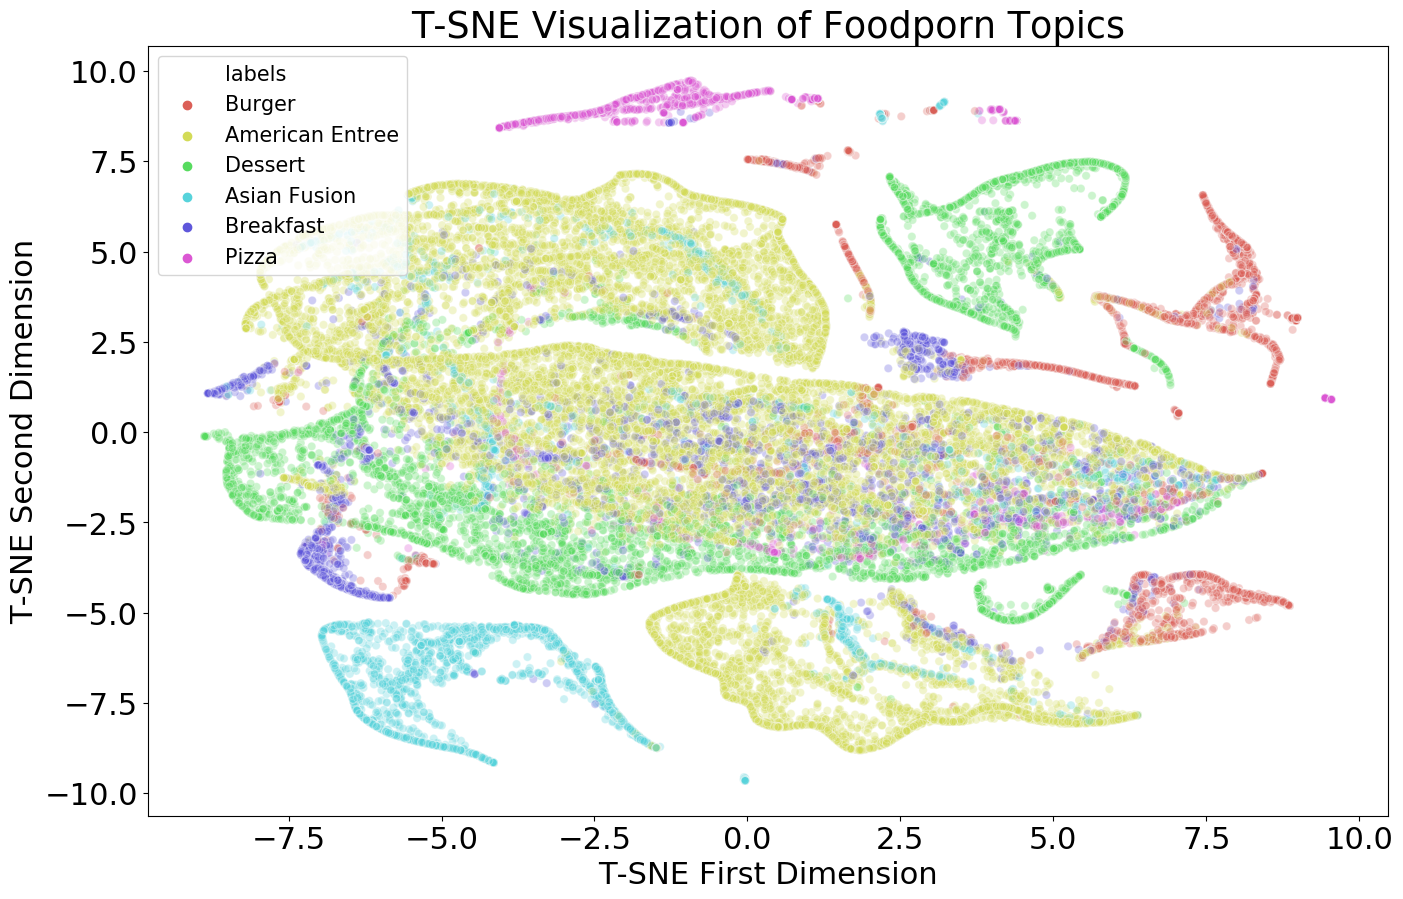

In [93]:
df_w_labels['tsne-2d-one'] = tsne_results[:,0]
df_w_labels['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="labels",
    palette=sns.color_palette("hls", 6),
    data=df_w_labels,
    legend="full",
    alpha=0.3
)
plt.xlabel('T-SNE First Dimension')
plt.ylabel('T-SNE Second Dimension')
plt.title('T-SNE Visualization of Foodporn Topics')
plt.legend(loc=2, prop={'size': 15})
plt.savefig('../figures/t_sne_visualization.png', dpi=200)

## Latent Dirichlet Allocation (LDA)

##### Convert to gensim

In [ ]:
# Convert sparse matrix of counts to a gensim corpus
corpus_cvect = matutils.Sparse2Corpus(doc_word.transpose())

In [ ]:
id2word_cvect = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [ ]:
len(id2word_cvect)

In [ ]:
# Create lda model (equivalent to "fit" in sklearn)
lda_cvect = models.LdaModel(corpus=corpus_cvect, num_topics=num_topics, id2word=id2word_cvect, passes=5)

In [ ]:
lda_cvect.print_topics()

This list of topics doesn't make as much intuitive sense as NMF on a my count-vectorized corpus, but look at all the stopwords this revealed.
Let's try with tf-idf

In [ ]:
# Convert sparse matrix of counts to a gensim corpus
corpus_tf_idf = matutils.Sparse2Corpus(doc_word_tf_idf.transpose())

In [ ]:
id2word_tf_idf = dict((v, k) for k, v in tf_idf.vocabulary_.items())

In [ ]:
len(id2word_tf_idf)

In [ ]:
# Create lda model (equivalent to "fit" in sklearn)
lda_tf_idf = models.LdaModel(corpus=corpus_tf_idf, num_topics=num_topics, id2word=id2word_tf_idf, passes=5)

In [ ]:
lda_tf_idf.print_topics()

Wow these results are trash compared to NMF